# Author : Aditya Gupta

# Data Science and Business Analytics Internship

# GRIP THE SPARK FOUNDATION

# ###GRIPDEC'20

## Objective: What all security issues and insights you can derive by EDA? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### The dataset was initially studied in excel along with data description present on the Kaggle. After understanding the dataset, few of the features I opted to remove as they were less meaningful to me. A file was created from the same keeping the relevant features i.e. gt_data_ analysis.xlsx .

In [2]:
data = pd.read_excel('gt_data_analysis.xlsx')
data.head()

eventid  iyear  imonth  iday       Date  extended         country_txt  \
0  197000000001   1970       7     2 1970-07-02         0  Dominican Republic   
1  197000000002   1970       0     0 1969-11-30         0              Mexico   
2  197001000001   1970       1     0 1969-12-31         0         Philippines   
3  197001000002   1970       1     0 1969-12-31         0              Greece   
4  197001000003   1970       1     0 1969-12-31         0               Japan   

                    region_txt provstate           city  ... nhostkid  ransom  \
0  Central America & Caribbean       NaN  Santo Domingo  ...      NaN     0.0   
1                North America   Federal    Mexico city  ...      1.0     1.0   
2               Southeast Asia    Tarlac        Unknown  ...      NaN     0.0   
3               Western Europe    Attica         Athens  ...      NaN     0.0   
4                    East Asia   Fukouka        Fukouka  ...      NaN     0.0   

   ransomamt  ransompaid  hostkidoutcome_txt nreleased INT_LOG INT_IDEO  \
0        NaN         NaN                 NaN       NaN       0        0   
1   800000.0         NaN                 NaN       NaN       0        1   
2        NaN         NaN                 NaN       NaN      -9       -9   
3        NaN         NaN                 NaN       NaN      -9       -9   
4        NaN         NaN                 NaN       NaN      -9       -9   

  INT_MISC INT_ANY  
0        0       0  
1        1       1  
2        1       1  
3        1       1  
4        1       1  

[5 rows x 43 columns]

### Find out the missing values( in %) for all variables in the data set

In [3]:
# Find out the missing values( in %) for all variables in the data set
data.isnull().sum()/data.shape[0]*100

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
Date                   0.000000
extended               0.000000
country_txt            0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
targtype1_txt          0.000000
targsubtype1_txt       5.709144
natlty1_txt            0.858050
gname                  0.000000
guncertain1            0.209146
individual             0.000000
nperps                39.140629
nperpcap              38.245703
claimed               36.391456
weaptype1_txt          0.000000
weapsubtype1_txt      11.430396
nkill                  5.676120
nwound                 8.977330
property               0.000000
propextent_txt        64.739585
propvalu

### Sorting out categorical and numerical variables.

In [4]:
### Sorting out categorical and numerical variables.  
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'imonth', 'iday', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


In [5]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended       multiple        success        suicide  \
count  181691.000000  181690.000000  181691.000000  181691.000000   
mean        0.045346       0.137773       0.889598       0.036507   
std         0.208063       0.344663       0.313391       0.187549   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         attacktype1    guncertain1  ...      ishostkid      nhostkid  \
count  181691.000000  181311.000000  ...  181513.000000  13572.000000   
mean        3.247547       0.081440  ...       0.059054      4.533230   
std         1.915772       0.273511  ...       0.461244    202.316386   
min         1.000000       0.000000  ...      -9.000000    -99.000000   
25%         2.000000       0.000000  ...       0.000000      1.000000   
50%         3.000000       0.000000  ...       0.000000      2.000000   
75%         3.000000       0.000000  ...       0.000000      4.000000   
max         9.000000       1.000000  ...       1.000000  17000.000000   

             ransom     ransomamt    ransompaid     nreleased        INT_LOG  \
count  77381.000000  1.350000e+03  7.740000e+02  10400.000000  181691.000000   
mean      -0.145811  3.172530e+06  7.179437e+05    -29.018269      -4.543731   
std        1.207861  3.021157e+07  1.014392e+07     65.720119       4.543547   
min       -9.000000 -9.900000e+01 -9.900000e+01    -99.000000      -9.000000   
25%        0.000000  0.000000e+00 -9.900000e+01    -99.000000      -9.000000   
50%        0.000000  1.500000e+04  0.000000e+00      0.000000      -9.000000   
75%        0.000000  4.000000e+05  1.273412e+03      1.000000       0.000000   
max        1.000000  1.000000e+09  2.750000e+08   2769.000000       1.000000   

            INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  
mean       -4.464398       0.090010      -3.945952  
std         4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000  
25%        -9.000000       0.000000      -9.000000  
50%        -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 28 columns]

In [6]:
data.drop(columns = ['imonth','iday'], inplace = True)
data.head()

eventid  iyear       Date  extended         country_txt  \
0  197000000001   1970 1970-07-02         0  Dominican Republic   
1  197000000002   1970 1969-11-30         0              Mexico   
2  197001000001   1970 1969-12-31         0         Philippines   
3  197001000002   1970 1969-12-31         0              Greece   
4  197001000003   1970 1969-12-31         0               Japan   

                    region_txt provstate           city alternative_txt  \
0  Central America & Caribbean       NaN  Santo Domingo             NaN   
1                North America   Federal    Mexico city             NaN   
2               Southeast Asia    Tarlac        Unknown             NaN   
3               Western Europe    Attica         Athens             NaN   
4                    East Asia   Fukouka        Fukouka             NaN   

   multiple  ...  nhostkid  ransom  ransomamt ransompaid hostkidoutcome_txt  \
0       0.0  ...       NaN     0.0        NaN        NaN                NaN   
1       0.0  ...       1.0     1.0   800000.0        NaN                NaN   
2       0.0  ...       NaN     0.0        NaN        NaN                NaN   
3       0.0  ...       NaN     0.0        NaN        NaN                NaN   
4       0.0  ...       NaN     0.0        NaN        NaN                NaN   

  nreleased INT_LOG INT_IDEO  INT_MISC  INT_ANY  
0       NaN       0        0         0        0  
1       NaN       0        1         1        1  
2       NaN      -9       -9         1        1  
3       NaN      -9       -9         1        1  
4       NaN      -9       -9         1        1  

[5 rows x 41 columns]

## Univariate Analysis

In [7]:
### Sorting out categorical and numerical variables.  
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


In [8]:
data.columns

Index(['eventid', 'iyear', 'Date', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'alternative_txt', 'multiple', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'gname', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt',
       'nkill', 'nwound', 'property', 'propextent_txt', 'propvalue',
       'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid',
       'hostkidoutcome_txt', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

### Top countries where the terror incidents are happening

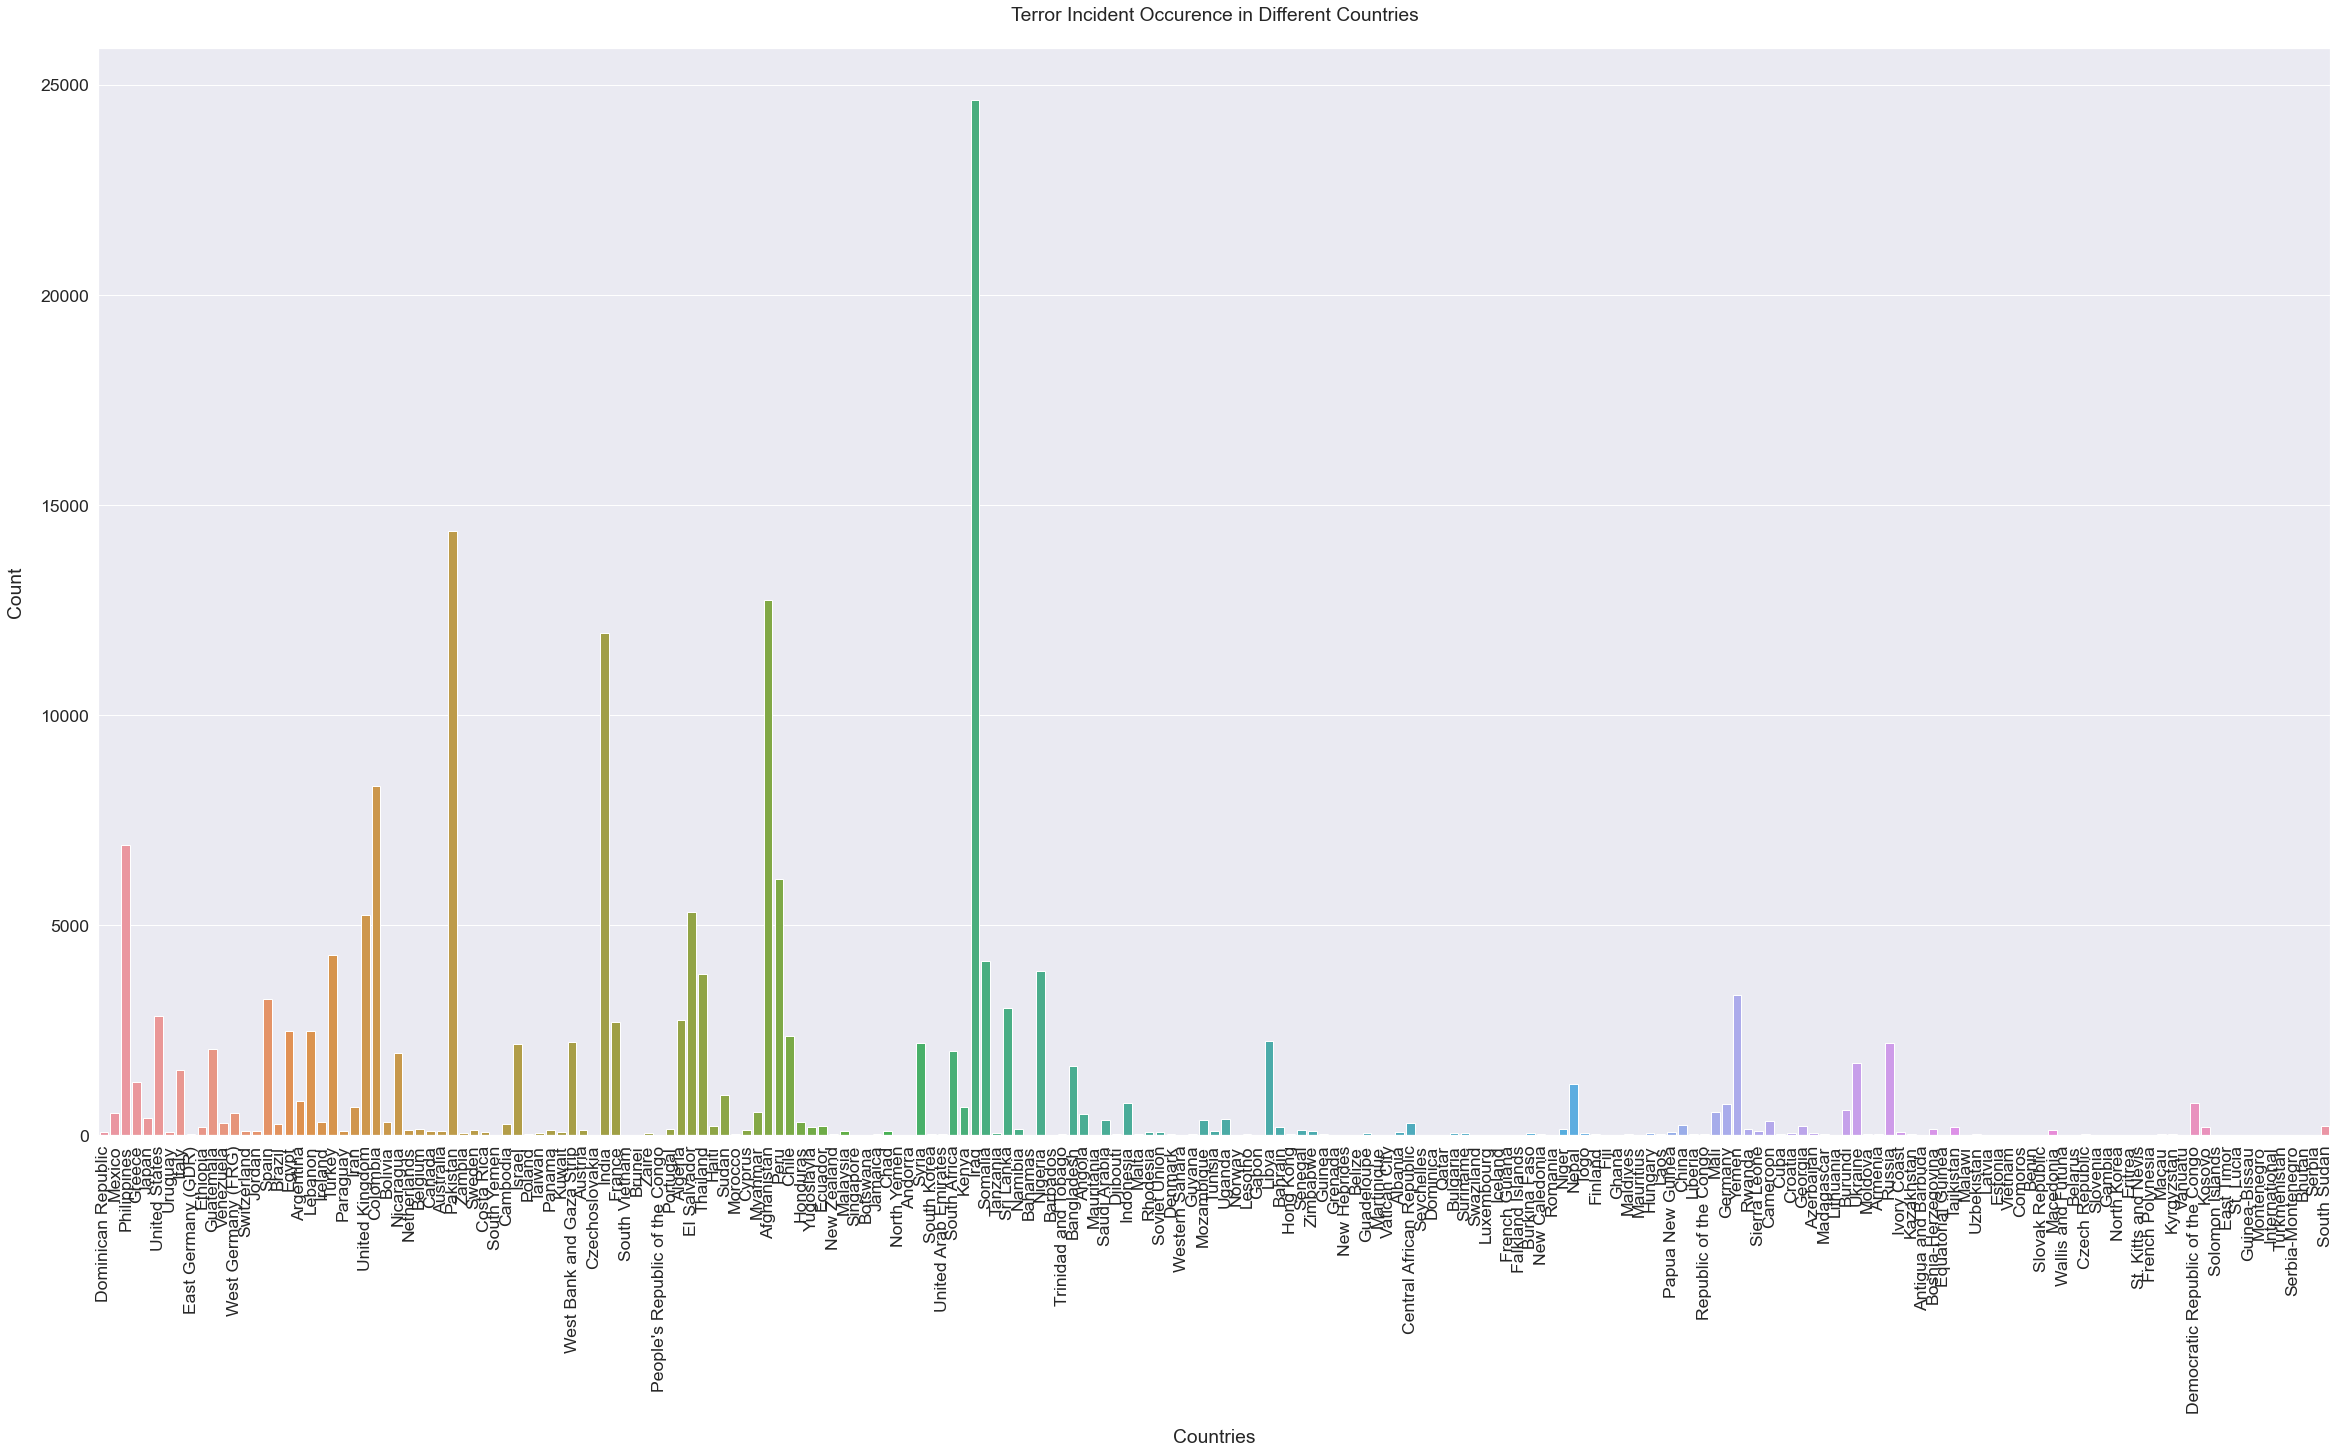

In [8]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'country_txt', data=data)
plt.title("Terror Incident Occurence in Different Countries", y=1.02)
plt.xlabel("Countries", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Top countries where the terror incidents are happening are Iraq, Afghanistan, Pakistan and India.

### Top regions where the terror incidents are occuring.

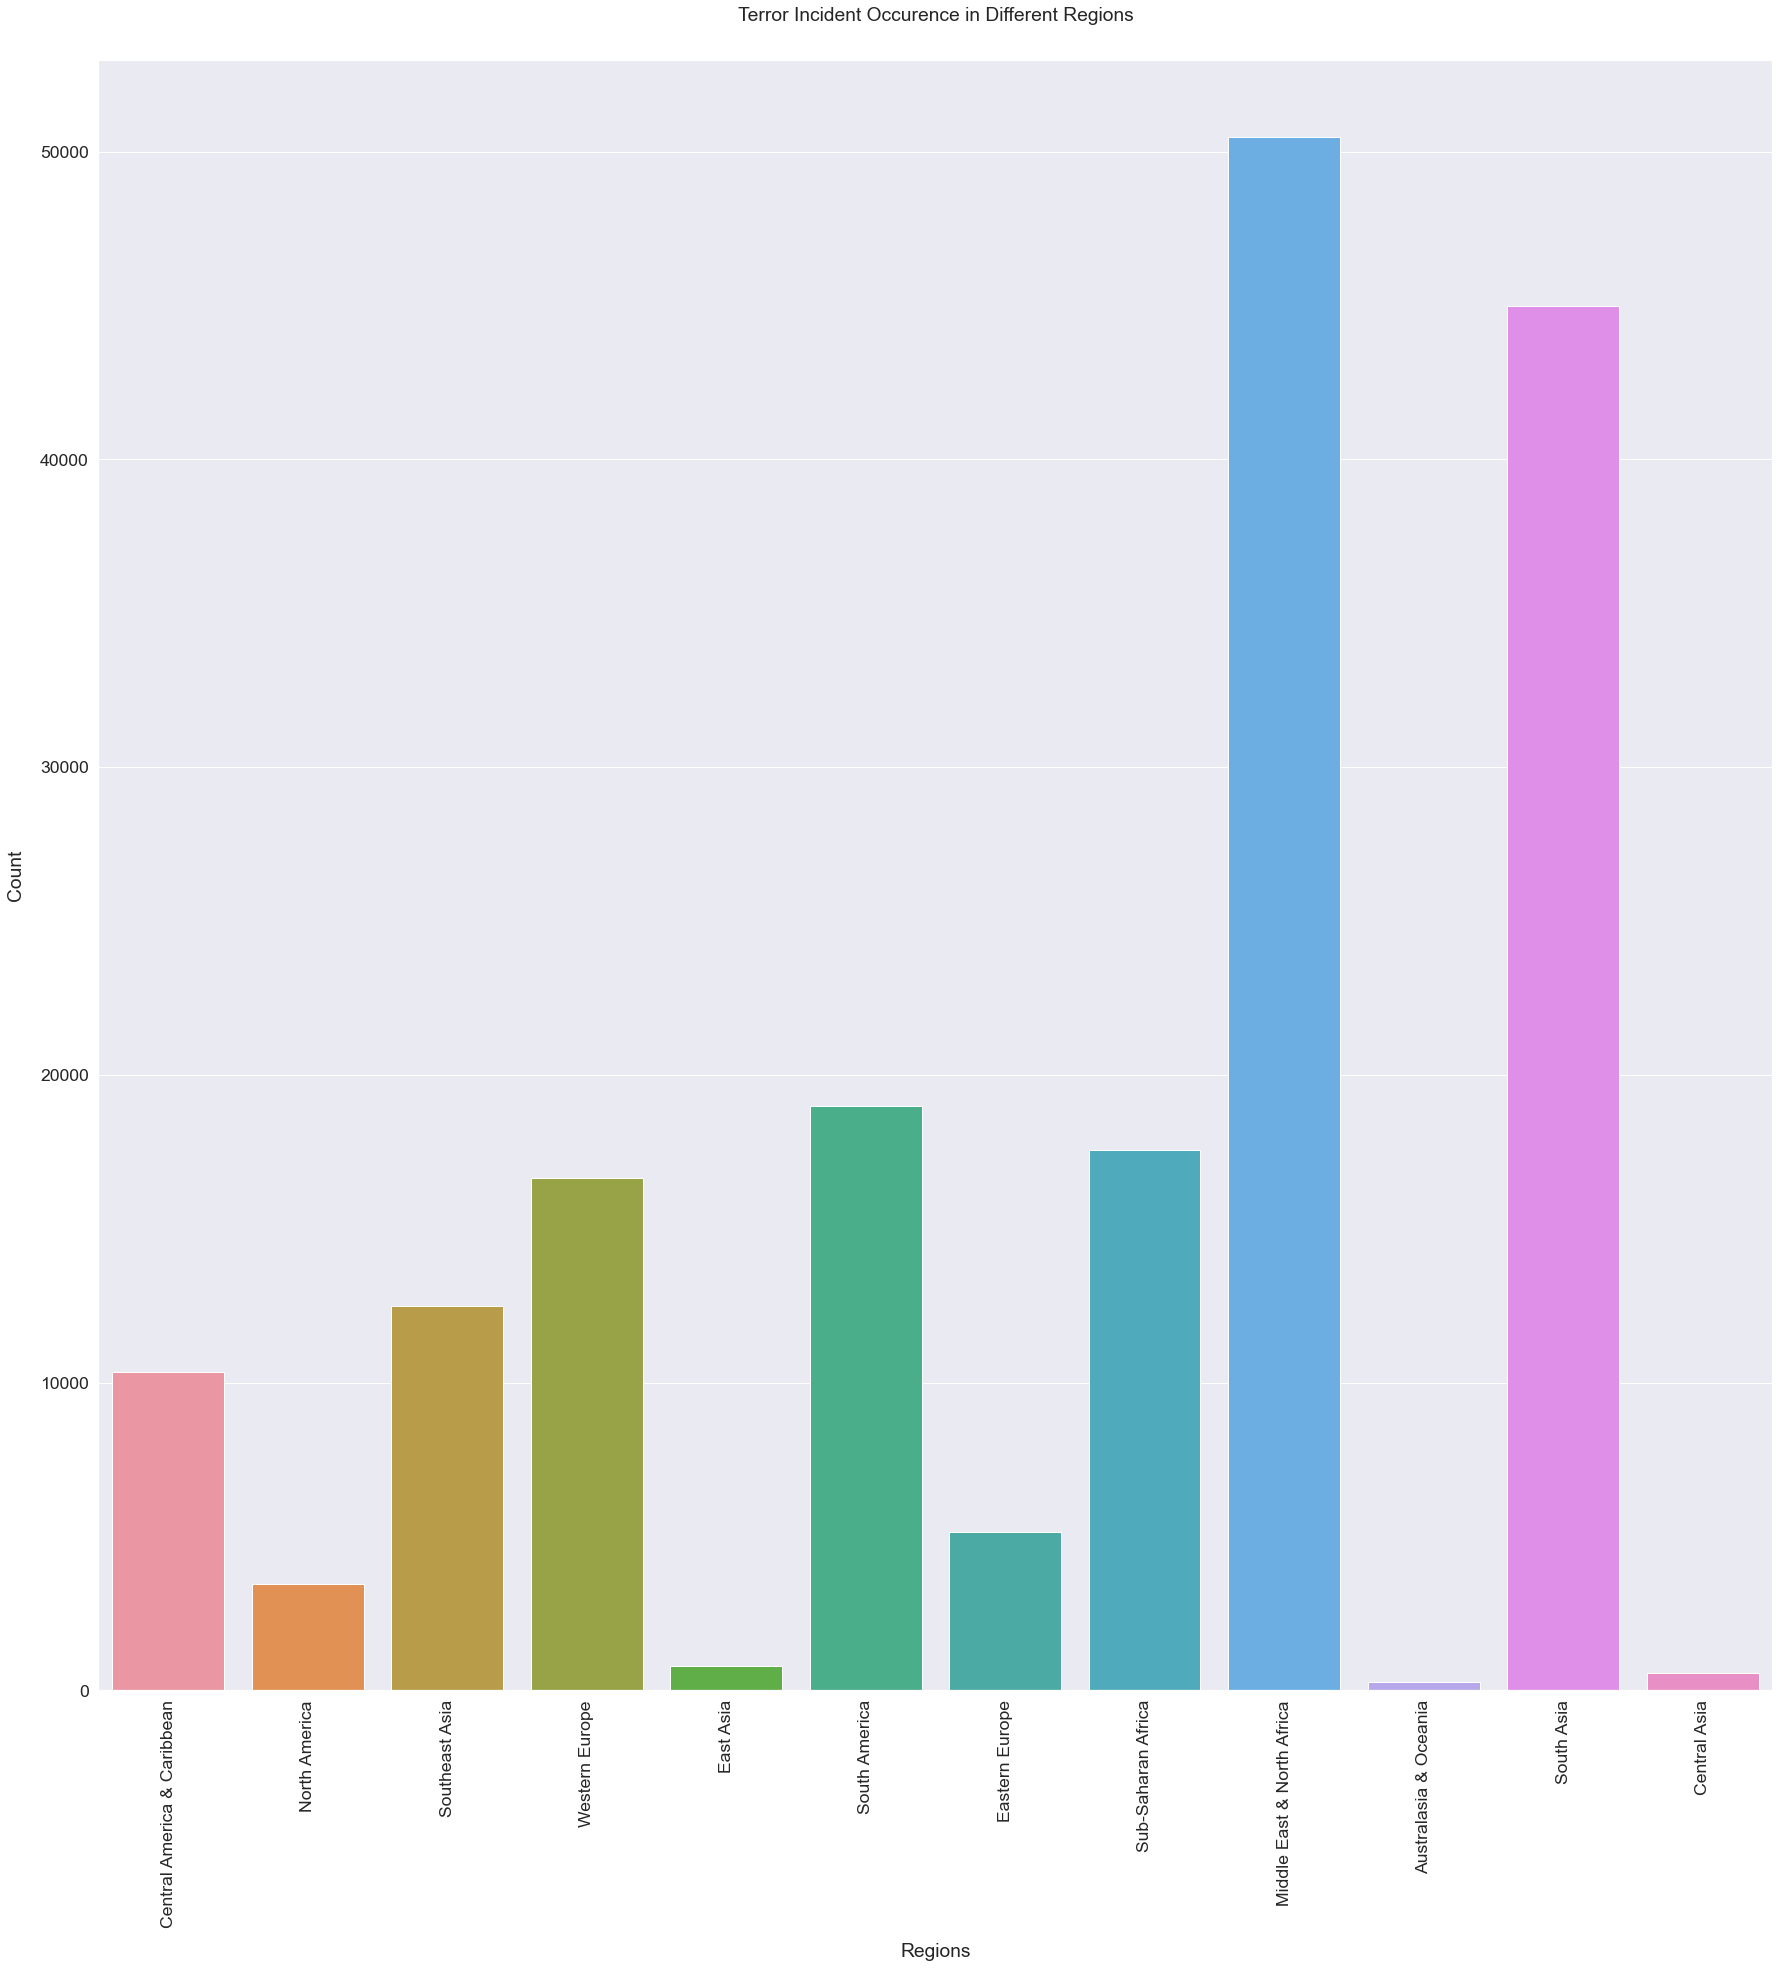

In [10]:
sns.set(font_scale=1.6)
plt.figure(figsize =(30,30))
sns.countplot(x = 'region_txt', data=data)
plt.title("Terror Incident Occurence in Different Regions", y=1.02)
plt.xlabel("Regions", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Top regions where the terror incidents are occuring are Middle east & north africa, South Asia, South America, Sub-Saharan Africa, Western Europe

plt.figure(figsize =(40,20))   #### No clear description
sns.countplot(x = 'provstate', data=data)
plt.xticks(rotation = 90)
plt.show()

sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'city', data=data)
plt.title("Terror Incident Occurence in Different Cities", y=1.02)
plt.xlabel("Cities", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()

### Terror incident type

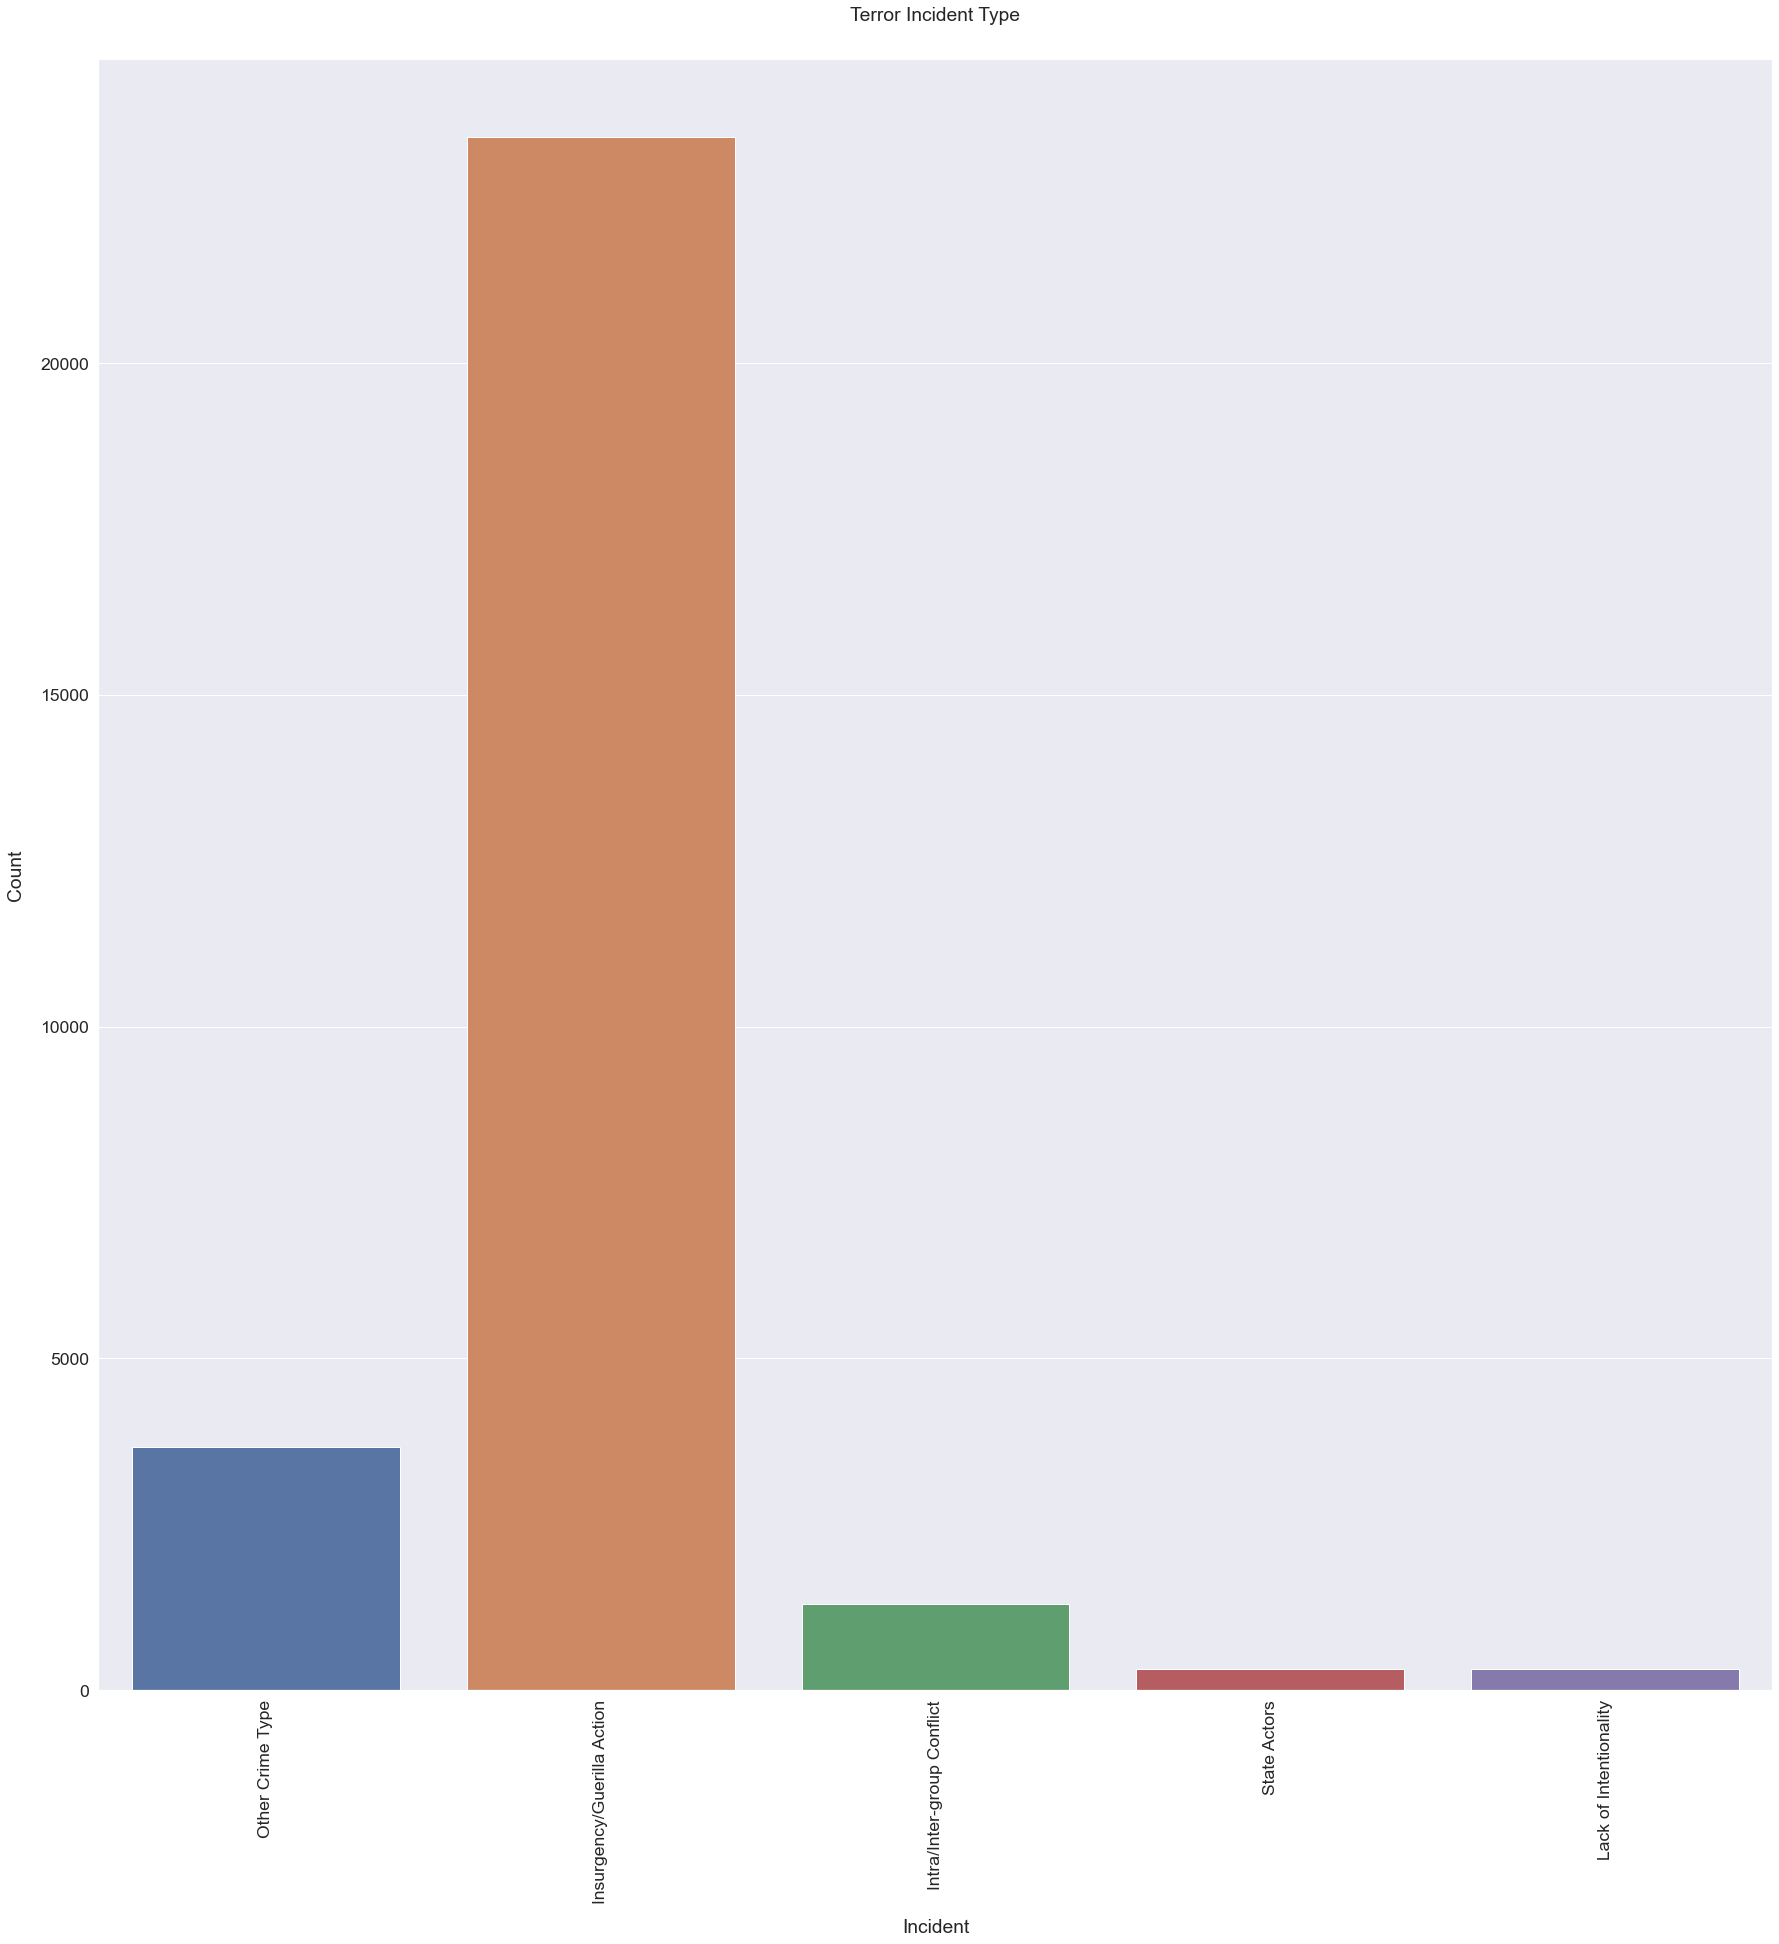

In [11]:
sns.set(font_scale=1.6)
plt.figure(figsize =(30,30))
sns.countplot(x = 'alternative_txt', data=data)
plt.title("Terror Incident Type", y=1.02)
plt.xlabel("Incident", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Terror incident type mostly are insurgency/gureilla action, other crime type, intra/inter group conflict.

### Most terror attack types.

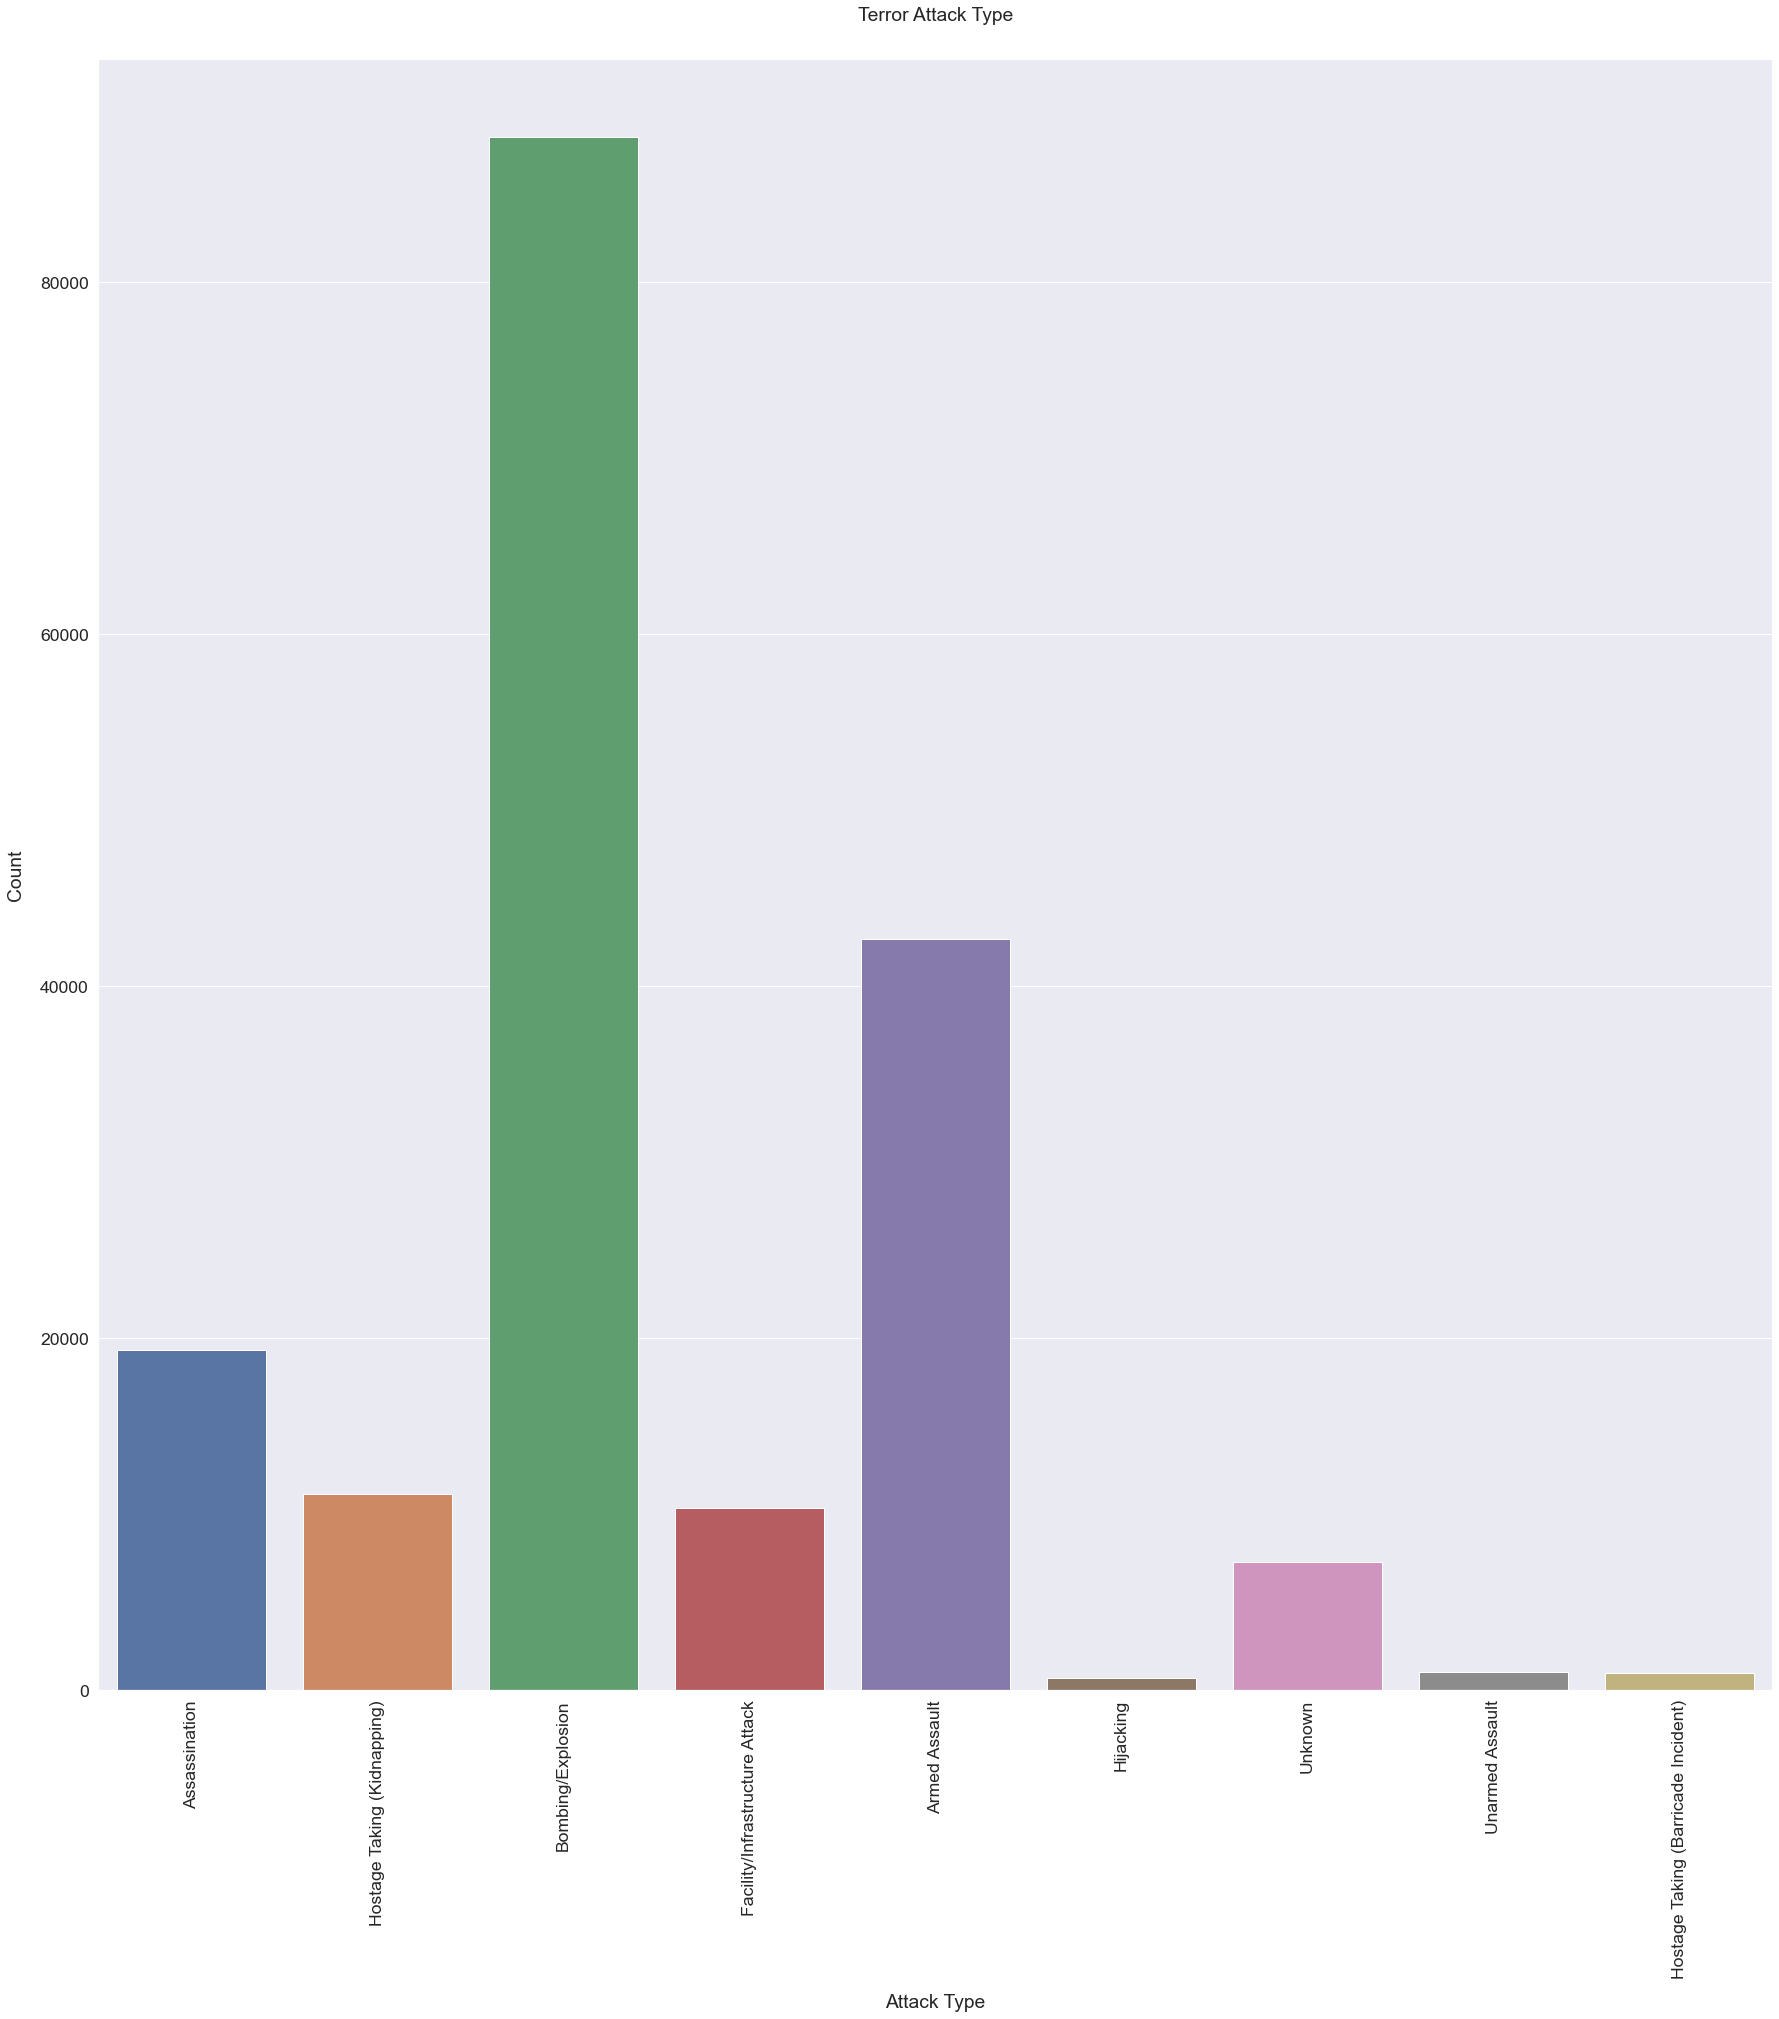

In [12]:
sns.set(font_scale=1.6)
plt.figure(figsize =(30,30))
sns.countplot(x = 'attacktype1_txt', data=data)
plt.title("Terror Attack Type", y=1.02)
plt.xlabel("Attack Type", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Most terror attack types are bomb explosion, armed assualt, assassination, hostage taking and infrastructure attack.

In [13]:
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


###  Terrorists target type

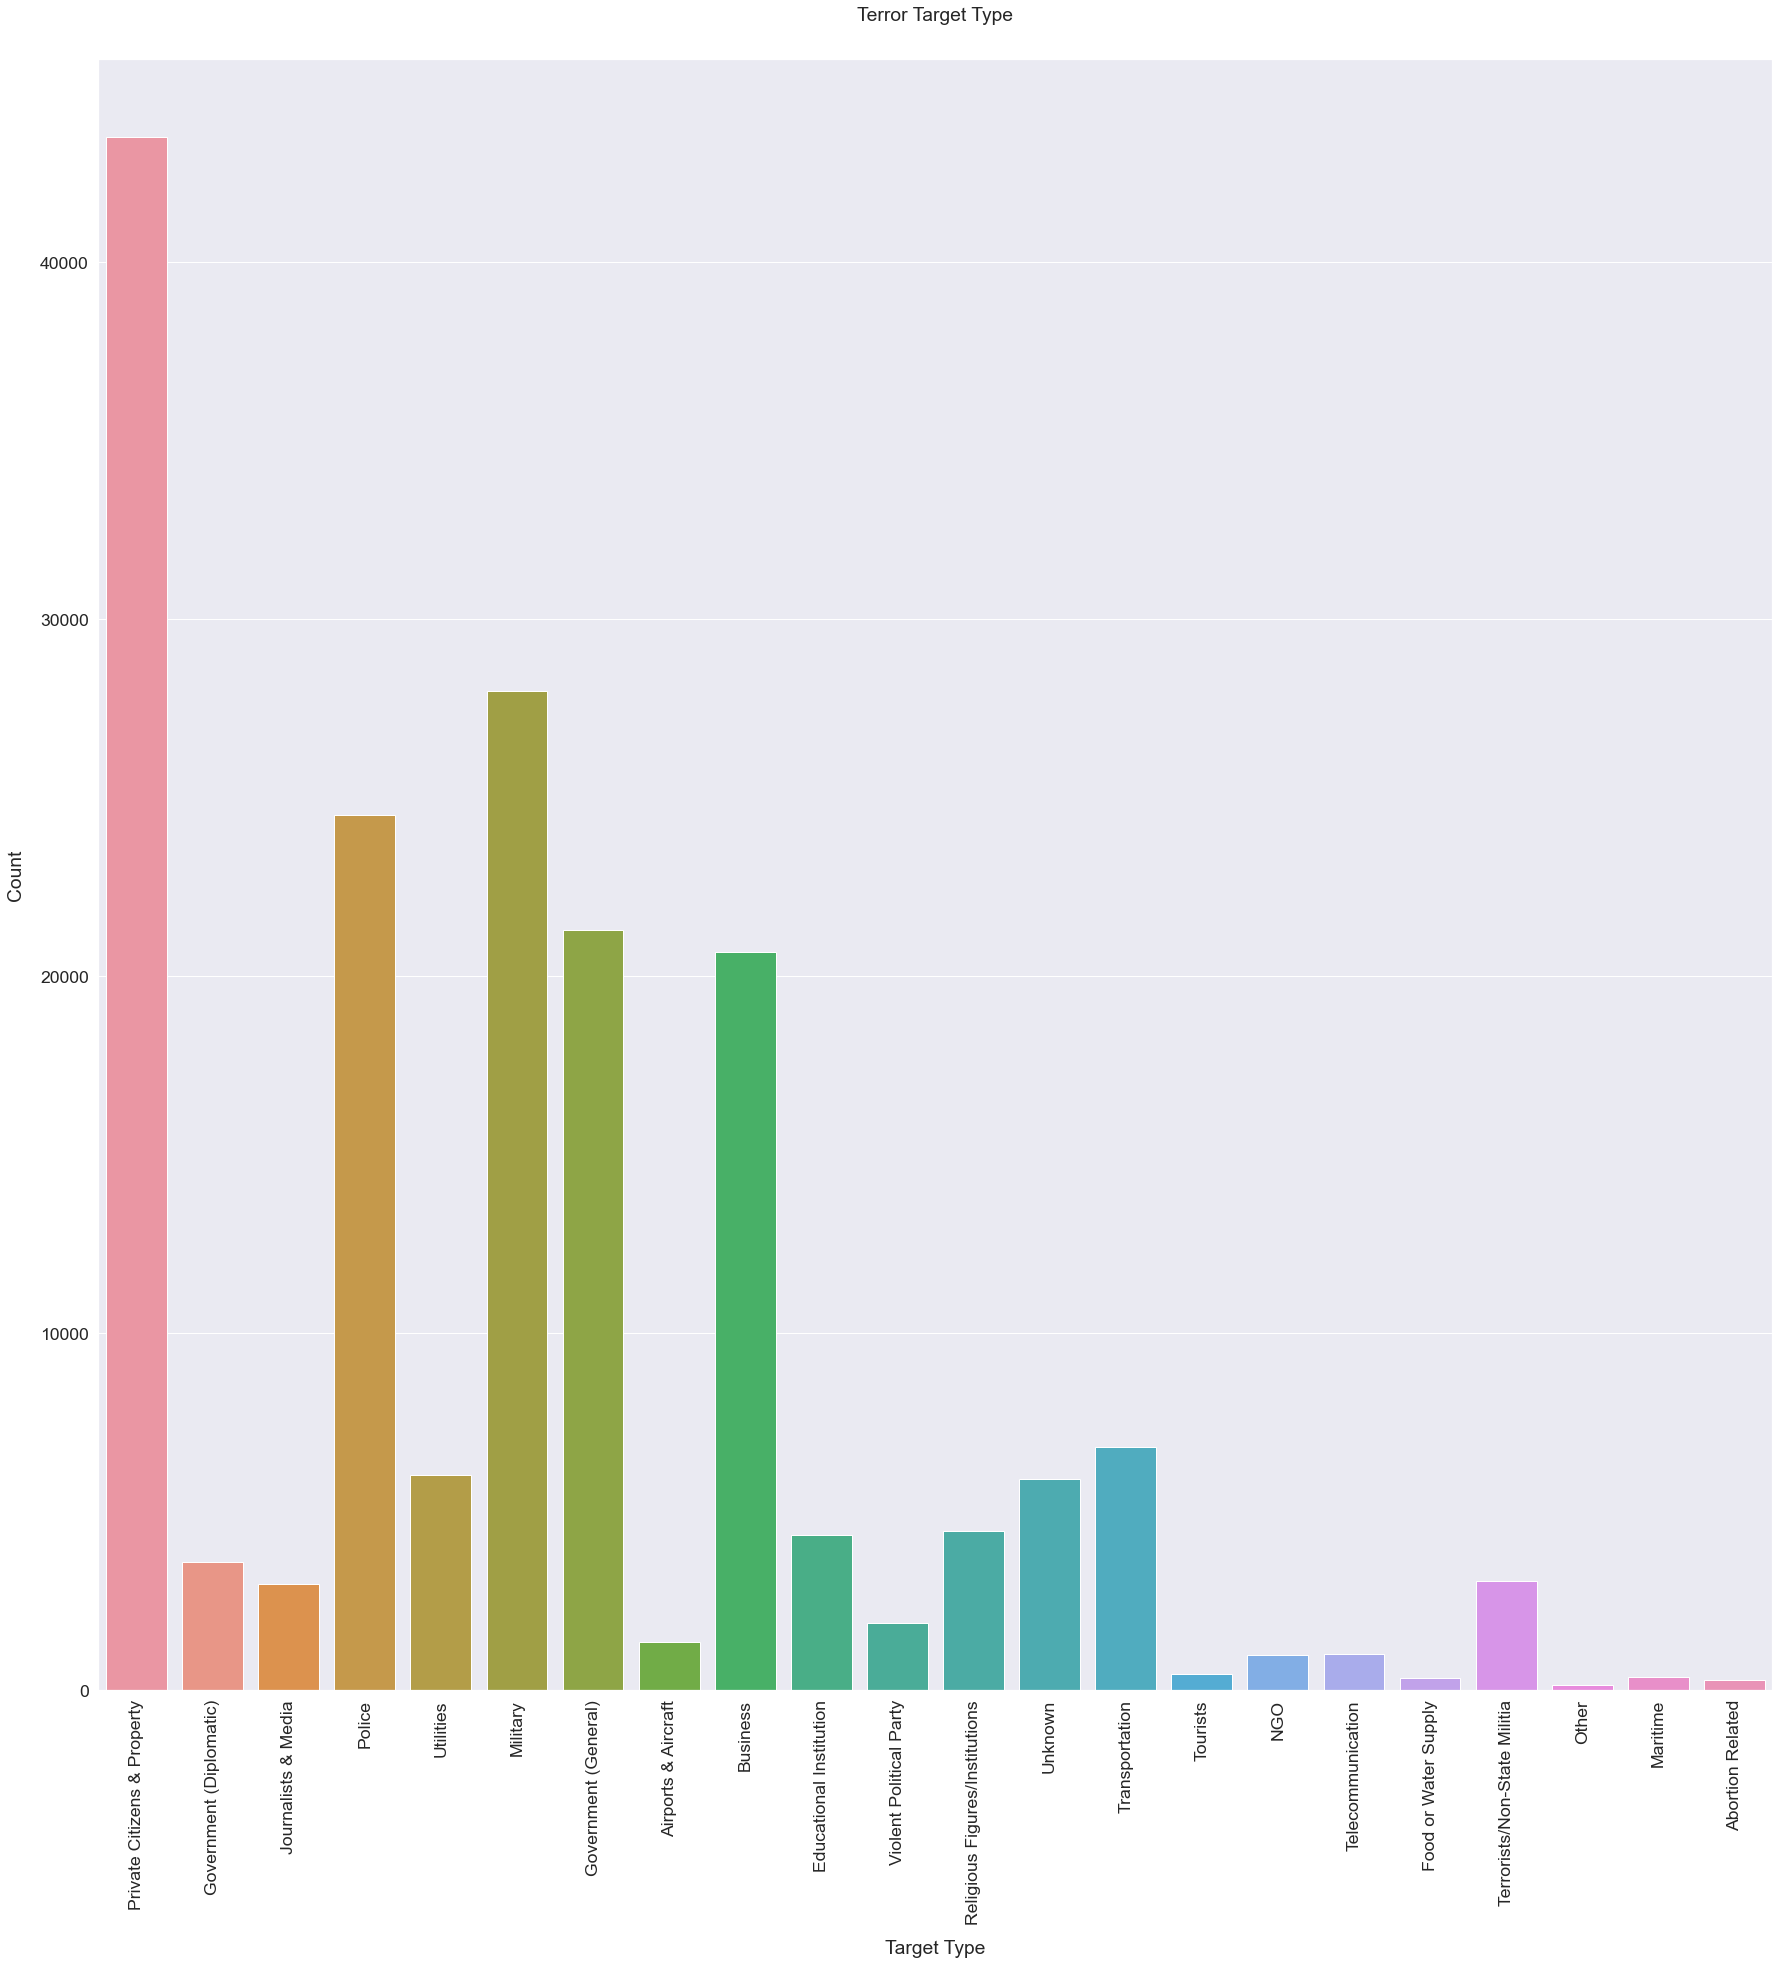

In [14]:
sns.set(font_scale=1.6)
plt.figure(figsize =(30,30))
sns.countplot(x = 'targtype1_txt', data=data)
plt.title("Terror Target Type", y=1.02)
plt.xlabel("Target Type", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Terrorists mostly targeted upon private citizens & property, military, police, government, business infrasstructure.

### Terror target subcategory

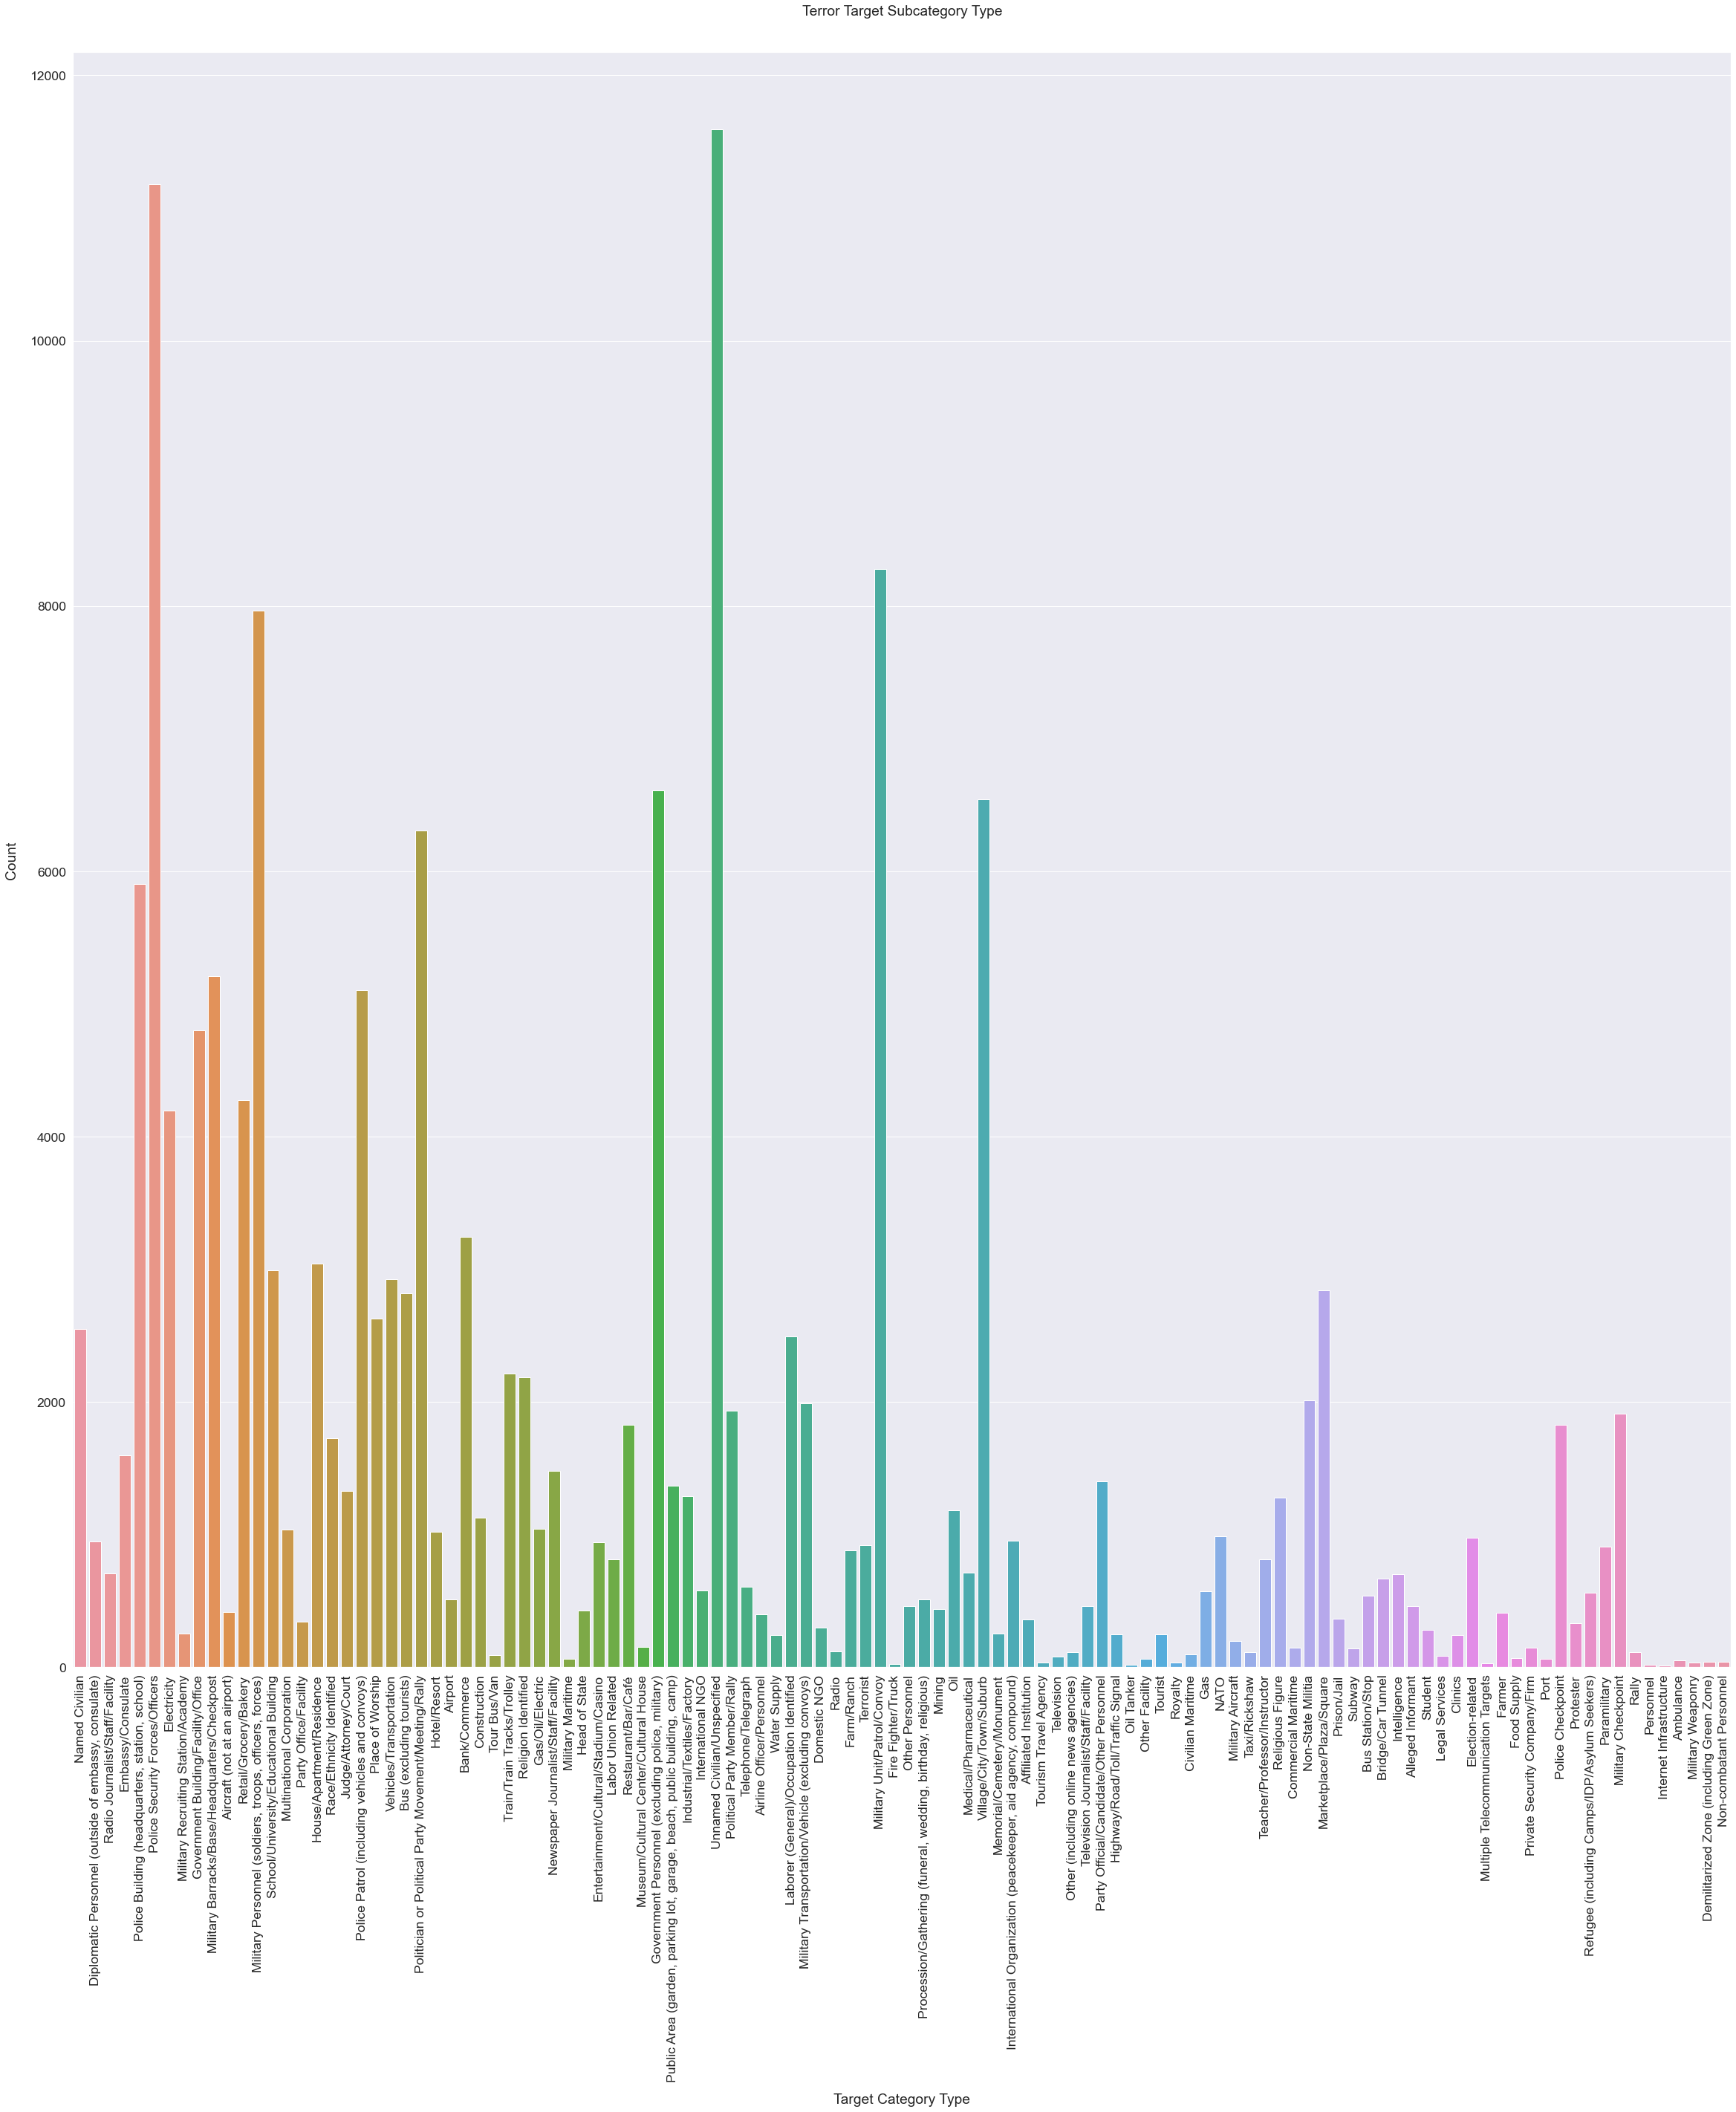

In [15]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,40))
sns.countplot(x = 'targsubtype1_txt', data=data)
plt.title("Terror Target Subcategory Type", y=1.02)
plt.xlabel("Target Category Type", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Attacks were mostly on police security forces, unarmed civilians, military unit/convoy,military personnel,village,politician,etc

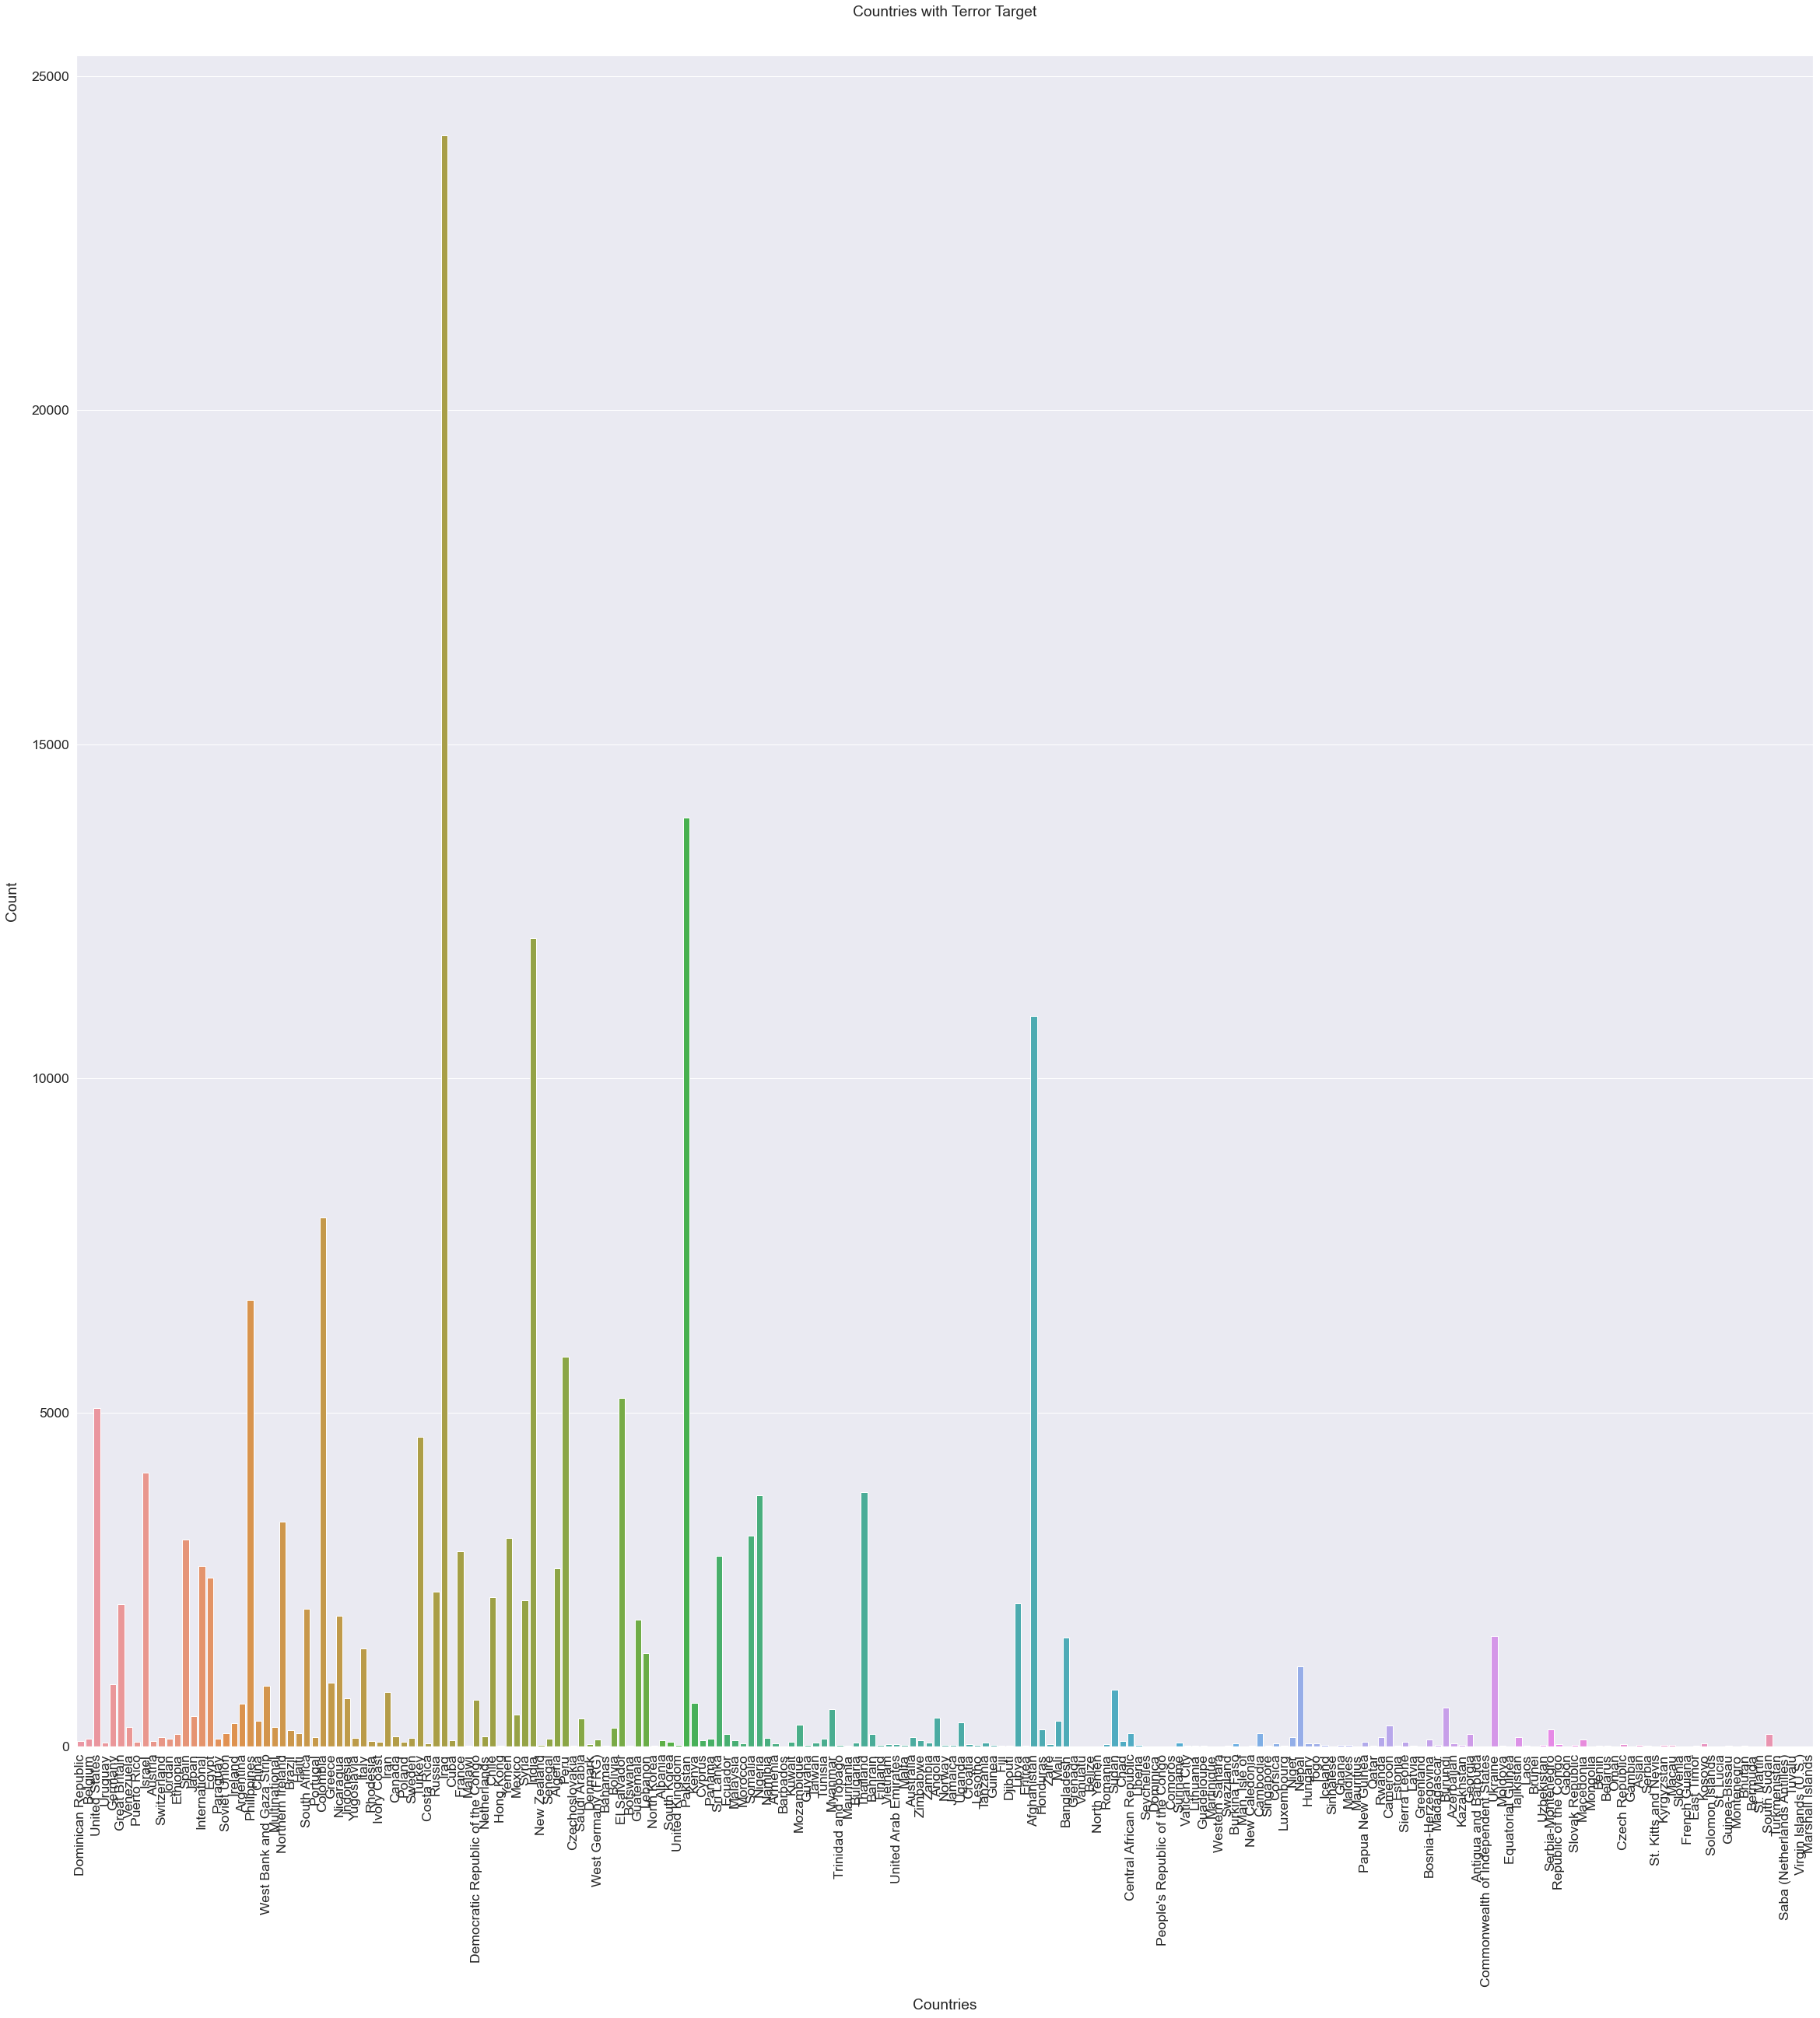

In [16]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,40))
sns.countplot(x = 'natlty1_txt', data=data)
plt.title("Countries with Terror Target", y=1.02)
plt.xlabel("Countries", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Iraq, Pakistan, India, Afghanistan, Colombia, Philipinnes have the most terrorists attacks.

sns.set(font_scale=1.6)
plt.figure(figsize =(40,40))
sns.countplot(x = 'gname', data=data)
plt.title("Incidents by Terror Organisations", y=1.02)
plt.xlabel("Terror Organisations Name", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()

### Weapons used by Terrorists

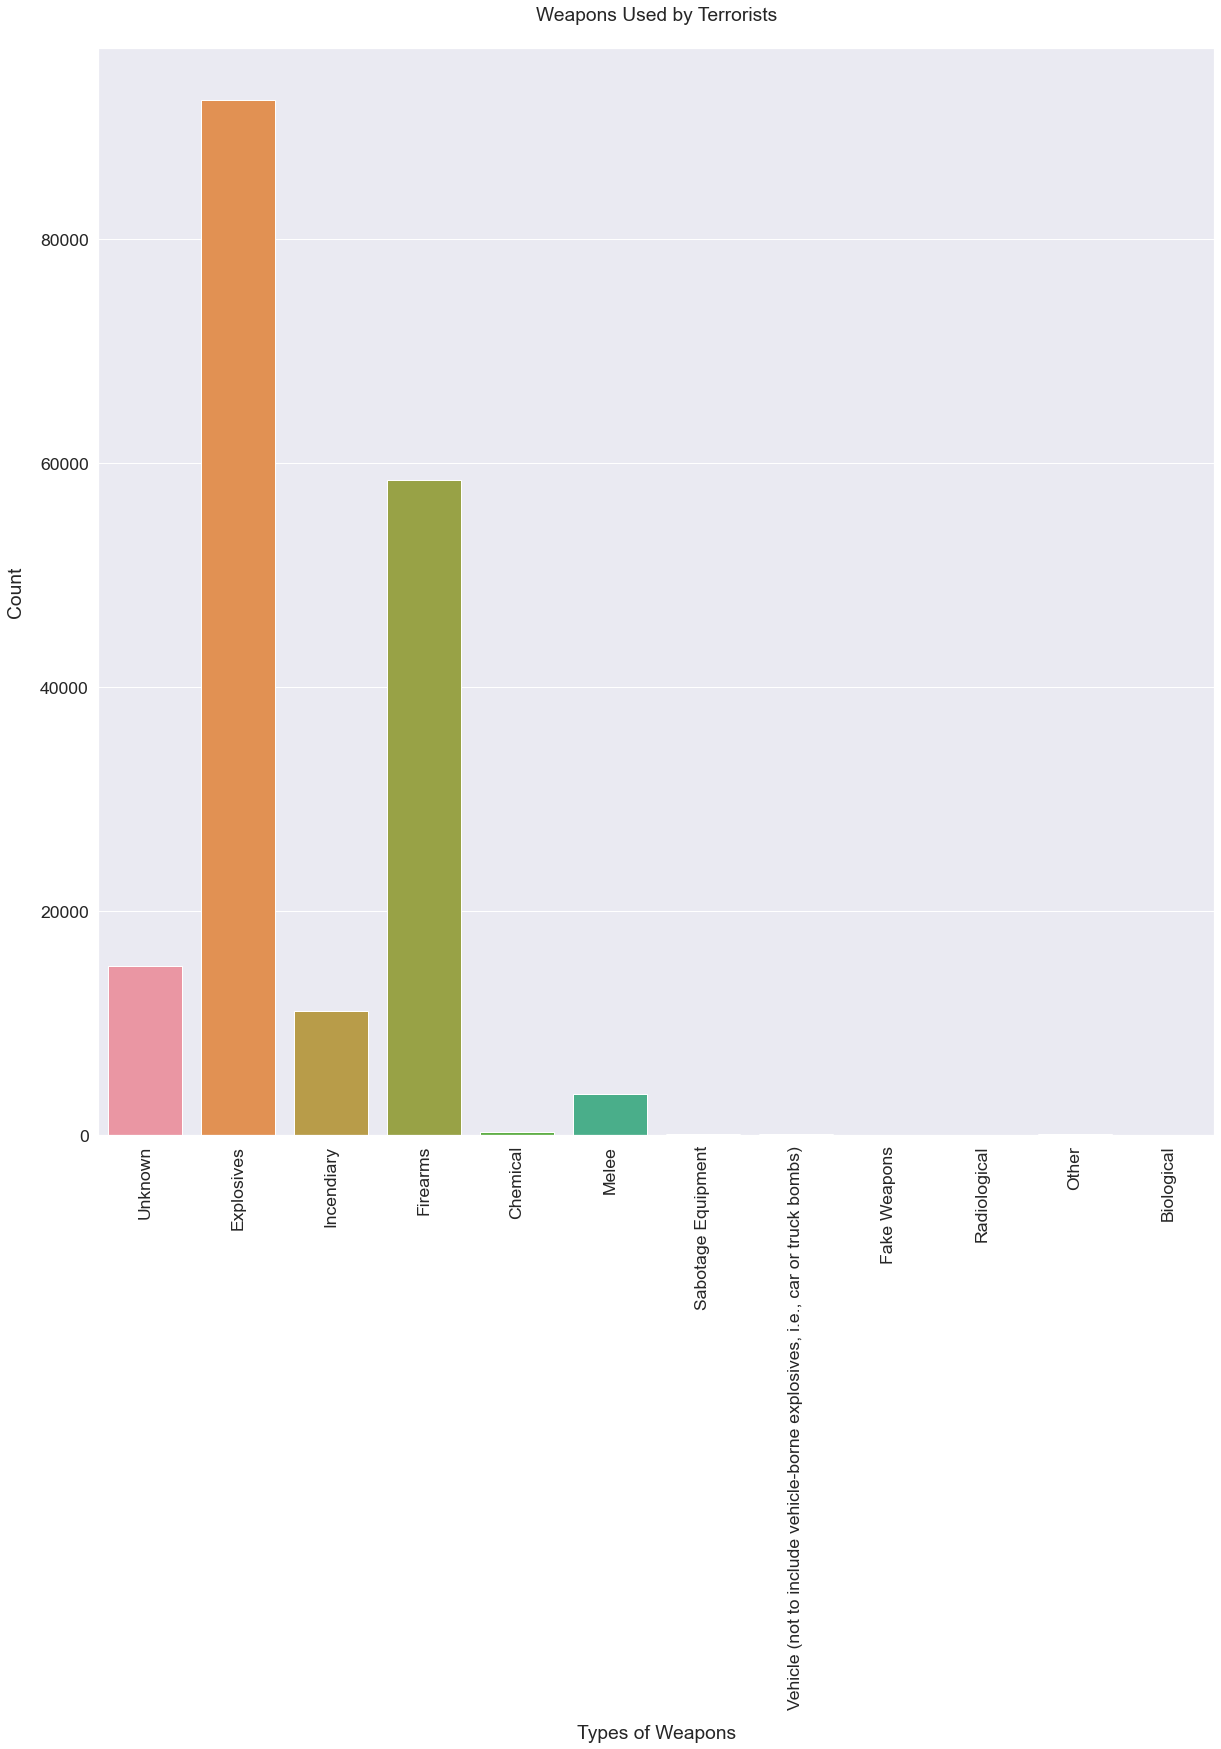

In [17]:
### ['weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
sns.set(font_scale=1.6)
plt.figure(figsize =(20,20))
sns.countplot(x = 'weaptype1_txt', data=data)
plt.title("Weapons Used by Terrorists", y=1.02)
plt.xlabel("Types of Weapons", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Mostly used weapons are explosives, firearms, incendiary.

### Subcategory of weapons used

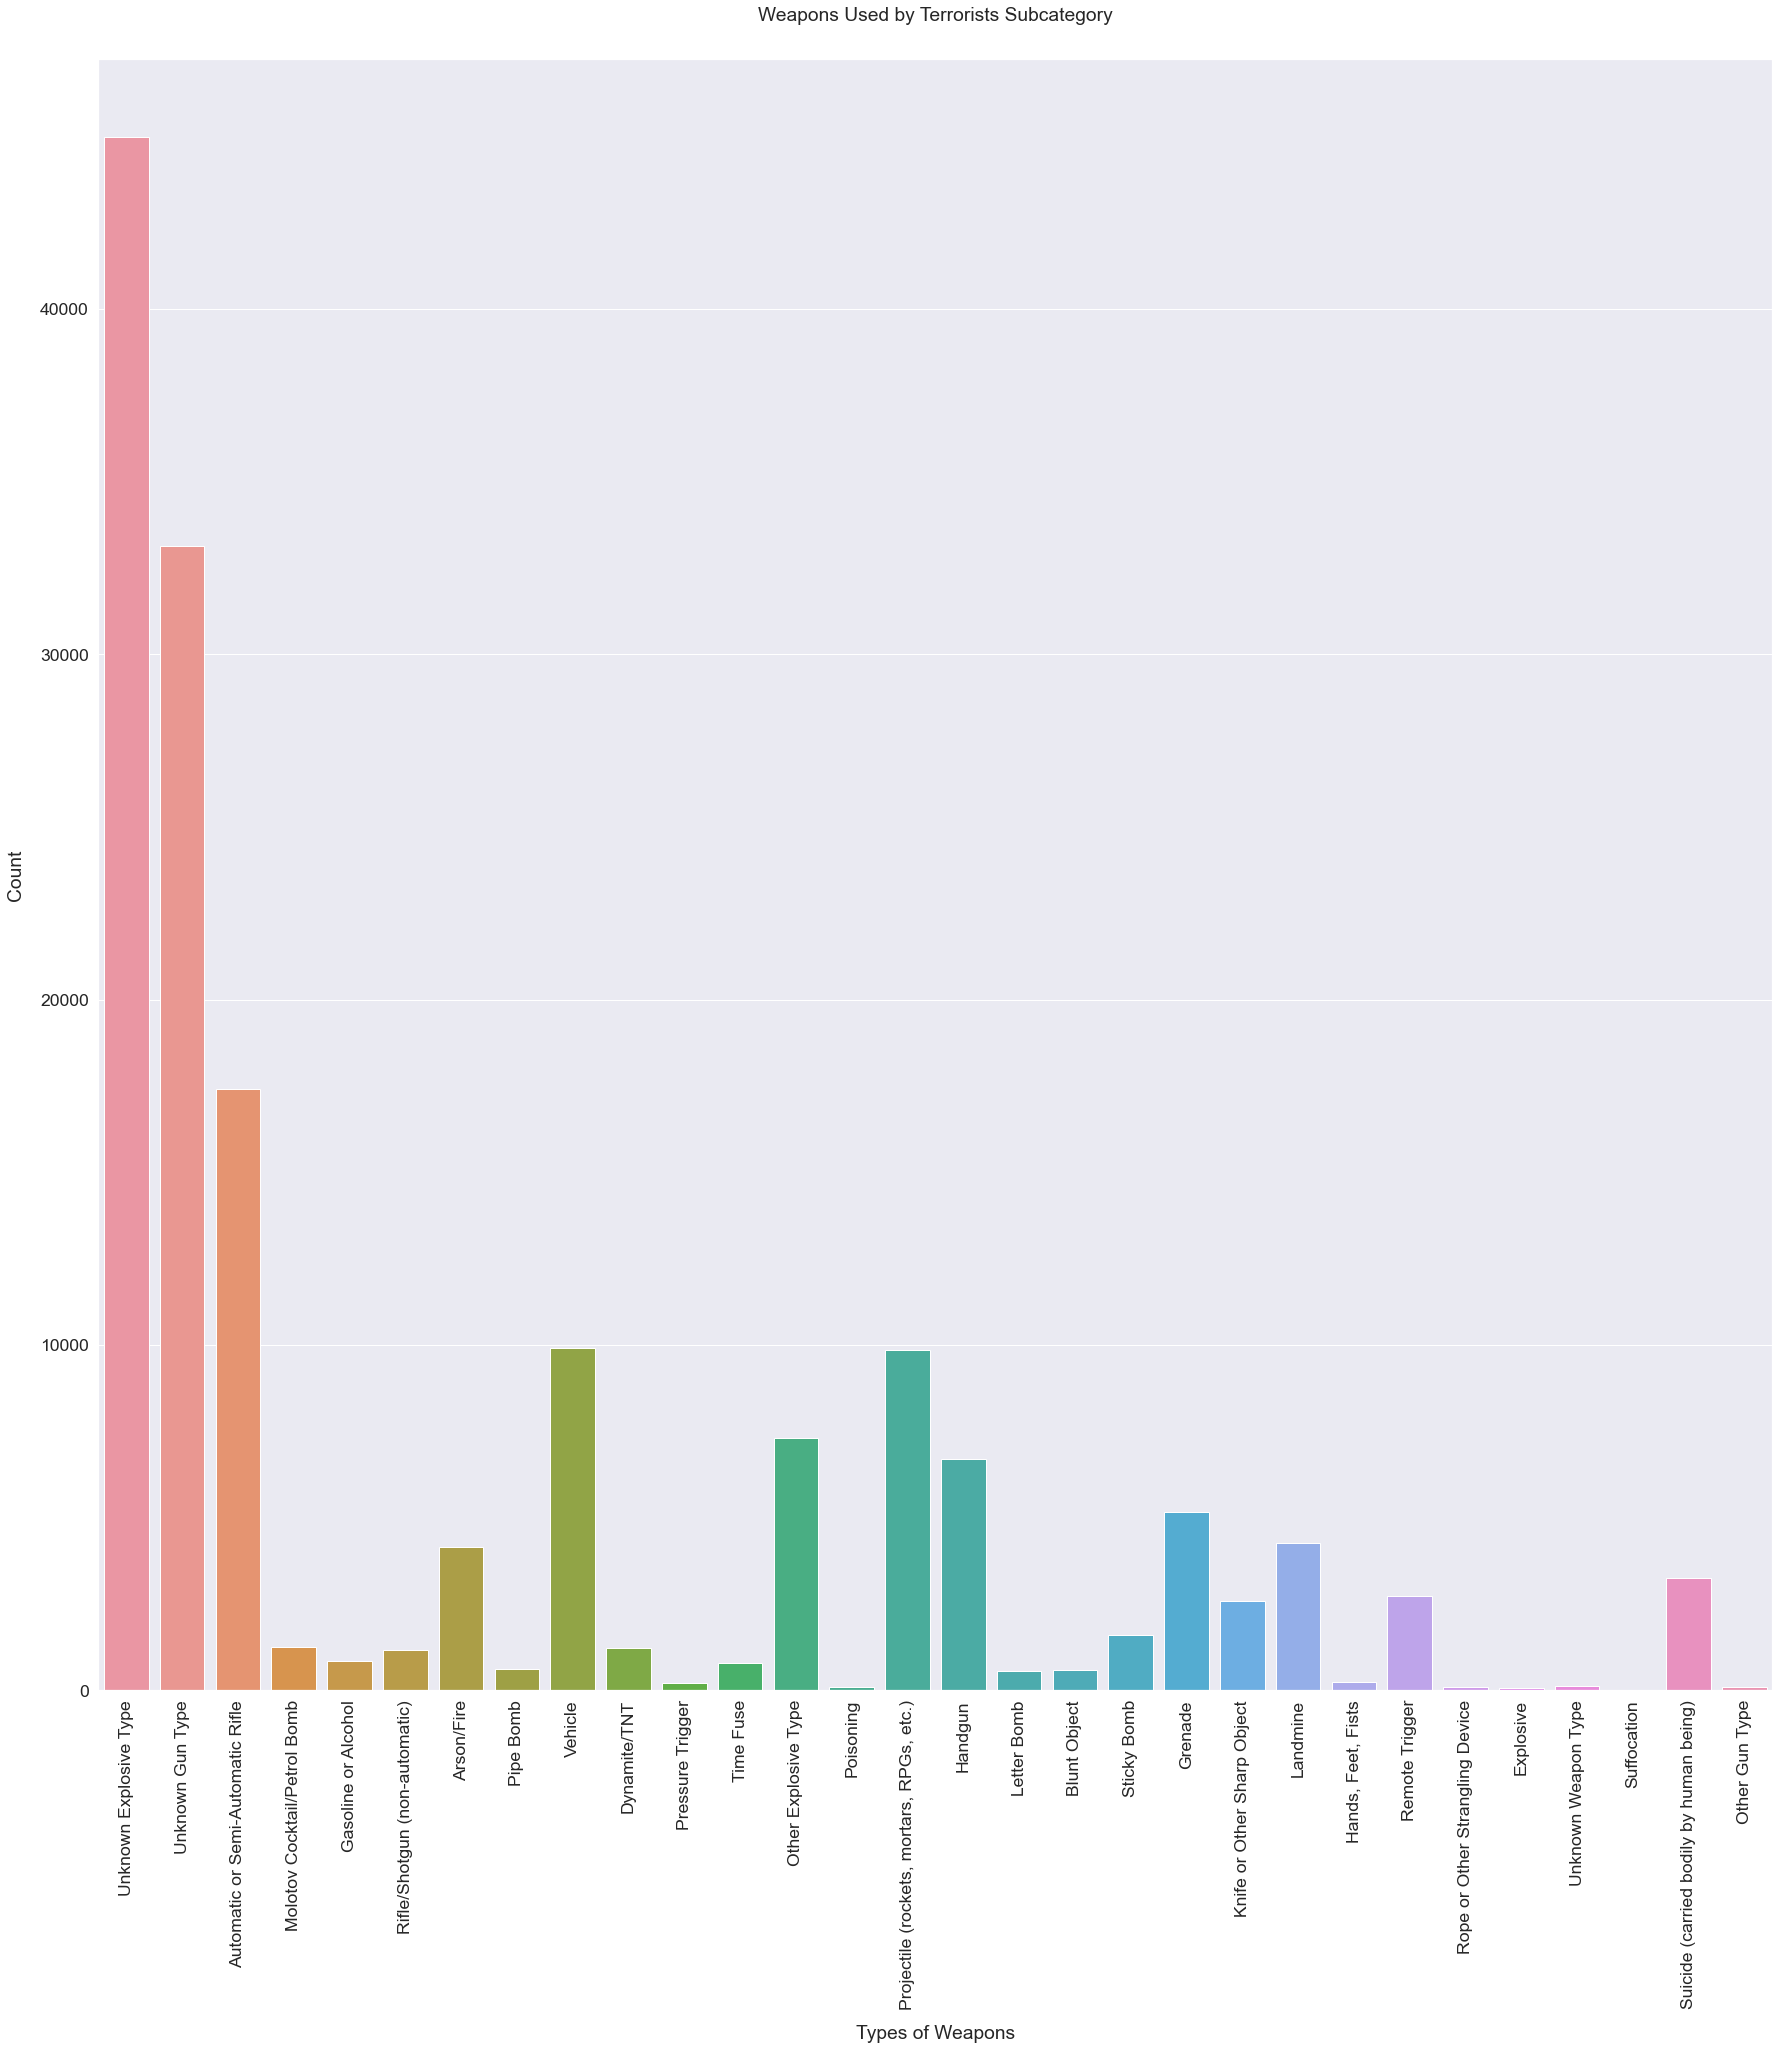

In [18]:
sns.set(font_scale=1.6)
plt.figure(figsize =(30,30))
sns.countplot(x = 'weapsubtype1_txt', data=data)
plt.title("Weapons Used by Terrorists Subcategory", y=1.02)
plt.xlabel("Types of Weapons", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# Subcategory of weapons used are unknown explosive & gun type, automatic or semi-automatic rifle, vehicles, projectile,etc.

### Types of Property Damage

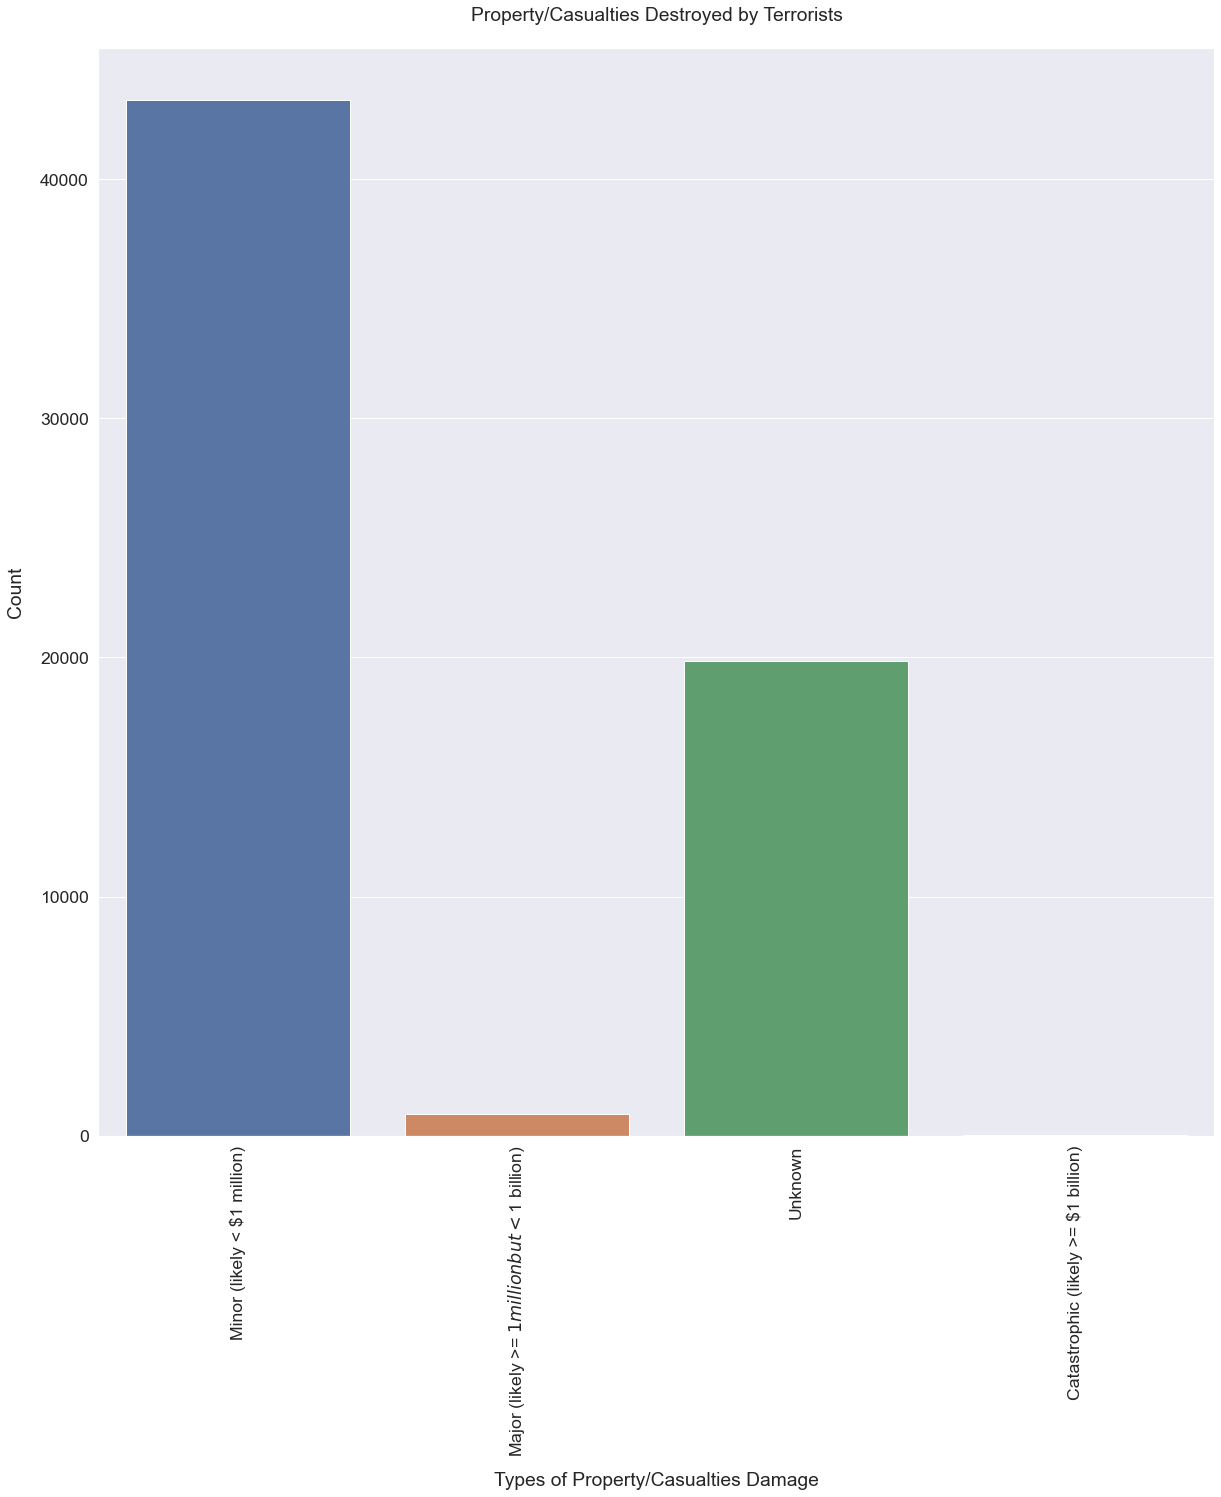

In [19]:
sns.set(font_scale=1.6)
plt.figure(figsize =(20,20))
sns.countplot(x = 'propextent_txt', data=data)
plt.title("Property/Casualties Destroyed by Terrorists", y=1.02)
plt.xlabel("Types of Property/Casualties Damage", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# most of the attacks had minor property damage followed by major property damage (less in number).

### Hostage Outcome in Terror Incidents

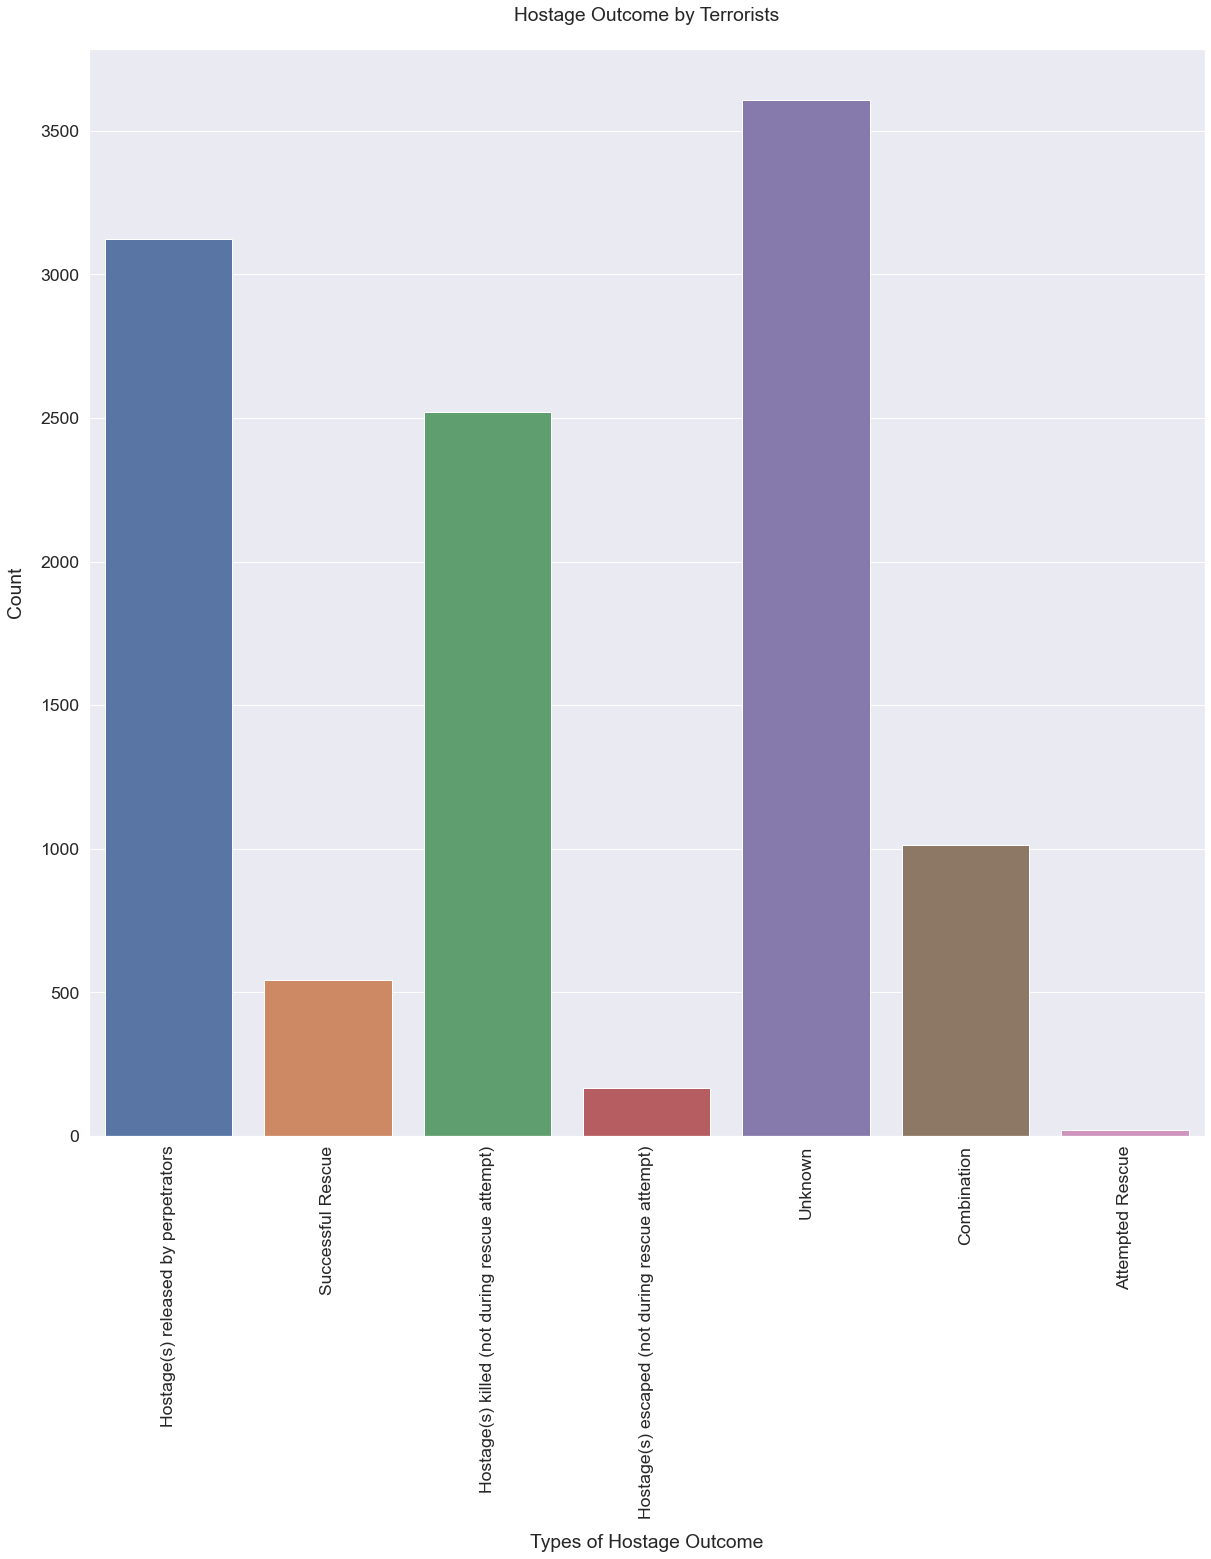

In [20]:
sns.set(font_scale=1.6)
plt.figure(figsize =(20,20))
sns.countplot(x = 'hostkidoutcome_txt', data=data)
plt.title("Hostage Outcome by Terrorists", y=1.02)
plt.xlabel("Types of Hostage Outcome", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.xticks(rotation = 90)
plt.show()
# most of the hostage incidents are unknown, whereas in reported cases hostages were released by terrorists, some were killed, etc. 

### Terrorists Activity Incidents (1970-2017)

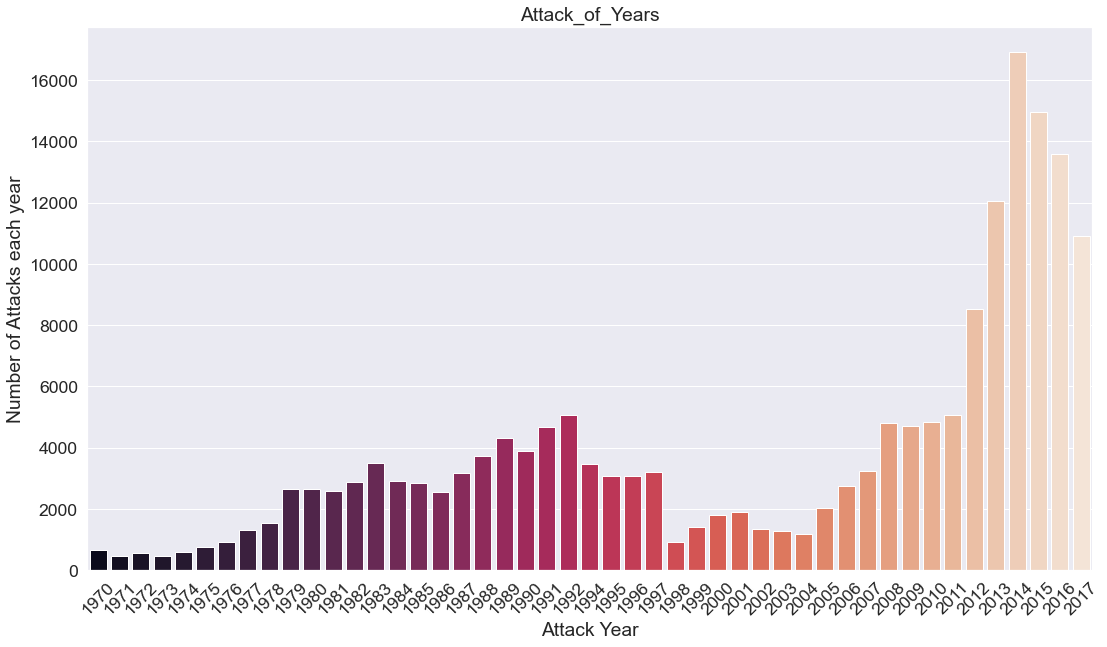

In [21]:
x_year = data['iyear'].unique()
y_count_years = data['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()
# Since the beginning of 2010's terrorsists activities has increased.

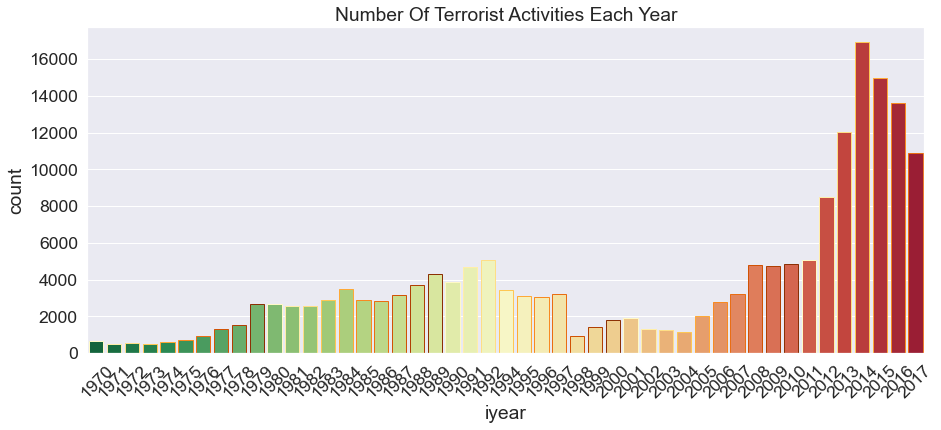

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [23]:
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


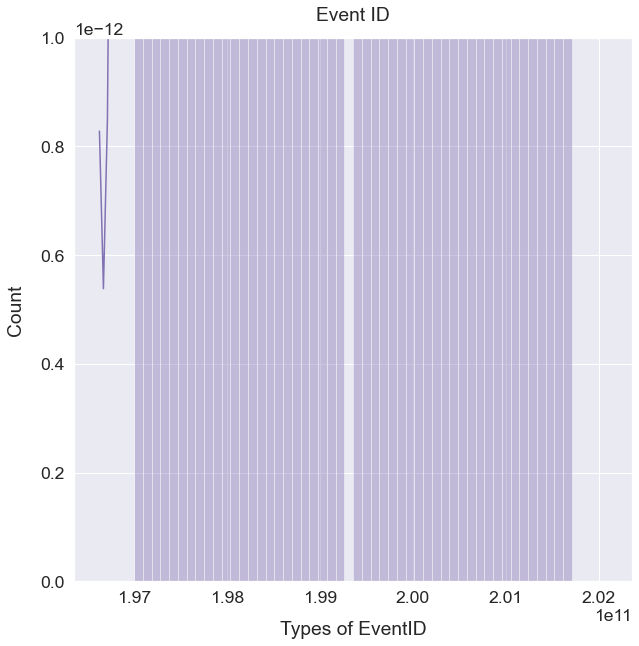

In [24]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.distplot(data.eventid, color = 'm')
plt.title("Event ID", y=1.02)
plt.xlabel("Types of EventID", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show() 
# no insight

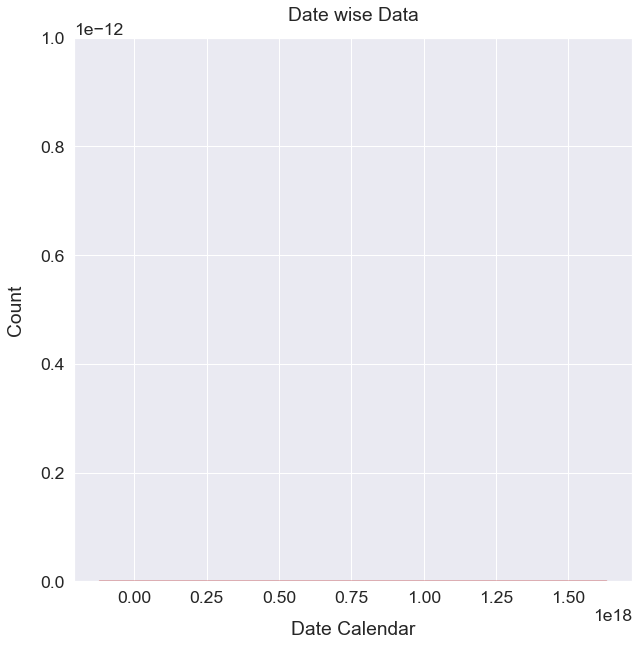

In [25]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.distplot(data.Date, color = 'r')
plt.title("Date wise Data", y=1.02)
plt.xlabel("Date Calendar", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


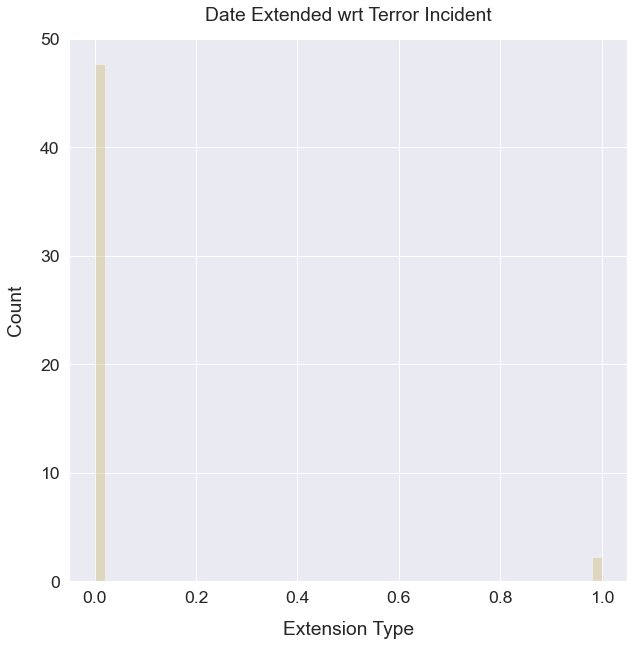

In [26]:
sns.set(font_scale=1.6) # only two possibilities either 0 or 1.
plt.figure(figsize =(10,10))
sns.distplot(data.extended, color = 'y')
plt.title("Date Extended wrt Terror Incident", y=1.02)
plt.xlabel("Extension Type", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

### Multiple Attacks wrt Terror Incident

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


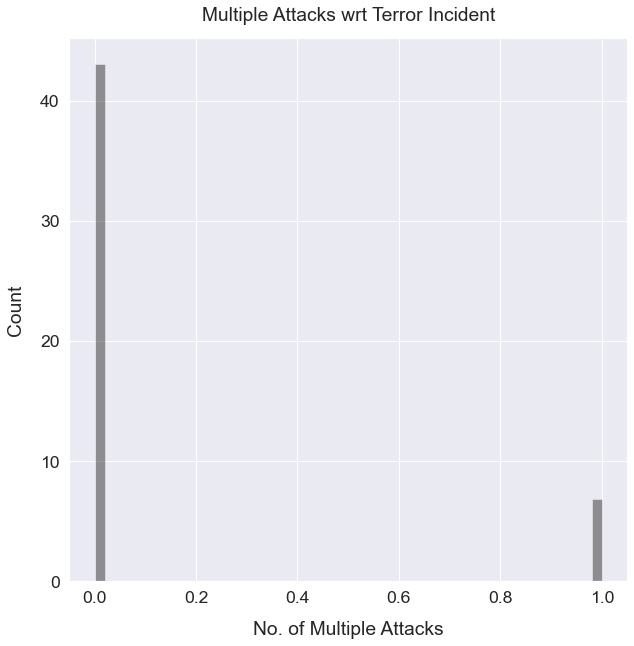

In [27]:
sns.set(font_scale=1.6) # meaning there were less cases of multiple attacks 
plt.figure(figsize =(10,10))
sns.distplot(data.multiple, color = 'black')
plt.title("Multiple Attacks wrt Terror Incident", y=1.02)
plt.xlabel("No. of Multiple Attacks", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

### Successful Attempt of Terror Incident

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


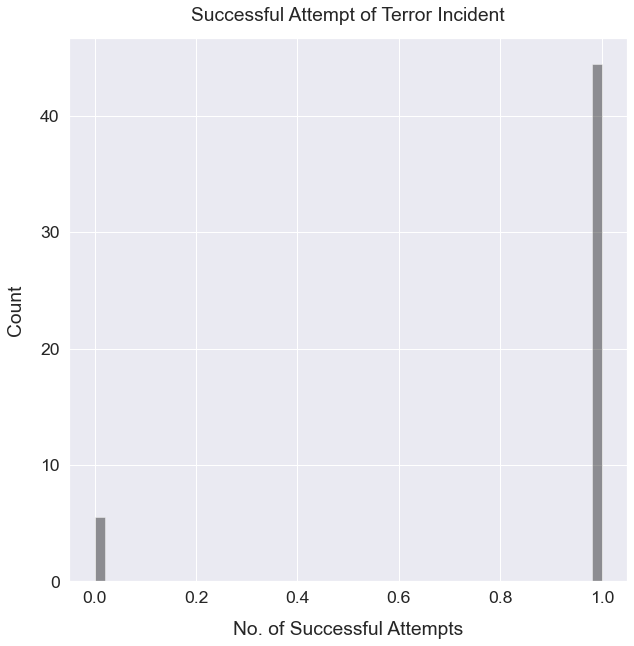

In [28]:
sns.set(font_scale=1.6) # there is high proportion of successful attempts in terror incidents
plt.figure(figsize =(10,10))
sns.distplot(data.success, color = 'black')
plt.title("Successful Attempt of Terror Incident", y=1.02)
plt.xlabel("No. of Successful Attempts", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

### Suicide Cases wrt Terror Incident

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


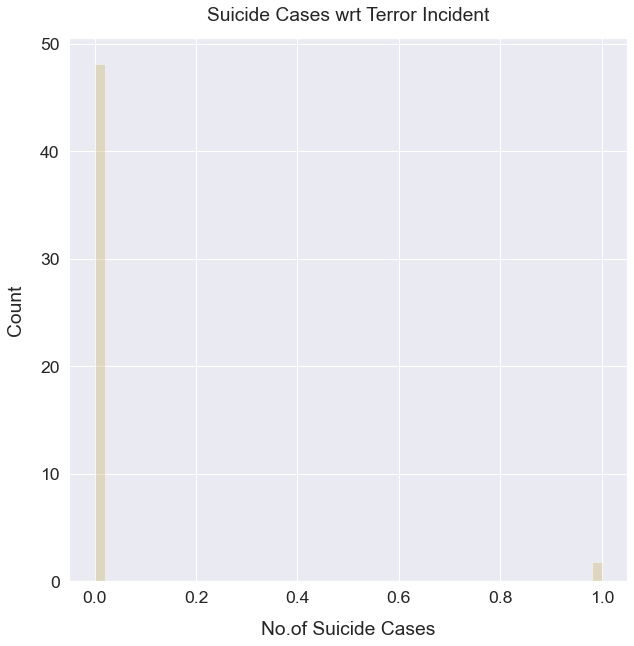

In [29]:
sns.set(font_scale=1.6) # most of the terror incidents did not have suicide cases.
plt.figure(figsize =(10,10))
sns.distplot(data.suicide, color = 'y')
plt.title("Suicide Cases wrt Terror Incident", y=1.02)
plt.xlabel("No.of Suicide Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

In [30]:
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


### Type of Terror Attack Cases

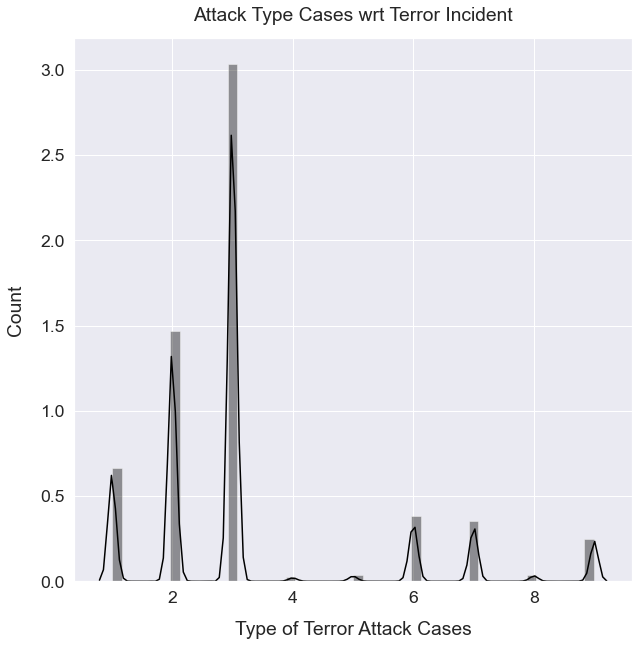

In [31]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.attacktype1, color = 'black')
plt.title("Attack Type Cases wrt Terror Incident", y=1.02)
plt.xlabel("Type of Terror Attack Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# most of the terror attack incidents did were bombing and explosion followed by armed assault and assassination.

###  Gun Attack Type Cases wrt Terror Incident

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


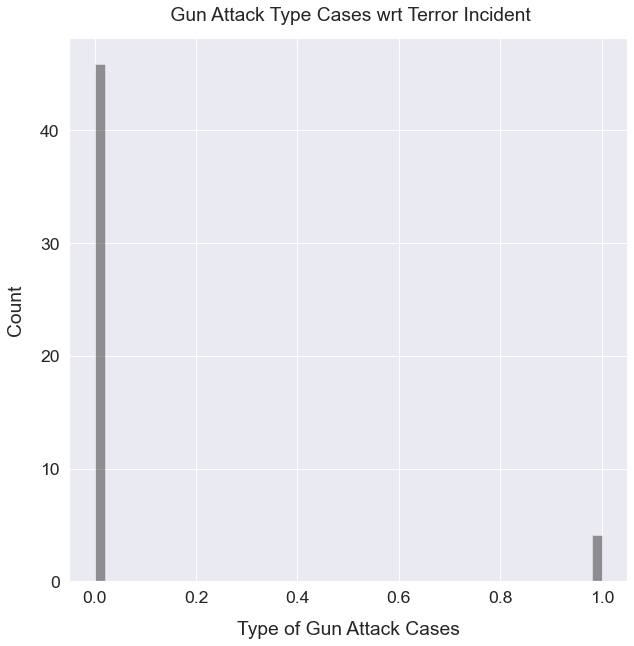

In [32]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.guncertain1, color = 'black')
plt.title(" Gun Attack Type Cases wrt Terror Incident", y=1.02)
plt.xlabel("Type of Gun Attack Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# most of the terror attacks were non gun related.

### Number of Terrorists wrt Terror Incident

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


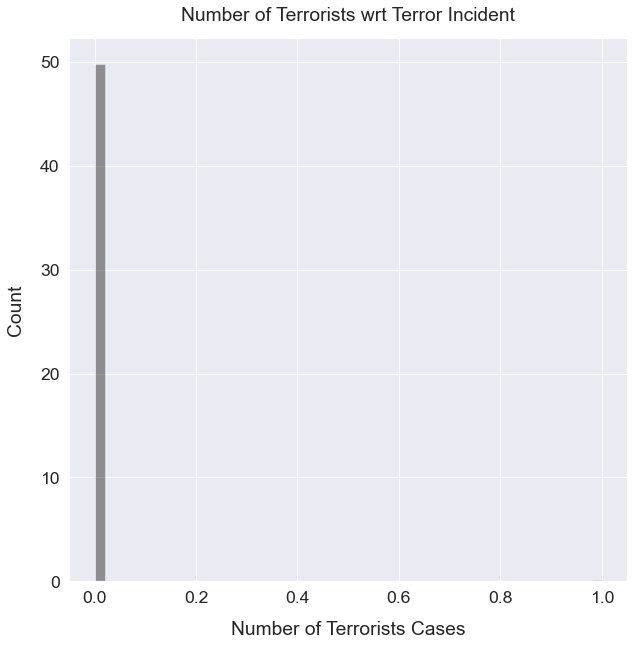

In [33]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.individual, color = 'black')
plt.title("Number of Terrorists wrt Terror Incident", y=1.02)
plt.xlabel("Number of Terrorists Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# not able to get any idea from this.

### Type of Perpetrators Cases

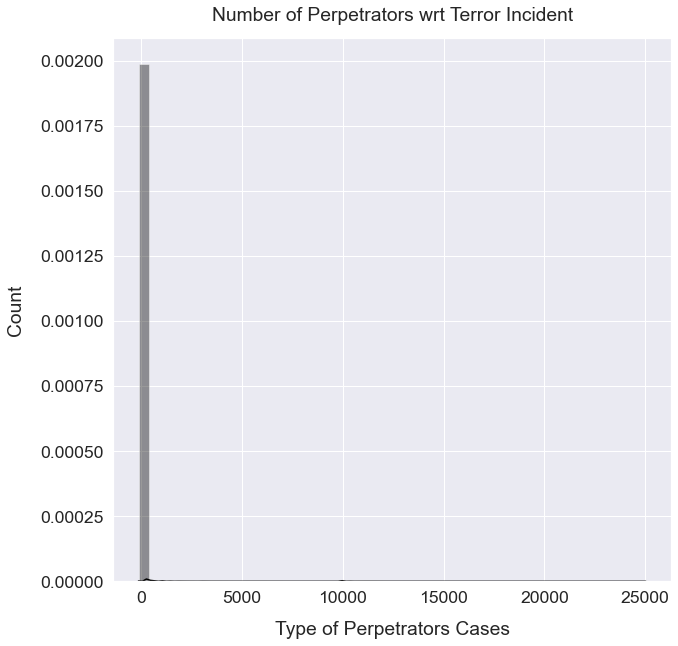

In [34]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nperps, color = 'black')
plt.title("Number of Perpetrators wrt Terror Incident", y=1.02)
plt.xlabel("Type of Perpetrators Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


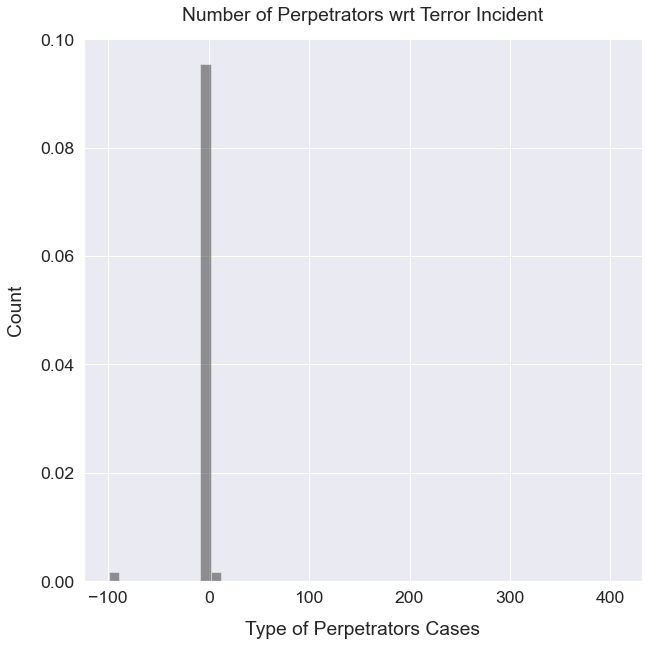

In [35]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nperpcap, color = 'black')
plt.title("Number of Perpetrators wrt Terror Incident", y=1.02)
plt.xlabel("Type of Perpetrators Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

### Number of Incidents Claimed by Terrorists

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


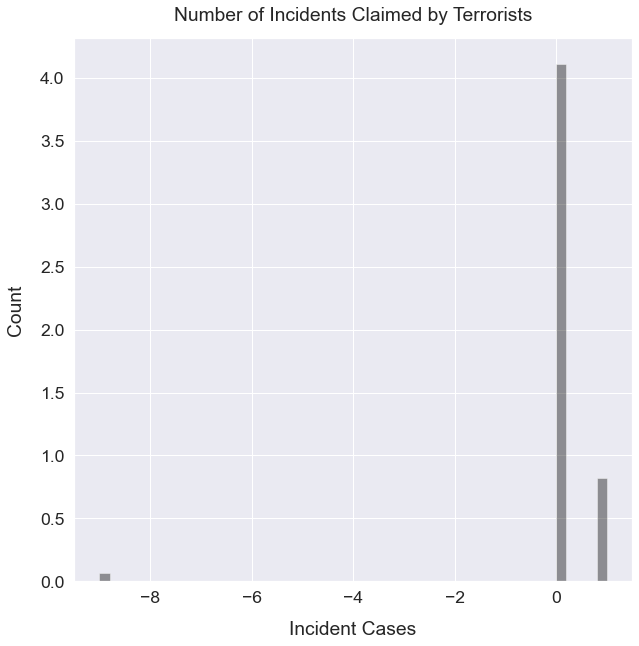

In [36]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.claimed, color = 'black')
plt.title("Number of Incidents Claimed by Terrorists", y=1.02)
plt.xlabel("Incident Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

### Type of Civilians Case

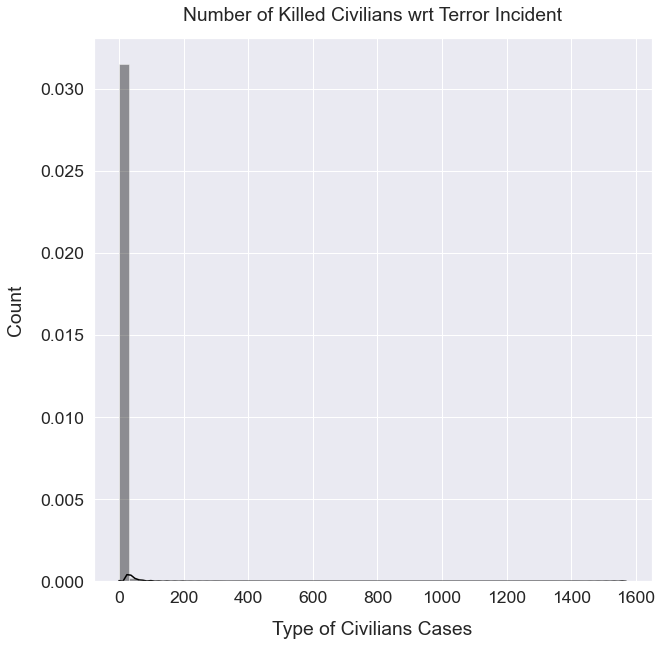

In [37]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nkill, color = 'black')
plt.title("Number of Killed Civilians wrt Terror Incident", y=1.02)
plt.xlabel("Type of Civilians Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

### Number of Wounded Civilians

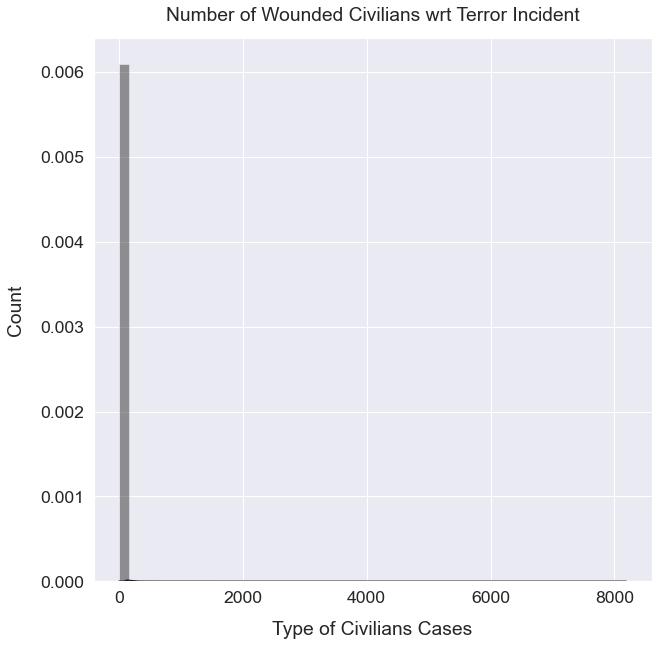

In [38]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nwound, color = 'black')
plt.title("Number of Wounded Civilians wrt Terror Incident", y=1.02)
plt.xlabel("Type of Civilians Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

### Type of Property Damage Cases

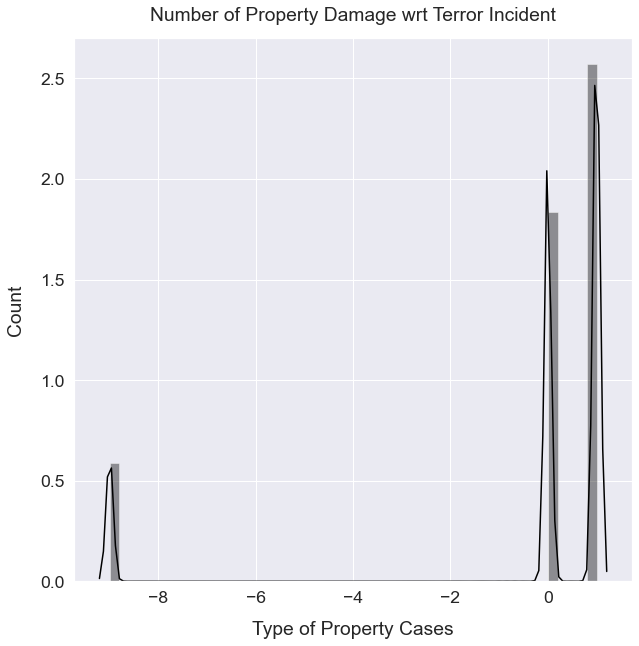

In [39]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.property, color = 'black')
plt.title("Number of Property Damage wrt Terror Incident", y=1.02)
plt.xlabel("Type of Property Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

In [40]:
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


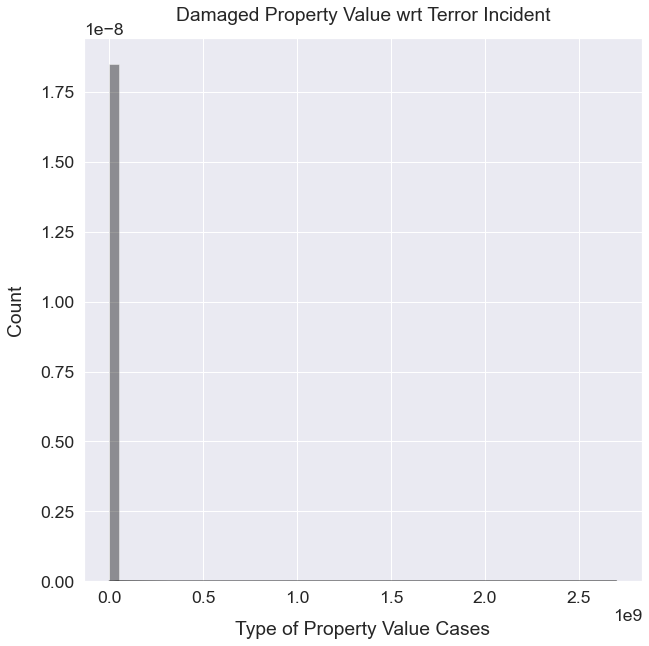

In [41]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.propvalue, color = 'black')
plt.title("Damaged Property Value wrt Terror Incident", y=1.02)
plt.xlabel("Type of Property Value Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

### Types of Hostage Cases

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


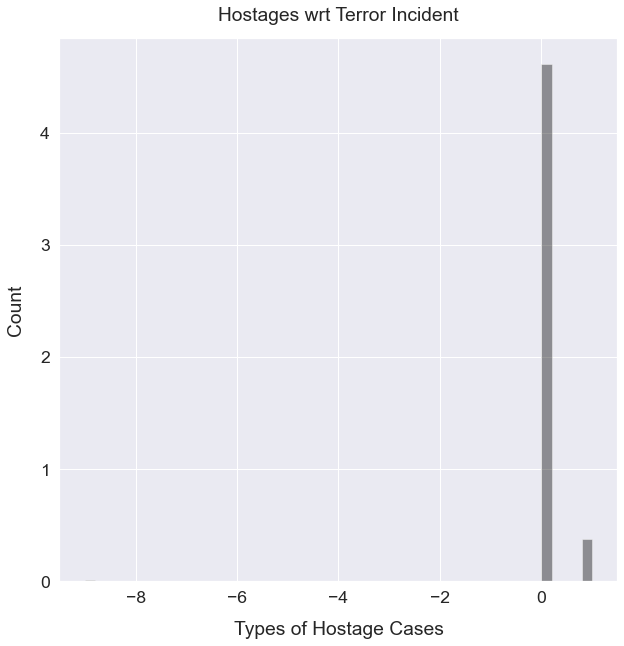

In [42]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ishostkid, color = 'black')
plt.title("Hostages wrt Terror Incident", y=1.02)
plt.xlabel("Types of Hostage Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

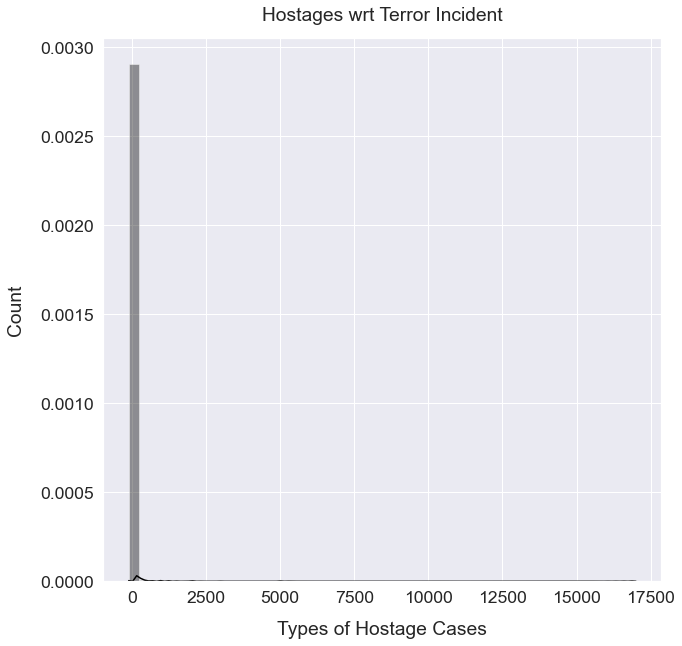

In [43]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nhostkid, color = 'black')
plt.title("Hostages wrt Terror Incident", y=1.02)
plt.xlabel("Types of Hostage Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


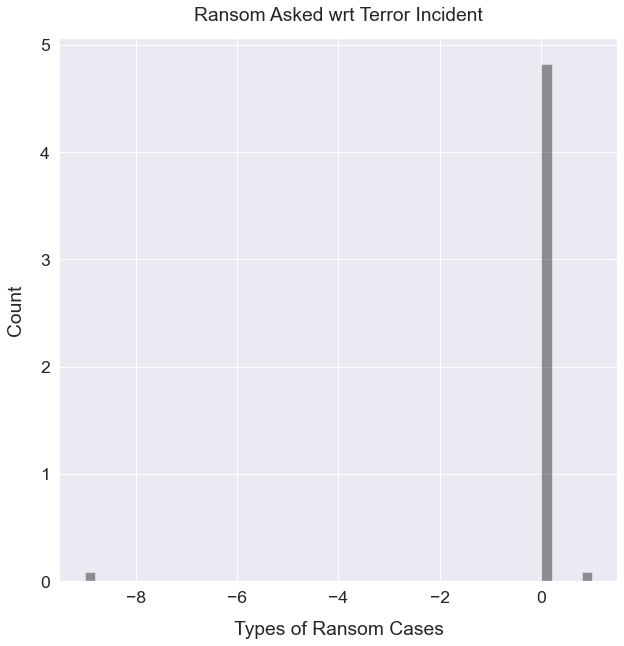

In [44]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ransom, color = 'black')
plt.title("Ransom Asked wrt Terror Incident", y=1.02)
plt.xlabel("Types of Ransom Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

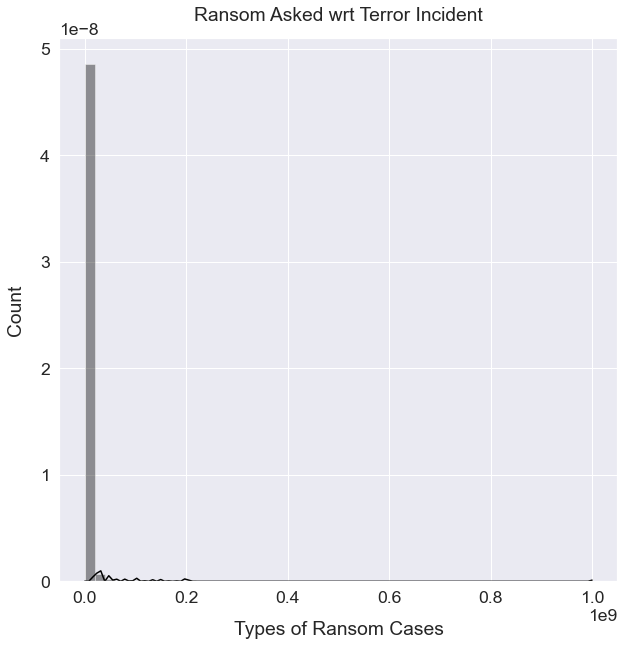

In [45]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ransomamt, color = 'black')
plt.title("Ransom Asked wrt Terror Incident", y=1.02)
plt.xlabel("Types of Ransom Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

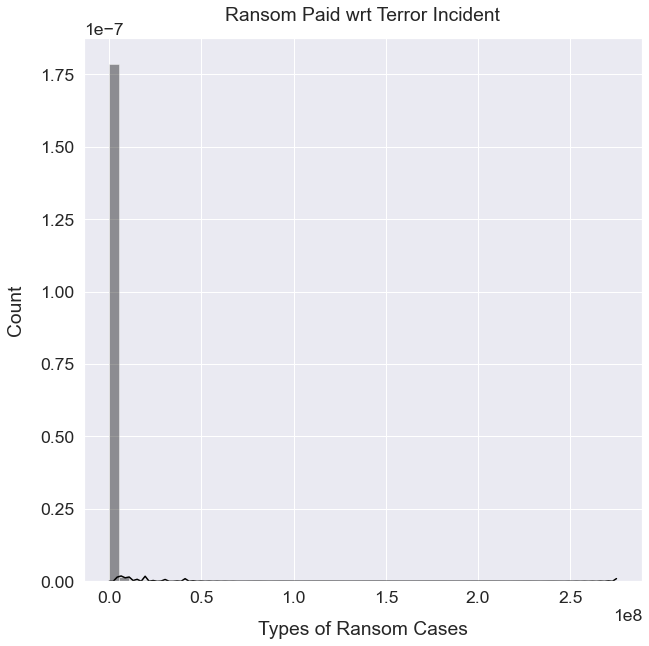

In [46]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ransompaid, color = 'black')
plt.title("Ransom Paid wrt Terror Incident", y=1.02)
plt.xlabel("Types of Ransom Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

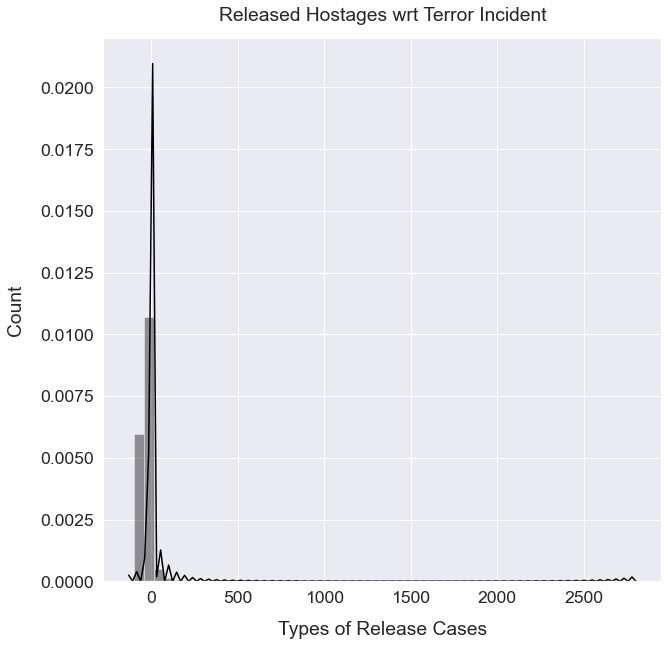

In [47]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nreleased, color = 'black')
plt.title("Released Hostages wrt Terror Incident", y=1.02)
plt.xlabel("Types of Release Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

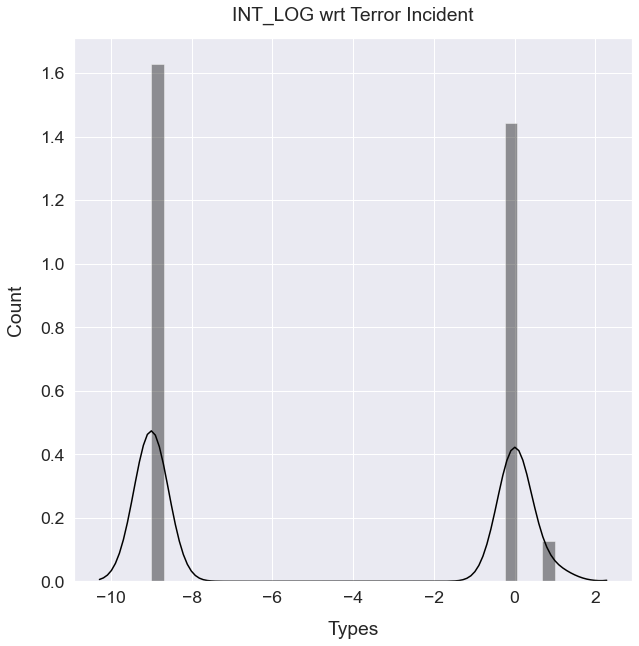

In [48]:
# ['INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.INT_LOG, color = 'black')
plt.title("INT_LOG wrt Terror Incident", y=1.02)
plt.xlabel("Types", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

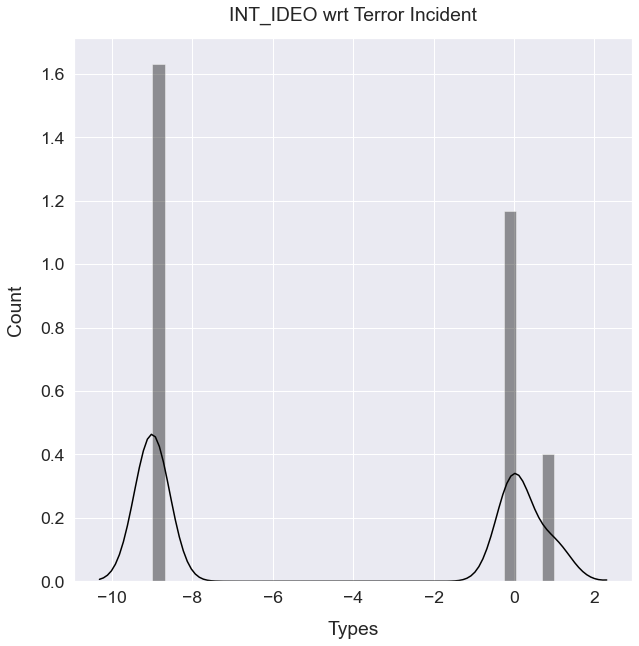

In [49]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.INT_IDEO, color = 'black')
plt.title("INT_IDEO wrt Terror Incident", y=1.02)
plt.xlabel("Types", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected.

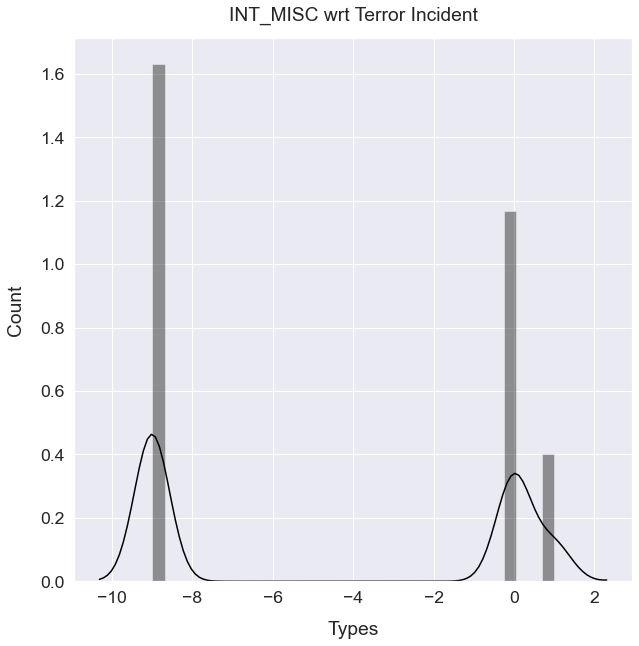

In [50]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.INT_IDEO, color = 'black')
plt.title("INT_MISC wrt Terror Incident", y=1.02)
plt.xlabel("Types", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected

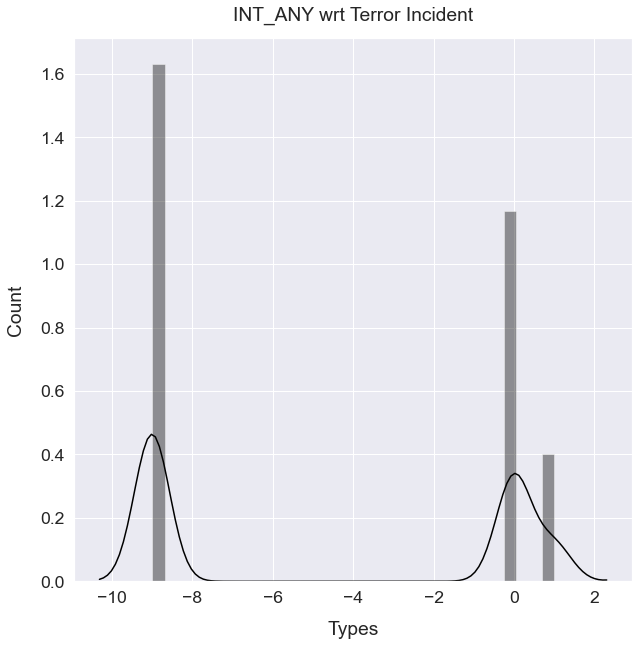

In [51]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.INT_IDEO, color = 'black')
plt.title("INT_ANY wrt Terror Incident", y=1.02)
plt.xlabel("Types", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()
# Information given is misleading, needs to be corrected

## Bivariate Analysis

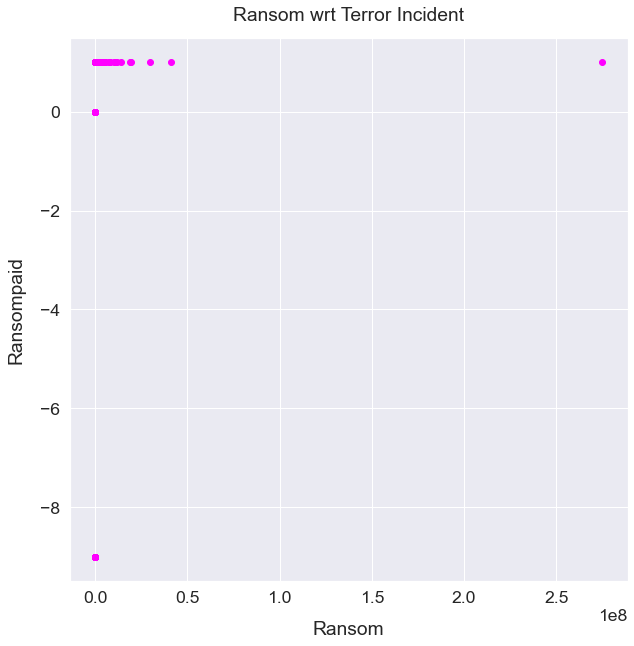

In [52]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.ransompaid, data.ransom, color = 'magenta')
plt.title("Ransom wrt Terror Incident", y=1.02)
plt.xlabel("Ransom", labelpad=15)
plt.ylabel("Ransompaid", labelpad=15)
plt.show() # Nothing

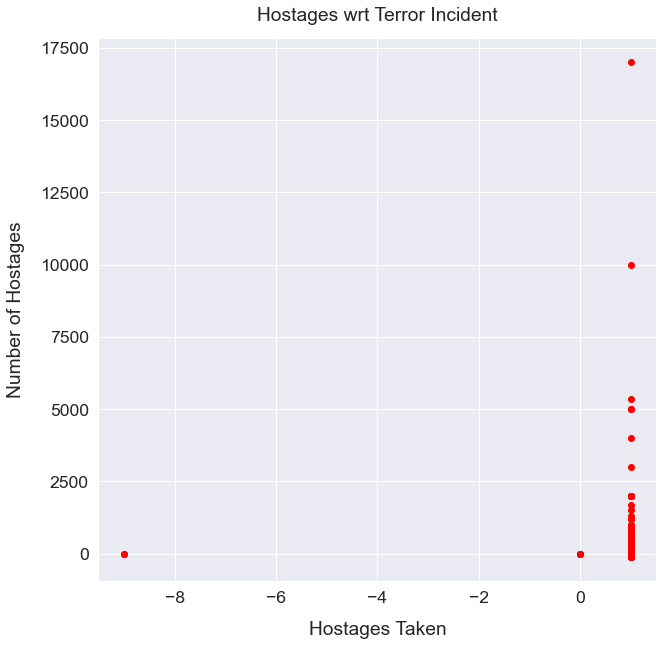

In [53]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.ishostkid, data.nhostkid, color = 'red')
plt.title("Hostages wrt Terror Incident", y=1.02)
plt.xlabel("Hostages Taken", labelpad=15)
plt.ylabel("Number of Hostages", labelpad=15)
plt.show() # Nothing

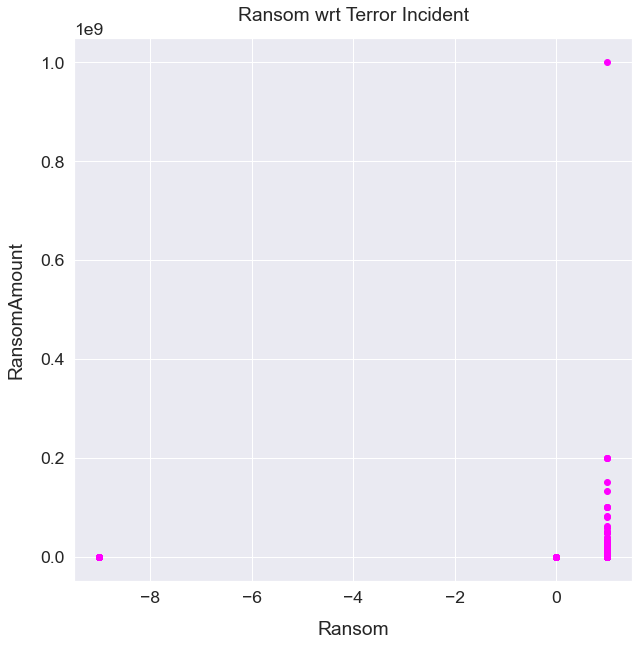

In [54]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.ransom, data.ransomamt, color = 'magenta')
plt.title("Ransom wrt Terror Incident", y=1.02)
plt.xlabel("Ransom", labelpad=15)
plt.ylabel("RansomAmount", labelpad=15)
plt.show() # Nothing

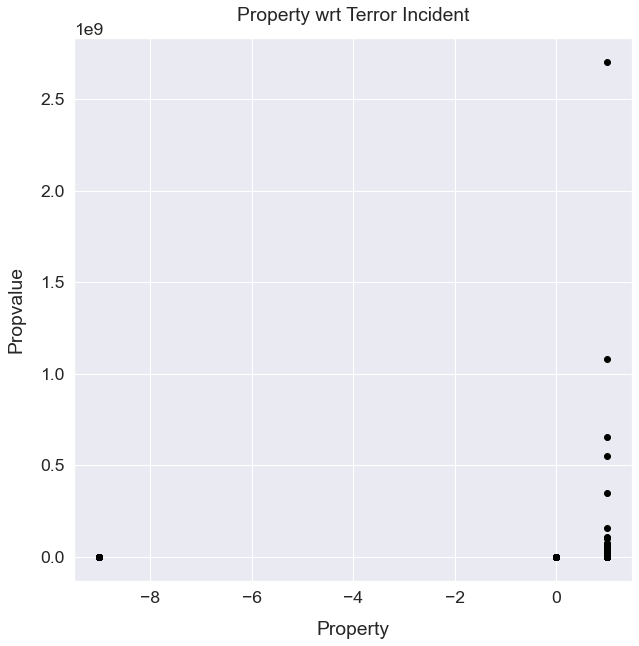

In [55]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.property, data.propvalue, color = 'black')
plt.title("Property wrt Terror Incident", y=1.02)
plt.xlabel("Property", labelpad=15)
plt.ylabel("Propvalue", labelpad=15)
plt.show() # Nothing

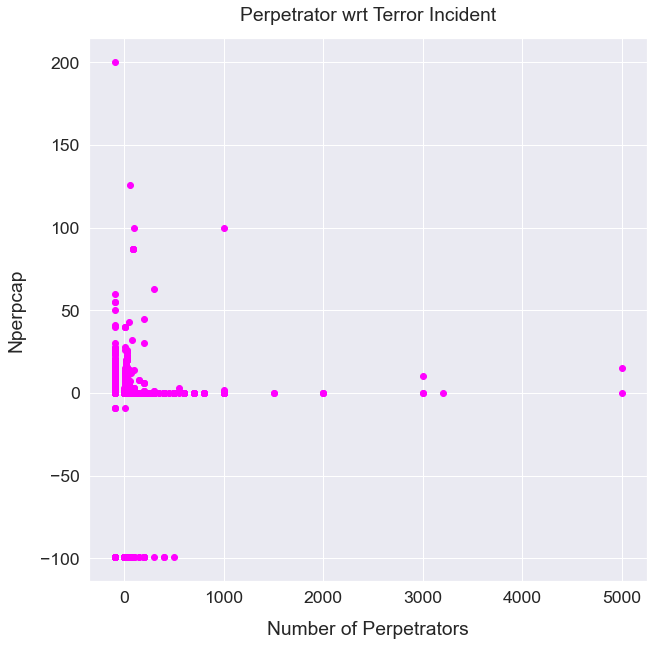

In [56]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.nperps, data.nperpcap, color = 'magenta')
plt.title("Perpetrator wrt Terror Incident", y=1.02)
plt.xlabel("Number of Perpetrators", labelpad=15)
plt.ylabel("Nperpcap", labelpad=15)
plt.show()

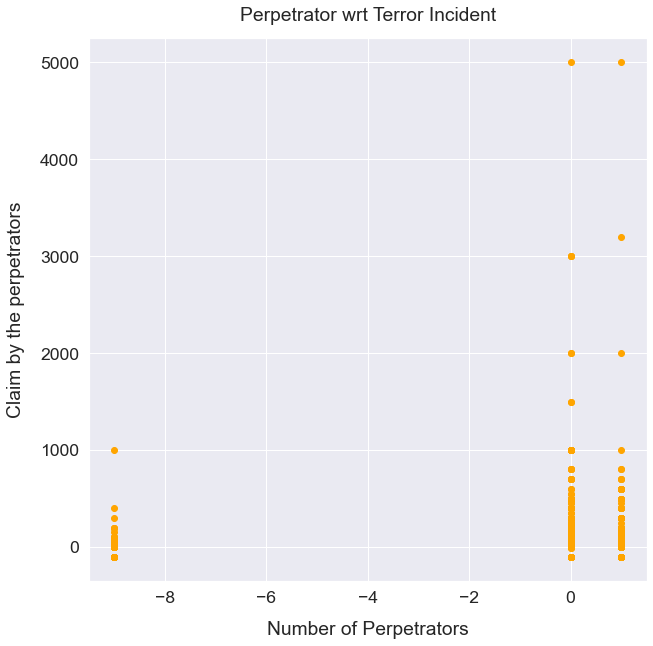

In [58]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.claimed, data.nperps, color = 'orange')
plt.title("Perpetrator wrt Terror Incident", y=1.02)
plt.xlabel("Number of Perpetrators", labelpad=15)
plt.ylabel("Claim by the perpetrators", labelpad=15)
plt.show() # Nothing

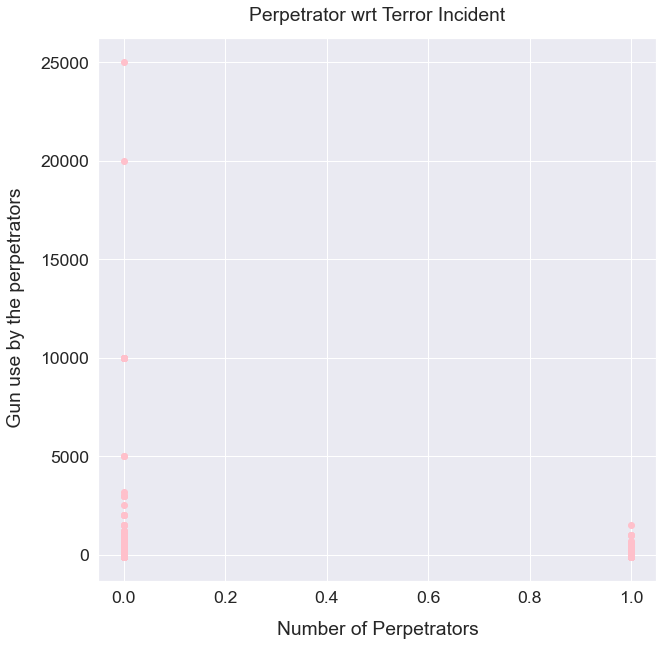

In [59]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.guncertain1, data.nperps, color = 'pink')
plt.title("Perpetrator wrt Terror Incident", y=1.02)
plt.xlabel("Number of Perpetrators", labelpad=15)
plt.ylabel(" Gun use by the perpetrators", labelpad=15)
plt.show() # very less use of gun in the terror incidents.

In [60]:
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


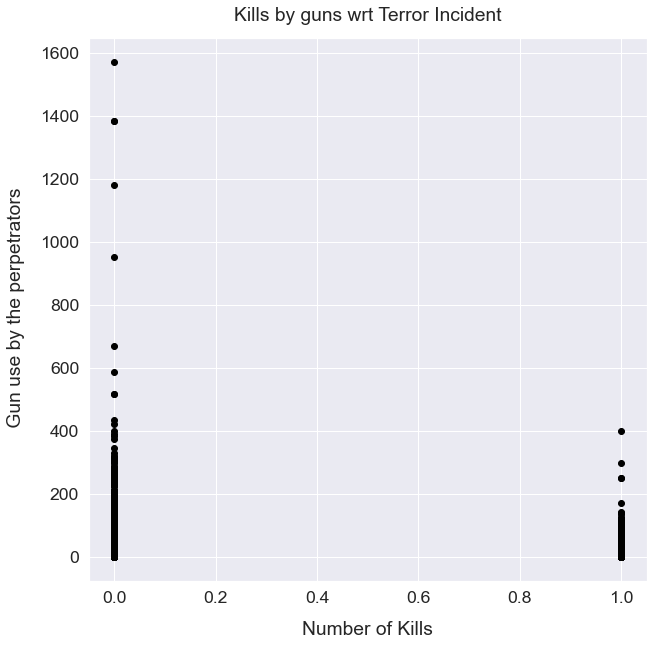

In [61]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.guncertain1, data.nkill, color = 'black')
plt.title("Kills by guns wrt Terror Incident", y=1.02)
plt.xlabel("Number of Kills", labelpad=15)
plt.ylabel(" Gun use by the perpetrators", labelpad=15)
plt.show() # very less use of gun in the terror incidents.

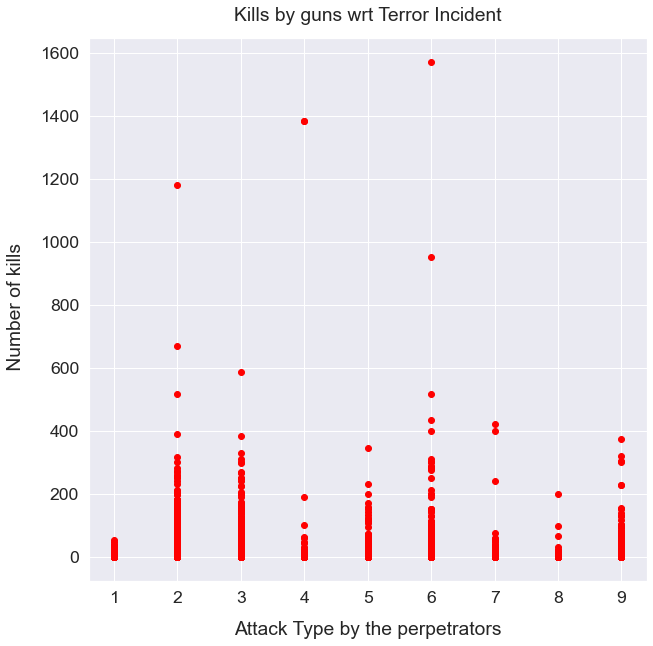

In [62]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.attacktype1, data.nkill, color = 'red')
plt.title("Kills by guns wrt Terror Incident", y=1.02)
plt.xlabel("Attack Type by the perpetrators", labelpad=15)
plt.ylabel(" Number of kills", labelpad=15)
plt.show() 
# Most number of kills are by attack type 6.

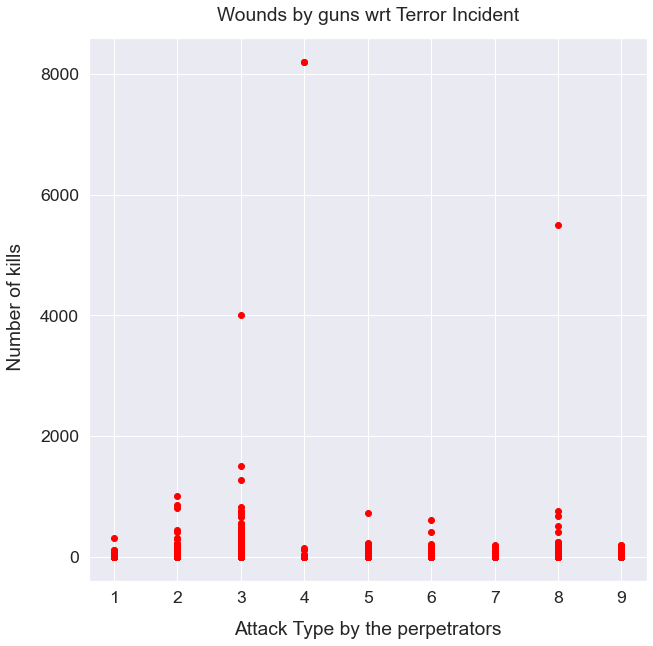

In [234]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.attacktype1, data.nwound, color = 'red')
plt.title("Wounds by guns wrt Terror Incident", y=1.02)
plt.xlabel("Attack Type by the perpetrators", labelpad=15)
plt.ylabel(" Number of kills", labelpad=15)
plt.show() 

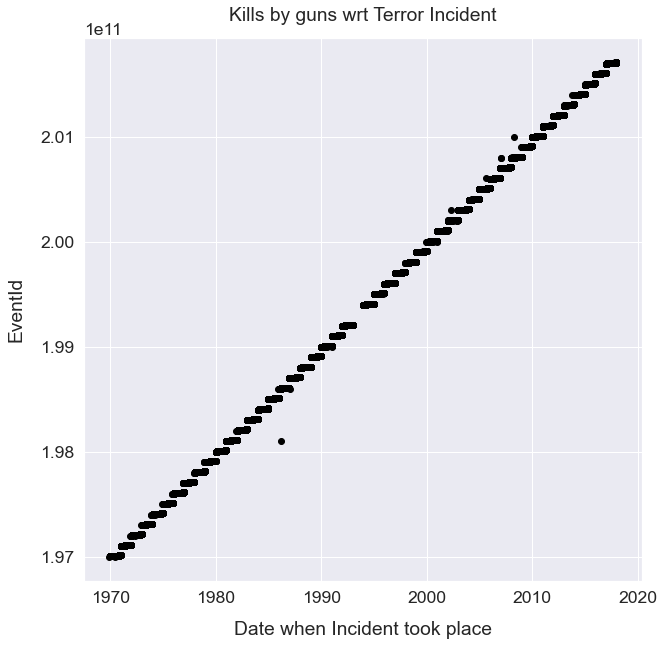

In [64]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.Date, data.eventid, color = 'black')
plt.title("Kills by guns wrt Terror Incident", y=1.02)
plt.xlabel("Date when Incident took place", labelpad=15)
plt.ylabel("EventId", labelpad=15)
plt.show() # Nothing

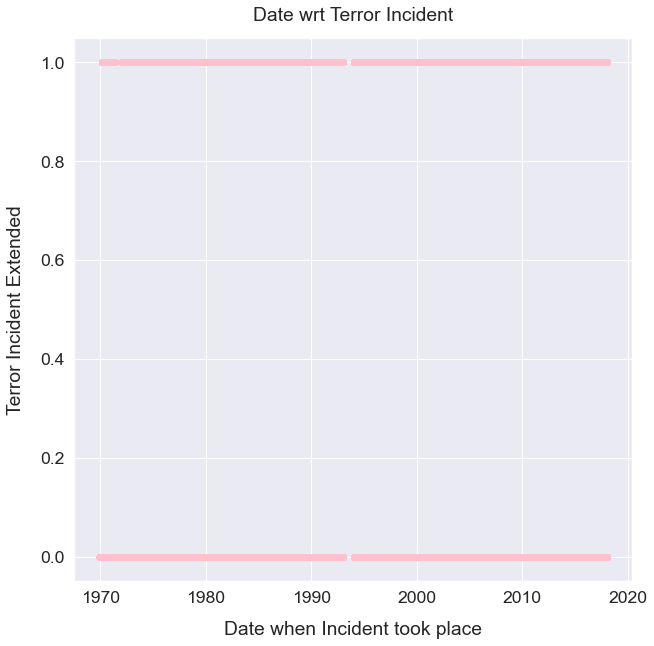

In [65]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.Date, data.extended, color = 'pink')
plt.title("Date wrt Terror Incident", y=1.02)
plt.xlabel("Date when Incident took place", labelpad=15)
plt.ylabel("Terror Incident Extended", labelpad=15)
plt.show() 

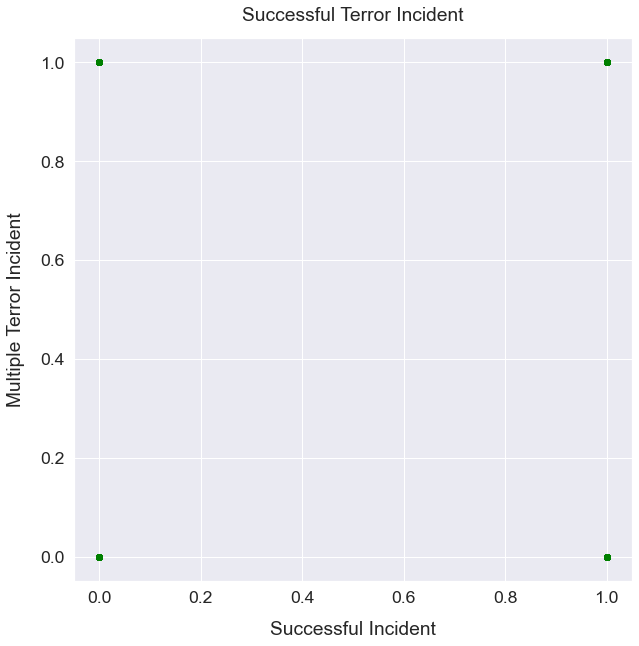

In [66]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.success, data.multiple, color = 'green')
plt.title("Successful Terror Incident", y=1.02)
plt.xlabel("Successful Incident", labelpad=15)
plt.ylabel("Multiple Terror Incident", labelpad=15)
plt.show() # Nothing

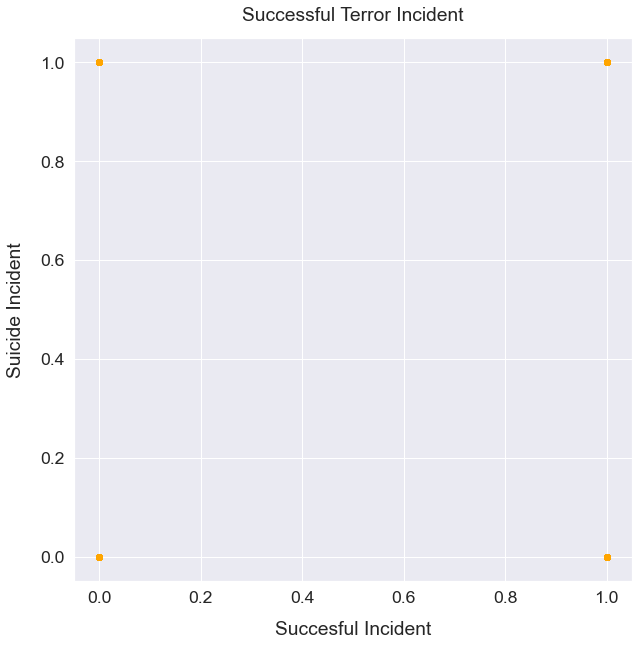

In [67]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.success, data.suicide, color = 'orange')
plt.title("Successful Terror Incident", y=1.02)
plt.xlabel("Succesful Incident", labelpad=15)
plt.ylabel("Suicide Incident", labelpad=15)
plt.show() # Nothing

In [68]:
list1 = []
list2 = []
for i in data:
    if data[i].dtype == ('object'):
        list1.append(i)
    else:
        list2.append(i)
print(list1)
print(list2)

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']
['eventid', 'iyear', 'Date', 'extended', 'multiple', 'success', 'suicide', 'attacktype1', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'nkill', 'nwound', 'property', 'propvalue', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


In [69]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.region_txt).T

country_txt                  Afghanistan  Albania  Algeria  Andorra  Angola  \
region_txt                                                                    
Australasia & Oceania                  0        0        0        0       0   
Central America & Caribbean            0        0        0        0       0   
Central Asia                           0        0        0        0       0   
East Asia                              0        0        0        0       0   
Eastern Europe                         0       80        0        0       0   
Middle East & North Africa             0        0     2743        0       0   
North America                          0        0        0        0       0   
South America                          0        0        0        0       0   
South Asia                         12731        0        0        0       0   
Southeast Asia                         0        0        0        0       0   
Sub-Saharan Africa                     0        0        0        0     499   
Western Europe                         0        0        0        1       0   

country_txt                  Antigua and Barbuda  Argentina  Armenia  \
region_txt                                                             
Australasia & Oceania                          0          0        0   
Central America & Caribbean                    1          0        0   
Central Asia                                   0          0       24   
East Asia                                      0          0        0   
Eastern Europe                                 0          0        0   
Middle East & North Africa                     0          0        0   
North America                                  0          0        0   
South America                                  0        815        0   
South Asia                                     0          0        0   
Southeast Asia                                 0          0        0   
Sub-Saharan Africa                             0          0        0   
Western Europe                                 0          0        0   

country_txt                  Australia  Austria  ...  Vietnam  \
region_txt                                       ...            
Australasia & Oceania              114        0  ...        0   
Central America & Caribbean          0        0  ...        0   
Central Asia                         0        0  ...        0   
East Asia                            0        0  ...        0   
Eastern Europe                       0        0  ...        0   
Middle East & North Africa           0        0  ...        0   
North America                        0        0  ...        0   
South America                        0        0  ...        0   
South Asia                           0        0  ...        0   
Southeast Asia                       0        0  ...       12   
Sub-Saharan Africa                   0        0  ...        0   
Western Europe                       0      115  ...        0   

country_txt                  Wallis and Futuna  West Bank and Gaza Strip  \
region_txt                                                                 
Australasia & Oceania                        1                         0   
Central America & Caribbean                  0                         0   
Central Asia                                 0                         0   
East Asia                                    0                         0   
Eastern Europe                               0                         0   
Middle East & North Africa                   0                      2227   
North America                                0                         0   
South America                                0                         0   
South Asia                                   0                         0   
Southeast Asia                               0                         0   
Sub-Saharan Africa                           0               

<Figure size 720x720 with 0 Axes>

In [70]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.provstate).T

country_txt                                      Afghanistan  Albania  \
provstate                                                               
(Region) of Republican Subordination (Province)            0        0   
(Republic of) Ingushetia                                   0        0   
A Coruna                                                   0        0   
Aargau                                                     0        0   
Abia                                                       0        0   
...                                                      ...      ...   
sakon nakhon                                               0        0   
samut prakan                                               0        0   
saraburi                                                   0        0   
sulawesi utara                                             0        0   
unknown                                                    0        0   

country_txt                                      Algeria  Andorra  Angola  \
provstate                                                                   
(Region) of Republican Subordination (Province)        0        0       0   
(Republic of) Ingushetia                               0        0       0   
A Coruna                                               0        0       0   
Aargau                                                 0        0       0   
Abia                                                   0        0       0   
...                                                  ...      ...     ...   
sakon nakhon                                           0        0       0   
samut prakan                                           0        0       0   
saraburi                                               0        0       0   
sulawesi utara                                         0        0       0   
unknown                                                0        0       0   

country_txt                                      Antigua and Barbuda  \
provstate                                                              
(Region) of Republican Subordination (Province)                    0   
(Republic of) Ingushetia                                           0   
A Coruna                                                           0   
Aargau                                                             0   
Abia                                                               0   
...                                                              ...   
sakon nakhon                                                       0   
samut prakan                                                       0   
saraburi                                                           0   
sulawesi utara                                                     0   
unknown                                                            0   

country_txt                                      Argentina  Armenia  \
provstate                                                             
(Region) of Republican Subordination (Province)          0        0   
(Republic of) Ingushetia                                 0        0   
A Coruna                                                 0        0   
Aargau                                                   0        0   
Abia                                                     0        0   
...                                                    ...      ...   
sakon nakhon                                             0        0   
samut prakan                                             0        0   
saraburi                                                 0        0   
sulawesi utara                                           0        0   
unknown                                                  0        0   

country_txt                                      Australia  Austria  ...  \
provstate                                                            ...   
(Region) of Republican Subordinatio

<Figure size 720x720 with 0 Axes>

In [71]:
plt.figure(figsize =(10,10))
pd.crosstab(data.region_txt, data.provstate).T

region_txt                                       Australasia & Oceania  \
provstate                                                                
(Region) of Republican Subordination (Province)                      0   
(Republic of) Ingushetia                                             0   
A Coruna                                                             0   
Aargau                                                               0   
Abia                                                                 0   
...                                                                ...   
sakon nakhon                                                         0   
samut prakan                                                         0   
saraburi                                                             0   
sulawesi utara                                                       0   
unknown                                                              0   

region_txt                                       Central America & Caribbean  \
provstate                                                                      
(Region) of Republican Subordination (Province)                            0   
(Republic of) Ingushetia                                                   0   
A Coruna                                                                   0   
Aargau                                                                     0   
Abia                                                                       0   
...                                                                      ...   
sakon nakhon                                                               0   
samut prakan                                                               0   
saraburi                                                                   0   
sulawesi utara                                                             0   
unknown                                                                    0   

region_txt                                       Central Asia  East Asia  \
provstate                                                                  
(Region) of Republican Subordination (Province)             1          0   
(Republic of) Ingushetia                                    0          0   
A Coruna                                                    0          0   
Aargau                                                      0          0   
Abia                                                        0          0   
...                                                       ...        ...   
sakon nakhon                                                0          0   
samut prakan                                                0          0   
saraburi                                                    0          0   
sulawesi utara                                              0          0   
unknown                                                     0          0   

region_txt                                       Eastern Europe  \
provstate                                                         
(Region) of Republican Subordination (Province)               0   
(Republic of) Ingushetia                                      1   
A Coruna                                                      0   
Aargau                                                        0   
Abia                                                          0   
...                                                         ...   
sakon nakhon                                                  0   
samut prakan                                                  0   
saraburi                                                      0   
sulawesi utara                                                0   
unknown                                                       0   

region_txt                                       Middle East & North Africa  \
provstate                                               

<Figure size 720x720 with 0 Axes>

In [72]:
plt.figure(figsize =(10,10))
pd.crosstab(data.city, data.region_txt).T

city                         62 miles South of Dushanbe  A Coruna district  \
region_txt                                                                   
Australasia & Oceania                                 0                  0   
Central America & Caribbean                           0                  0   
Central Asia                                          1                  0   
East Asia                                             0                  0   
Eastern Europe                                        0                  0   
Middle East & North Africa                            0                  0   
North America                                         0                  0   
South America                                         0                  0   
South Asia                                            0                  0   
Southeast Asia                                        0                  0   
Sub-Saharan Africa                                    0                  0   
Western Europe                                        0                 20   

city                         A'arbaniyeh  ANkara  Aab Kamra  Aabde  Aabdeh  \
region_txt                                                                   
Australasia & Oceania                  0       0          0      0       0   
Central America & Caribbean            0       0          0      0       0   
Central Asia                           0       0          0      0       0   
East Asia                              0       0          0      0       0   
Eastern Europe                         0       0          0      0       0   
Middle East & North Africa             1       1          0      1       1   
North America                          0       0          0      0       0   
South America                          0       0          0      0       0   
South Asia                             0       0          1      0       0   
Southeast Asia                         0       0          0      0       0   
Sub-Saharan Africa                     0       0          0      0       0   
Western Europe                         0       0          0      0       0   

city                         Aabgarmak  Aachen  Aadaisse  ...  uri  \
region_txt                                                ...        
Australasia & Oceania                0       0         0  ...    0   
Central America & Caribbean          0       0         0  ...    0   
Central Asia                         0       0         0  ...    0   
East Asia                            0       0         0  ...    0   
Eastern Europe                       0       0         0  ...    0   
Middle East & North Africa           0       0         1  ...    0   
North America                        0       0         0  ...    0   
South America                        0       0         0  ...    0   
South Asia                           1       0         0  ...    1   
Southeast Asia                       0       0         0  ...    0   
Sub-Saharan Africa                   0       0         0  ...    0   
Western Europe                       0       4         0  ...    0   

city                         valledupar  valparaiso  vilcashuaman  \
region_txt                                                          
Australasia & Oceania                 0           0             0   
Central America & Caribbean           0           0             0   
Central Asia                          0           0             0   
East Asia                             0           0             0   
Eastern Europe                        0           0             0   
Middle East & North Africa            0           0             0   
North America                         0           0             0   
South America                         1           2             2   
South Asia                            0           0             0   
Southeast Asia                        0           0             0   
Sub-S

<Figure size 720x720 with 0 Axes>

In [73]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.city).T

country_txt                 Afghanistan  Albania  Algeria  Andorra  Angola  \
city                                                                         
62 miles South of Dushanbe            0        0        0        0       0   
A Coruna district                     0        0        0        0       0   
A'arbaniyeh                           0        0        0        0       0   
ANkara                                0        0        0        0       0   
Aab Kamra                             1        0        0        0       0   
...                                 ...      ...      ...      ...     ...   
vinchos                               0        0        0        0       0   
wakunai                               0        0        0        0       0   
yacan                                 0        0        0        0       0   
yokohama                              0        0        0        0       0   
zinarag                               0        0        0        0       0   

country_txt                 Antigua and Barbuda  Argentina  Armenia  \
city                                                                  
62 miles South of Dushanbe                    0          0        0   
A Coruna district                             0          0        0   
A'arbaniyeh                                   0          0        0   
ANkara                                        0          0        0   
Aab Kamra                                     0          0        0   
...                                         ...        ...      ...   
vinchos                                       0          0        0   
wakunai                                       0          0        0   
yacan                                         0          0        0   
yokohama                                      0          0        0   
zinarag                                       0          0        0   

country_txt                 Australia  Austria  ...  Vietnam  \
city                                            ...            
62 miles South of Dushanbe          0        0  ...        0   
A Coruna district                   0        0  ...        0   
A'arbaniyeh                         0        0  ...        0   
ANkara                              0        0  ...        0   
Aab Kamra                           0        0  ...        0   
...                               ...      ...  ...      ...   
vinchos                             0        0  ...        0   
wakunai                             0        0  ...        0   
yacan                               0        0  ...        0   
yokohama                            0        0  ...        0   
zinarag                             0        0  ...        0   

country_txt                 Wallis and Futuna  West Bank and Gaza Strip  \
city                                                                      
62 miles South of Dushanbe                  0                         0   
A Coruna district                           0                         0   
A'arbaniyeh                                 0                         0   
ANkara                                      0                         0   
Aab Kamra                                   0                         0   
...                                       ...                       ...   
vinchos                                     0                         0   
wakunai                                     0                         0   
yacan                                       0                         0   
yokohama                                    0                         0   
zinarag                                     0                         0   

country_txt                 West Germany (FRG)  Western Sahara  Yemen  \
city                                                                    
62 miles South of Dushanbe                   0               0      0   
A Coruna district                

<Figure size 720x720 with 0 Axes>

In [74]:
plt.figure(figsize =(10,10))
pd.crosstab(data.alternative_txt, data.attacktype1_txt).T 
# Most terror incidents were insurgency/gureilla action and the attack took place by armed assault, assassination and bomb explosion.

alternative_txt                      Insurgency/Guerilla Action  \
attacktype1_txt                                                   
Armed Assault                                             10065   
Assassination                                              1293   
Bombing/Explosion                                          9204   
Facility/Infrastructure Attack                              181   
Hijacking                                                    14   
Hostage Taking (Barricade Incident)                          22   
Hostage Taking (Kidnapping)                                 513   
Unarmed Assault                                              75   
Unknown                                                    2043   

alternative_txt                      Intra/Inter-group Conflict  \
attacktype1_txt                                                   
Armed Assault                                               399   
Assassination                                               325   
Bombing/Explosion                                           316   
Facility/Infrastructure Attack                               24   
Hijacking                                                     0   
Hostage Taking (Barricade Incident)                           1   
Hostage Taking (Kidnapping)                                  93   
Unarmed Assault                                               9   
Unknown                                                     129   

alternative_txt                      Lack of Intentionality  Other Crime Type  \
attacktype1_txt                                                                 
Armed Assault                                            78              1259   
Assassination                                             9               749   
Bombing/Explosion                                       164               735   
Facility/Infrastructure Attack                           31               301   
Hijacking                                                 2                19   
Hostage Taking (Barricade Incident)                       0                59   
Hostage Taking (Kidnapping)                              13               443   
Unarmed Assault                                          14                51   
Unknown                                                   8                49   

alternative_txt                      State Actors  
attacktype1_txt                                    
Armed Assault                                  61  
Assassination                                  32  
Bombing/Explosion                             166  
Facility/Infrastructure Attack                 17  
Hijacking                                       1  
Hostage Taking (Barricade Incident)             1  
Hostage Taking (Kidnapping)                    32  
Unarmed Assault                                 1  
Unknown                                        10

<Figure size 720x720 with 0 Axes>

In [75]:
plt.figure(figsize =(10,10))
pd.crosstab(data.attacktype1_txt, data.gname)
# There are many terror organisations using armed assault, assassination, explosion as their main methods.

gname                                1 May  14 K Triad  14 March Coalition  \
attacktype1_txt                                                              
Armed Assault                            0           0                   1   
Assassination                            4           0                   0   
Bombing/Explosion                        6           4                   0   
Facility/Infrastructure Attack           0           0                   0   
Hijacking                                0           0                   0   
Hostage Taking (Barricade Incident)      0           0                   0   
Hostage Taking (Kidnapping)              0           0                   0   
Unarmed Assault                          0           0                   0   
Unknown                                  0           0                   0   

gname                                14th of December Command  \
attacktype1_txt                                                 
Armed Assault                                               0   
Assassination                                               0   
Bombing/Explosion                                           3   
Facility/Infrastructure Attack                              0   
Hijacking                                                   0   
Hostage Taking (Barricade Incident)                         0   
Hostage Taking (Kidnapping)                                 0   
Unarmed Assault                                             0   
Unknown                                                     0   

gname                                15th of September Liberation Legion  \
attacktype1_txt                                                            
Armed Assault                                                          0   
Assassination                                                          0   
Bombing/Explosion                                                      1   
Facility/Infrastructure Attack                                         0   
Hijacking                                                              0   
Hostage Taking (Barricade Incident)                                    0   
Hostage Taking (Kidnapping)                                            0   
Unarmed Assault                                                        0   
Unknown                                                                0   

gname                                16 January Organization for the Liberation of Tripoli  \
attacktype1_txt                                                                              
Armed Assault                                                                       20       
Assassination                                                                        0       
Bombing/Explosion                                                                    4       
Facility/Infrastructure Attack                                                       0       
Hijacking                                                                            0       
Hostage Taking (Barricade Incident)                                                  0       
Hostage Taking (Kidnapping)                                                          0       
Unarmed Assault                                                                      0       
Unknown                                                                              0       

gname                                1920 Revolution Brigades  \
attacktype1_txt                                                 
Armed Assault                                               0   
Assassination                                               0   
Bombing/Explosion                                           2   
Facility/Infrastructure Attack                              0   
Hijacking                                                   0   
Hostage Taking (Barricade Incident)                         0   
Hostage Taking (Kidnapping)      

<Figure size 720x720 with 0 Axes>

In [76]:
plt.figure(figsize =(10,10))
pd.crosstab(data.attacktype1_txt, data.targtype1_txt)
# Business, government instituions, military, private property are main target areas for the terrorists.

targtype1_txt                        Abortion Related  Airports & Aircraft  \
attacktype1_txt                                                              
Armed Assault                                       8                  104   
Assassination                                       9                   16   
Bombing/Explosion                                  51                  786   
Facility/Infrastructure Attack                    191                   95   
Hijacking                                           0                  264   
Hostage Taking (Barricade Incident)                 1                   14   
Hostage Taking (Kidnapping)                         1                   18   
Unarmed Assault                                     2                    6   
Unknown                                             0                   40   

targtype1_txt                        Business  Educational Institution  \
attacktype1_txt                                                          
Armed Assault                            2389                      601   
Assassination                             958                      360   
Bombing/Explosion                       12020                     2232   
Facility/Infrastructure Attack           2989                      602   
Hijacking                                  68                        9   
Hostage Taking (Barricade Incident)       205                       35   
Hostage Taking (Kidnapping)              1543                      348   
Unarmed Assault                            70                       72   
Unknown                                   427                       63   

targtype1_txt                        Food or Water Supply  \
attacktype1_txt                                             
Armed Assault                                          42   
Assassination                                           0   
Bombing/Explosion                                     212   
Facility/Infrastructure Attack                         38   
Hijacking                                               5   
Hostage Taking (Barricade Incident)                     2   
Hostage Taking (Kidnapping)                             7   
Unarmed Assault                                         6   
Unknown                                                 5   

targtype1_txt                        Government (Diplomatic)  \
attacktype1_txt                                                
Armed Assault                                            641   
Assassination                                            399   
Bombing/Explosion                                       1666   
Facility/Infrastructure Attack                           293   
Hijacking                                                 27   
Hostage Taking (Barricade Incident)                       58   
Hostage Taking (Kidnapping)                              321   
Unarmed Assault                                           34   
Unknown                                                  134   

targtype1_txt                        Government (General)  \
attacktype1_txt                                             
Armed Assault                                        3451   
Assassination                                        5982   
Bombing/Explosion                                    8214   
Facility/Infrastructure Attack                       1389   
Hijacking                                              20   
Hostage Taking (Barricade Incident)                    75   
Hostage Taking (Kidnapping)                          1604   
Unarmed Assault                                       121   
Unknown                                               427   

targtype1_txt                        Journalists & Media  Maritime  Military  \
attacktype1_txt                                                                
Armed Assault                                        381        77     11102   
Assassination                        

<Figure size 720x720 with 0 Axes>

In [77]:
plt.figure(figsize =(10,10))
pd.crosstab(data.targtype1_txt, data.targsubtype1_txt).T

targtype1_txt                 Abortion Related  Airports & Aircraft  Business  \
targsubtype1_txt                                                                
Affiliated Institution                       0                    0         0   
Aircraft (not at an airport)                 0                  417         0   
Airline Officer/Personnel                    0                  399         0   
Airport                                      0                  514         0   
Alleged Informant                            0                    0         0   
...                                        ...                  ...       ...   
Train/Train Tracks/Trolley                   0                    0         0   
Unnamed Civilian/Unspecified                 0                    0         0   
Vehicles/Transportation                      0                    0         0   
Village/City/Town/Suburb                     0                    0         0   
Water Supply                                 0                    0         0   

targtype1_txt                 Educational Institution  Food or Water Supply  \
targsubtype1_txt                                                              
Affiliated Institution                              0                     0   
Aircraft (not at an airport)                        0                     0   
Airline Officer/Personnel                           0                     0   
Airport                                             0                     0   
Alleged Informant                                   0                     0   
...                                               ...                   ...   
Train/Train Tracks/Trolley                          0                     0   
Unnamed Civilian/Unspecified                        0                     0   
Vehicles/Transportation                             0                     0   
Village/City/Town/Suburb                            0                     0   
Water Supply                                        0                   245   

targtype1_txt                 Government (Diplomatic)  Government (General)  \
targsubtype1_txt                                                              
Affiliated Institution                              0                     0   
Aircraft (not at an airport)                        0                     0   
Airline Officer/Personnel                           0                     0   
Airport                                             0                     0   
Alleged Informant                                   0                     0   
...                                               ...                   ...   
Train/Train Tracks/Trolley                          0                     0   
Unnamed Civilian/Unspecified                        0                     0   
Vehicles/Transportation                             0                     0   
Village/City/Town/Suburb                            0                     0   
Water Supply                                        0                     0   

targtype1_txt                 Journalists & Media  Maritime  Military  ...  \
targsubtype1_txt                                                       ...   
Affiliated Institution                          0         0         0  ...   
Aircraft (not at an airport)                    0         0         0  ...   
Airline Officer/Personnel                       0         0         0  ...   
Airport                                         0         0         0  ...   
Alleged Informant                               0         0         1  ...   
...                                           ...       ...       ...  ...   
Train/Train Tracks/Trolley                      0         0         0  ...   
Unnamed Civilian/Unspecified                    0         0         0  ...   
Vehicles/Transportation                         0         0         0  ...   
Village/City/Town/Suburb        

<Figure size 720x720 with 0 Axes>

In [78]:
plt.figure(figsize = (10,10))
pd.crosstab(data.weaptype1_txt, data.weapsubtype1_txt).T
# Use of explosive device is mostly preferred by the terror groups followed by the firearms and incendiary.

weaptype1_txt                              Chemical  Explosives  Firearms  \
weapsubtype1_txt                                                            
Arson/Fire                                        0           0         0   
Automatic or Semi-Automatic Rifle                 0           0     17412   
Blunt Object                                      0           0         0   
Dynamite/TNT                                      0        1222         0   
Explosive                                        65           0         0   
Gasoline or Alcohol                               0           0         0   
Grenade                                           0        5167         0   
Handgun                                           0           0      6704   
Hands, Feet, Fists                                0           0         0   
Knife or Other Sharp Object                       0           0         0   
Landmine                                          0        4251         0   
Letter Bomb                                       0         548         0   
Molotov Cocktail/Petrol Bomb                      0           0         0   
Other Explosive Type                              0        7304         0   
Other Gun Type                                    0           0        86   
Pipe Bomb                                         0         625         0   
Poisoning                                        83           0         0   
Pressure Trigger                                  0         219         0   
Projectile (rockets, mortars, RPGs, etc.)         0        9848         0   
Remote Trigger                                    0        2719         0   
Rifle/Shotgun (non-automatic)                     0           0      1175   
Rope or Other Strangling Device                   0           0         0   
Sticky Bomb                                       0        1594         0   
Suffocation                                       0           0         0   
Suicide (carried bodily by human being)           0        3245         0   
Time Fuse                                         0         792         0   
Unknown Explosive Type                            0       44980         0   
Unknown Gun Type                                  0           1     33136   
Unknown Weapon Type                               0           0         0   
Vehicle                                           0        9899         0   

weaptype1_txt                              Incendiary  Melee  Other  \
weapsubtype1_txt                                                      
Arson/Fire                                       4141      0      0   
Automatic or Semi-Automatic Rifle                   0      0      0   
Blunt Object                                        0    586      1   
Dynamite/TNT                                        0      0      0   
Explosive                                           0      0      0   
Gasoline or Alcohol                               844      0      0   
Grenade                                             0      0      0   
Handgun                                             0      0      0   
Hands, Feet, Fists                                  0    231      0   
Knife or Other Sharp Object                         0   2585      0   
Landmine                                            0      0      0   
Letter Bomb                                         0      0      0   
Molotov Cocktail/Petrol Bomb                     1239      0      0   
Other Explosive Type                                0      0      0   
Other Gun Type                                      0      0      0   
Pipe Bomb                                           0      0      0   
Poisoning                                           0      0      0   
Pressure Trigger                                    0      0      0   
Projectile (rockets, mortars, RPGs, etc.)           0      0      0   
Remote Trigger                              

<Figure size 720x720 with 0 Axes>

In [79]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.targtype1_txt).T
# Middle eastern countries are mostly under the radar of terror groups for major destruction.

country_txt                     Afghanistan  Albania  Algeria  Andorra  \
targtype1_txt                                                            
Abortion Related                          0        0        0        0   
Airports & Aircraft                      64        0       17        0   
Business                                464        6      180        1   
Educational Institution                 325        2       67        0   
Food or Water Supply                     14        0        2        0   
Government (Diplomatic)                 151        3       18        0   
Government (General)                   1626       30      173        0   
Journalists & Media                      80        4       70        0   
Maritime                                  0        0        2        0   
Military                               2270        1      409        0   
NGO                                     158        1        1        0   
Other                                     8        0        3        0   
Police                                 3558       10      566        0   
Private Citizens & Property            2626       11      901        0   
Religious Figures/Institutions          232        1       32        0   
Telecommunication                        70        0       20        0   
Terrorists/Non-State Militia            119        0       30        0   
Tourists                                  4        0       20        0   
Transportation                          149        6      111        0   
Unknown                                 756        4       83        0   
Utilities                                38        1       35        0   
Violent Political Party                  19        0        3        0   

country_txt                     Angola  Antigua and Barbuda  Argentina  \
targtype1_txt                                                            
Abortion Related                     0                    0          1   
Airports & Aircraft                 12                    0          7   
Business                            48                    0        237   
Educational Institution              1                    0         16   
Food or Water Supply                 6                    0          0   
Government (Diplomatic)             14                    0         42   
Government (General)                14                    1        169   
Journalists & Media                  2                    0         39   
Maritime                             2                    0          0   
Military                            31                    0         96   
NGO                                  7                    0          4   
Other                                0                    0          1   
Police                              13                    0         41   
Private Citizens & Property        138                    0        114   
Religious Figures/Institutions       6                    0         20   
Telecommunication                    0                    0          3   
Terrorists/Non-State Militia         0                    0          2   
Tourists                             0                    0          0   
Transportation                      17                    0         15   
Unknown                              1                    0          0   
Utilities                          179                    0          8   
Violent Political Party              8                    0          0   

country_txt                     Armenia  Australia  Austria  ...  Vietnam  \
targtype1_txt                                                ...            
Abortion Related                      0          0        0  ...        0   
Airports & Aircraft                   0          3       11  ...        2   
Business                              3         20       20  ...        2   
Educational Institution               0          0        1  

<Figure size 720x720 with 0 Axes>

['country_txt', 'region_txt', 'provstate', 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'propextent_txt', 'hostkidoutcome_txt']

In [80]:
plt.figure(figsize =(10,10))
pd.crosstab(data.natlty1_txt, data.targtype1_txt).T

natlty1_txt                     Afghanistan  Albania  Algeria  Angola  \
targtype1_txt                                                           
Abortion Related                          0        0        0       0   
Airports & Aircraft                      59        0       12       9   
Business                                389        9      157      29   
Educational Institution                 327        2       66       1   
Food or Water Supply                     13        0        2       6   
Government (Diplomatic)                  36        6       25       2   
Government (General)                   1630       32      169      13   
Journalists & Media                      64        3       70       2   
Maritime                                  0        0        0       1   
Military                               1452        1      407      28   
NGO                                      73        0        1       1   
Other                                     6        0        5       0   
Police                                 3554       12      565      13   
Private Citizens & Property            2656       18      882     120   
Religious Figures/Institutions          239        1       26       4   
Telecommunication                        69        0       20       0   
Terrorists/Non-State Militia            128        0       28       0   
Tourists                                  0        0        6       0   
Transportation                          146        8      106      17   
Unknown                                  31        4       78       0   
Utilities                                37        1       36     175   
Violent Political Party                  22        0        3       8   

natlty1_txt                     Antigua and Barbuda  Argentina  Armenia  \
targtype1_txt                                                             
Abortion Related                                  0          1        0   
Airports & Aircraft                               0          6        1   
Business                                          0        115        2   
Educational Institution                           0         12        1   
Food or Water Supply                              0          0        0   
Government (Diplomatic)                           0         22        1   
Government (General)                              1        161       10   
Journalists & Media                               0         38        1   
Maritime                                          0          0        0   
Military                                          0         92        0   
NGO                                               0          3        0   
Other                                             0          1        0   
Police                                            0         43        2   
Private Citizens & Property                       0        108       14   
Religious Figures/Institutions                    0         15        3   
Telecommunication                                 0          3        0   
Terrorists/Non-State Militia                      0          2        6   
Tourists                                          0          1        1   
Transportation                                    0         15        0   
Unknown                                           0          0        0   
Utilities                                         0          8        0   
Violent Political Party                           0          0        0   

natlty1_txt                     Asian  Australia  Austria  ...  Vietnam  \
targtype1_txt                                              ...            
Abortion Related                    0          0        0  ...        0   
Airports & Aircraft                 0          2        4  ...        2   
Business                            5         38       15  ...        3   
Educational Institution             1          2        1  ...        4

<Figure size 720x720 with 0 Axes>

In [81]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.hostkidoutcome_txt).T
# Again we can see that in the hostage case scenario, middle eastern countries have taken a top spot such as afghanistan, yemen, iraq, etc.

country_txt                                     Afghanistan  Algeria  Angola  \
hostkidoutcome_txt                                                             
Attempted Rescue                                          1        0       0   
Combination                                             149       15       3   
Hostage(s) escaped (not during rescue attempt)           12        2       0   
Hostage(s) killed (not during rescue attempt)           329       38       1   
Hostage(s) released by perpetrators                     194       25       1   
Successful Rescue                                        46        2       0   
Unknown                                                 387       59      25   

country_txt                                     Argentina  Armenia  Australia  \
hostkidoutcome_txt                                                              
Attempted Rescue                                        0        0          0   
Combination                                             0        1          1   
Hostage(s) escaped (not during rescue attempt)          2        0          0   
Hostage(s) killed (not during rescue attempt)          17        0          0   
Hostage(s) released by perpetrators                    35        2          0   
Successful Rescue                                       5        0          1   
Unknown                                                 0        0          0   

country_txt                                     Austria  Azerbaijan  Bahrain  \
hostkidoutcome_txt                                                             
Attempted Rescue                                      0           0        0   
Combination                                           0           0        0   
Hostage(s) escaped (not during rescue attempt)        0           0        0   
Hostage(s) killed (not during rescue attempt)         0           0        0   
Hostage(s) released by perpetrators                   2           1        1   
Successful Rescue                                     0           0        0   
Unknown                                               0           0        0   

country_txt                                     Bangladesh  ...  Uzbekistan  \
hostkidoutcome_txt                                          ...               
Attempted Rescue                                         0  ...           0   
Combination                                              1  ...           0   
Hostage(s) escaped (not during rescue attempt)           1  ...           0   
Hostage(s) killed (not during rescue attempt)           19  ...           0   
Hostage(s) released by perpetrators                     12  ...           0   
Successful Rescue                                        5  ...           1   
Unknown                                                 12  ...           0   

country_txt                                     Venezuela  Vietnam  \
hostkidoutcome_txt                                                   
Attempted Rescue                                        0        0   
Combination                                             1        0   
Hostage(s) escaped (not during rescue attempt)          1        0   
Hostage(s) killed (not during rescue attempt)           1        0   
Hostage(s) released by perpetrators                    21        1   
Successful Rescue                                       5        0   
Unknown                                                 1        0   

country_txt                                     West Bank and Gaza Strip  \
hostkidoutcome_txt                                                         
Attempted Rescue                                                       1   
Combination                                                            1   
Hostage(s) escaped (not during rescue attempt)                         0   
Hostage(s) killed (not during rescue attempt)                         34   
Hostage(s) released by perpet

<Figure size 720x720 with 0 Axes>

In [82]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.propextent_txt)
# Most of the damages are less that 1 million and very few exceed 1 million mark in terms of terrorists activities.

propextent_txt      Catastrophic (likely >= $1 billion)  \
country_txt                                               
Afghanistan                                           0   
Albania                                               0   
Algeria                                               0   
Angola                                                0   
Argentina                                             0   
...                                                 ...   
West Germany (FRG)                                    0   
Yemen                                                 0   
Yugoslavia                                            0   
Zambia                                                0   
Zimbabwe                                              0   

propextent_txt      Major (likely >= $1 million but < $1 billion)  \
country_txt                                                         
Afghanistan                                                    20   
Albania                                                         1   
Algeria                                                        10   
Angola                                                          6   
Argentina                                                       1   
...                                                           ...   
West Germany (FRG)                                              7   
Yemen                                                           2   
Yugoslavia                                                      1   
Zambia                                                          0   
Zimbabwe                                                        0   

propextent_txt      Minor (likely < $1 million)  Unknown  
country_txt                                               
Afghanistan                                3500     1289  
Albania                                       9        8  
Algeria                                     346      346  
Angola                                      212       35  
Argentina                                   157       75  
...                                         ...      ...  
West Germany (FRG)                          141       91  
Yemen                                       719      360  
Yugoslavia                                   31       14  
Zambia                                       20        0  
Zimbabwe                                     18       21  

[183 rows x 4 columns]

<Figure size 720x720 with 0 Axes>

In [83]:
data.columns

Index(['eventid', 'iyear', 'Date', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'alternative_txt', 'multiple', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'gname', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt',
       'nkill', 'nwound', 'property', 'propextent_txt', 'propvalue',
       'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid',
       'hostkidoutcome_txt', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [84]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.alternative_txt)

alternative_txt     Insurgency/Guerilla Action  Intra/Inter-group Conflict  \
country_txt                                                                  
Afghanistan                               1808                          26   
Albania                                      1                           0   
Algeria                                    354                           5   
Angola                                      47                           7   
Argentina                                   73                           2   
...                                        ...                         ...   
West Germany (FRG)                         103                           2   
Yemen                                      860                         101   
Yugoslavia                                  32                           1   
Zaire                                        1                           0   
Zimbabwe                                     5                           2   

alternative_txt     Lack of Intentionality  Other Crime Type  State Actors  
country_txt                                                                 
Afghanistan                             40                67            14  
Albania                                  0                 4             1  
Algeria                                  1               192             0  
Angola                                   0                11             0  
Argentina                                0                 3             0  
...                                    ...               ...           ...  
West Germany (FRG)                       0                 0             0  
Yemen                                    4                29             1  
Yugoslavia                               0                11             1  
Zaire                                    0                 2             0  
Zimbabwe                                 0                 4             0  

[163 rows x 5 columns]

<Figure size 720x720 with 0 Axes>

In [85]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.weaptype1_txt).T

country_txt                                         Afghanistan  Albania  \
weaptype1_txt                                                              
Biological                                                    0        0   
Chemical                                                     58        1   
Explosives                                                 6777       51   
Fake Weapons                                                  0        0   
Firearms                                                   3800       22   
Incendiary                                                  304        2   
Melee                                                       135        1   
Other                                                         5        0   
Radiological                                                  1        0   
Sabotage Equipment                                            5        0   
Unknown                                                    1643        3   
Vehicle (not to include vehicle-borne explosive...            3        0   

country_txt                                         Algeria  Andorra  Angola  \
weaptype1_txt                                                                  
Biological                                                0        0       0   
Chemical                                                  0        0       1   
Explosives                                             1102        0     255   
Fake Weapons                                              1        0       0   
Firearms                                               1008        1     147   
Incendiary                                               54        0      12   
Melee                                                   306        0       4   
Other                                                     1        0       2   
Radiological                                              0        0       0   
Sabotage Equipment                                        1        0       0   
Unknown                                                 270        0      78   
Vehicle (not to include vehicle-borne explosive...        0        0       0   

country_txt                                         Antigua and Barbuda  \
weaptype1_txt                                                             
Biological                                                            0   
Chemical                                                              0   
Explosives                                                            0   
Fake Weapons                                                          0   
Firearms                                                              0   
Incendiary                                                            1   
Melee                                                                 0   
Other                                                                 0   
Radiological                                                          0   
Sabotage Equipment                                                    0   
Unknown                                                               0   
Vehicle (not to include vehicle-borne explosive...                    0   

country_txt                                         Argentina  Armenia  \
weaptype1_txt                                                            
Biological                                                  0        0   
Chemical                                                    2        0   
Explosives                                                492       11   
Fake Weapons                                                1        0   
Firearms                                                  155       10   
Incendiary                                                 42        1   
Melee                                                      12        1   
Other                                                       0        0   
Radiological           

<Figure size 720x720 with 0 Axes>

In [86]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.nkill).T
# Most civilians death are seen in the middle eastern countries.

country_txt  Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  \
nkill                                                                    
0.0                 3656       56      772     270        616       15   
1.0                 2925       11      685      40         87        3   
2.0                 1647        2      353      21         16        3   
3.0                 1038        4      185      18          3        0   
4.0                  763        1      130      16          1        0   
...                  ...      ...      ...     ...        ...      ...   
953.0                  0        0        0       0          0        0   
1180.0                 0        0        0       0          0        0   
1383.0                 0        0        0       0          0        0   
1384.0                 0        0        0       0          0        0   
1570.0                 0        0        0       0          0        0   

country_txt  Australia  Austria  Azerbaijan  Bahamas  ...  Vietnam  \
nkill                                                 ...            
0.0                 95       96          21        4  ...       11   
1.0                 10        6           8        1  ...        1   
2.0                  5        3           2        0  ...        0   
3.0                  1        2           3        0  ...        0   
4.0                  0        3           0        0  ...        0   
...                ...      ...         ...      ...  ...      ...   
953.0                0        0           0        0  ...        0   
1180.0               0        0           0        0  ...        0   
1383.0               0        0           0        0  ...        0   
1384.0               0        0           0        0  ...        0   
1570.0               0        0           0        0  ...        0   

country_txt  Wallis and Futuna  West Bank and Gaza Strip  West Germany (FRG)  \
nkill                                                                          
0.0                          1                      1243                 398   
1.0                          0                       662                  30   
2.0                          0                       106                   8   
3.0                          0                        64                   5   
4.0                          0                        27                   0   
...                        ...                       ...                 ...   
953.0                        0                         0                   0   
1180.0                       0                         0                   0   
1383.0                       0                         0                   0   
1384.0                       0                         0                   0   
1570.0                       0                         0                   0   

country_txt  Western Sahara  Yemen  Yugoslavia  Zaire  Zambia  Zimbabwe  
nkill                                                                    
0.0                       3   1452         135     22      35        46  
1.0                       1    608          39      8      13        20  
2.0                       0    227          12      3       5        10  
3.0                       0    176           4      2       1         3  
4.0                       0    119           2      2       1         4  
...                     ...    ...         ...    ...     ...       ...  
953.0                     0      0           0      0       0         0  
1180.0                    0      0           0      0       0         0  
1383.0                    0      0           0      0       0         0  
1384.0                    0      0           0      0       0         0  
1570.0                    0      0           0      0       0         0  

[205 rows x 202 columns]

<Figure size 720x720 with 0 Axes>

In [87]:
plt.figure(figsize =(10,10))
pd.crosstab(data.region_txt, data.nkill)
# Most deaths are in the region of South Asia, Middle East & Noth Africa and Western Europe.

nkill                        0.0     1.0     2.0     3.0     4.0     5.0     \
region_txt                                                                    
Australasia & Oceania           224      26      13       4       1       0   
Central America & Caribbean    4270    1342     566     304     215     185   
Central Asia                    279     138      58      24      15       8   
East Asia                       606      57      27      13       5       7   
Eastern Europe                 3298     888     285     166      79      46   
Middle East & North Africa    20341   11820    5176    2687    1722    1154   
North America                  2827     331      82      29      22      11   
South America                 10970    2700     971     587     380     334   
South Asia                    20666    9927    4067    2303    1561    1091   
Southeast Asia                 6761    3092     913     469     238     156   
Sub-Saharan Africa             5969    3209    1563    1016     672     544   
Western Europe                11938    3046     426     136      51      29   

nkill                        6.0     7.0     8.0     9.0     ...  433.0   \
region_txt                                                   ...           
Australasia & Oceania             2       2       0       0  ...       0   
Central America & Caribbean     137      98      81      64  ...       0   
Central Asia                      5       2       5       1  ...       0   
East Asia                         8       2       7       0  ...       0   
Eastern Europe                   28      22      19      15  ...       0   
Middle East & North Africa      795     630     502     334  ...       1   
North America                     9      10       7       4  ...       0   
South America                   229     188     139      87  ...       0   
South Asia                      820     595     424     318  ...       0   
Southeast Asia                  113      78      72      40  ...       0   
Sub-Saharan Africa              390     321     229     181  ...       0   
Western Europe                   16      12      10      10  ...       0   

nkill                        517.0   518.0   588.0   670.0   953.0   1180.0  \
region_txt                                                                    
Australasia & Oceania             0       0       0       0       0       0   
Central America & Caribbean       0       0       0       0       0       0   
Central Asia                      0       0       0       0       0       0   
East Asia                         0       0       0       0       0       0   
Eastern Europe                    0       0       0       0       0       0   
Middle East & North Africa        1       0       0       1       1       0   
North America                     0       0       0       0       0       0   
South America                     0       0       0       0       0       0   
South Asia                        0       1       0       0       0       0   
Southeast Asia                    0       0       0       0       0       0   
Sub-Saharan Africa                0       0       1       0       0       1   
Western Europe                    0       0       0       0       0       0   

nkill                        1383.0  1384.0  1570.0  
region_txt                                           
Australasia & Oceania             0       0       0  
Central America & Caribbean       0       0       0  
Central Asia                      0       0       0  
East Asia                         0       0       0  
Eastern Europe                    0       0       0  
Middle East & North Africa        0       0       1  
North America                     1       1       0  
South America                     0       0       0  
South Asia                        0       0       0  
Southeast Asia                    0       0       0  
Sub-Saharan Africa                0       0       0  
Western Europe     

<Figure size 720x720 with 0 Axes>

In [88]:
plt.figure(figsize =(10,10))
pd.crosstab(data.weaptype1_txt, data.nkill).T
# Most deaths have ocurred by explosives and firearms.

weaptype1_txt  Biological  Chemical  Explosives  Fake Weapons  Firearms  \
nkill                                                                     
0.0                    28       251       55541            32     14783   
1.0                     3        23       11832             1     20460   
2.0                     3        10        6462             0      6303   
3.0                     0         6        3587             0      3284   
4.0                     0         4        2311             0      2040   
...                   ...       ...         ...           ...       ...   
953.0                   0         0           0             0         0   
1180.0                  0         0           0             0         1   
1383.0                  0         0           0             0         0   
1384.0                  0         0           0             0         0   
1570.0                  0         0           0             0         1   

weaptype1_txt  Incendiary  Melee  Other  Radiological  Sabotage Equipment  \
nkill                                                                       
0.0                  9796   1395     74            13                 131   
1.0                   290   1281     20             0                   3   
2.0                   107    273     10             1                   1   
3.0                    62    143      2             0                   1   
4.0                    45     86      1             0                   1   
...                   ...    ...    ...           ...                 ...   
953.0                   0      0      0             0                   0   
1180.0                  0      0      0             0                   0   
1383.0                  0      0      0             0                   0   
1384.0                  0      0      0             0                   0   
1570.0                  0      0      0             0                   0   

weaptype1_txt  Unknown  \
nkill                    
0.0               6041   
1.0               2618   
2.0                972   
3.0                649   
4.0                470   
...                ...   
953.0                1   
1180.0               0   
1383.0               0   
1384.0               0   
1570.0               0   

weaptype1_txt  Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)  
nkill                                                                                       
0.0                                                           64                            
1.0                                                           45                            
2.0                                                            5                            
3.0                                                            4                            
4.0                                                            3                            
...                                                          ...                            
953.0                                                          0                            
1180.0                                                         0                            
1383.0                                                         1                            
1384.0                                                         1                            
1570.0                                                         0                            

[205 rows x 12 columns]

<Figure size 720x720 with 0 Axes>

In [89]:
plt.figure(figsize =(10,10))
pd.crosstab(data.gname, data.propextent_txt).T

gname                                          1 May  14 K Triad  \
propextent_txt                                                     
Catastrophic (likely >= $1 billion)                0           0   
Major (likely >= $1 million but < $1 billion)      0           0   
Minor (likely < $1 million)                        2           4   
Unknown                                            0           0   

gname                                          14 March Coalition  \
propextent_txt                                                      
Catastrophic (likely >= $1 billion)                             0   
Major (likely >= $1 million but < $1 billion)                   0   
Minor (likely < $1 million)                                     0   
Unknown                                                         1   

gname                                          15th of September Liberation Legion  \
propextent_txt                                                                       
Catastrophic (likely >= $1 billion)                                              0   
Major (likely >= $1 million but < $1 billion)                                    0   
Minor (likely < $1 million)                                                      1   
Unknown                                                                          0   

gname                                          1920 Revolution Brigades  \
propextent_txt                                                            
Catastrophic (likely >= $1 billion)                                   0   
Major (likely >= $1 million but < $1 billion)                         0   
Minor (likely < $1 million)                                           1   
Unknown                                                               1   

gname                                          19th of July Christian Resistance Brigade  \
propextent_txt                                                                             
Catastrophic (likely >= $1 billion)                                                    0   
Major (likely >= $1 million but < $1 billion)                                          0   
Minor (likely < $1 million)                                                            0   
Unknown                                                                                1   

gname                                          1st of May Group  \
propextent_txt                                                    
Catastrophic (likely >= $1 billion)                           0   
Major (likely >= $1 million but < $1 billion)                 0   
Minor (likely < $1 million)                                   1   
Unknown                                                       0   

gname                                          20 December Movement (M-20)  \
propextent_txt                                                               
Catastrophic (likely >= $1 billion)                                      0   
Major (likely >= $1 million but < $1 billion)                            0   
Minor (likely < $1 million)                                              2   
Unknown                                                                  0   

gname                                          23 May Democratic Alliance (Algeria)  \
propextent_txt                                                                        
Catastrophic (likely >= $1 billion)                                               0   
Major (likely >= $1 million but < $1 billion)                                     0   
Minor (likely < $1 million)                                                       0   
Unknown                                                                           1   

gname                                          23rd of September Communist League  \
propextent_txt                                                                      
Catastrophic (likely >= $1 billion)                                             0   
Major

<Figure size 720x720 with 0 Axes>

In [90]:
plt.figure(figsize =(10,10))
pd.crosstab(data.country_txt, data.weaptype1_txt).T

country_txt                                         Afghanistan  Albania  \
weaptype1_txt                                                              
Biological                                                    0        0   
Chemical                                                     58        1   
Explosives                                                 6777       51   
Fake Weapons                                                  0        0   
Firearms                                                   3800       22   
Incendiary                                                  304        2   
Melee                                                       135        1   
Other                                                         5        0   
Radiological                                                  1        0   
Sabotage Equipment                                            5        0   
Unknown                                                    1643        3   
Vehicle (not to include vehicle-borne explosive...            3        0   

country_txt                                         Algeria  Andorra  Angola  \
weaptype1_txt                                                                  
Biological                                                0        0       0   
Chemical                                                  0        0       1   
Explosives                                             1102        0     255   
Fake Weapons                                              1        0       0   
Firearms                                               1008        1     147   
Incendiary                                               54        0      12   
Melee                                                   306        0       4   
Other                                                     1        0       2   
Radiological                                              0        0       0   
Sabotage Equipment                                        1        0       0   
Unknown                                                 270        0      78   
Vehicle (not to include vehicle-borne explosive...        0        0       0   

country_txt                                         Antigua and Barbuda  \
weaptype1_txt                                                             
Biological                                                            0   
Chemical                                                              0   
Explosives                                                            0   
Fake Weapons                                                          0   
Firearms                                                              0   
Incendiary                                                            1   
Melee                                                                 0   
Other                                                                 0   
Radiological                                                          0   
Sabotage Equipment                                                    0   
Unknown                                                               0   
Vehicle (not to include vehicle-borne explosive...                    0   

country_txt                                         Argentina  Armenia  \
weaptype1_txt                                                            
Biological                                                  0        0   
Chemical                                                    2        0   
Explosives                                                492       11   
Fake Weapons                                                1        0   
Firearms                                                  155       10   
Incendiary                                                 42        1   
Melee                                                      12        1   
Other                                                       0        0   
Radiological           

<Figure size 720x720 with 0 Axes>

In [91]:
plt.figure(figsize =(10,10))
pd.crosstab(data.property, data.propextent_txt).T

property                                         -9    0      1
propextent_txt                                                 
Catastrophic (likely >= $1 billion)               0    0      6
Major (likely >= $1 million but < $1 billion)     0    0    909
Minor (likely < $1 million)                       3  196  43105
Unknown                                        3085  120  16641

<Figure size 720x720 with 0 Axes>

In [92]:
data.columns

Index(['eventid', 'iyear', 'Date', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'alternative_txt', 'multiple', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'gname', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt',
       'nkill', 'nwound', 'property', 'propextent_txt', 'propvalue',
       'ishostkid', 'nhostkid', 'ransom', 'ransomamt', 'ransompaid',
       'hostkidoutcome_txt', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

### Terrorist Activities by Region in each Year

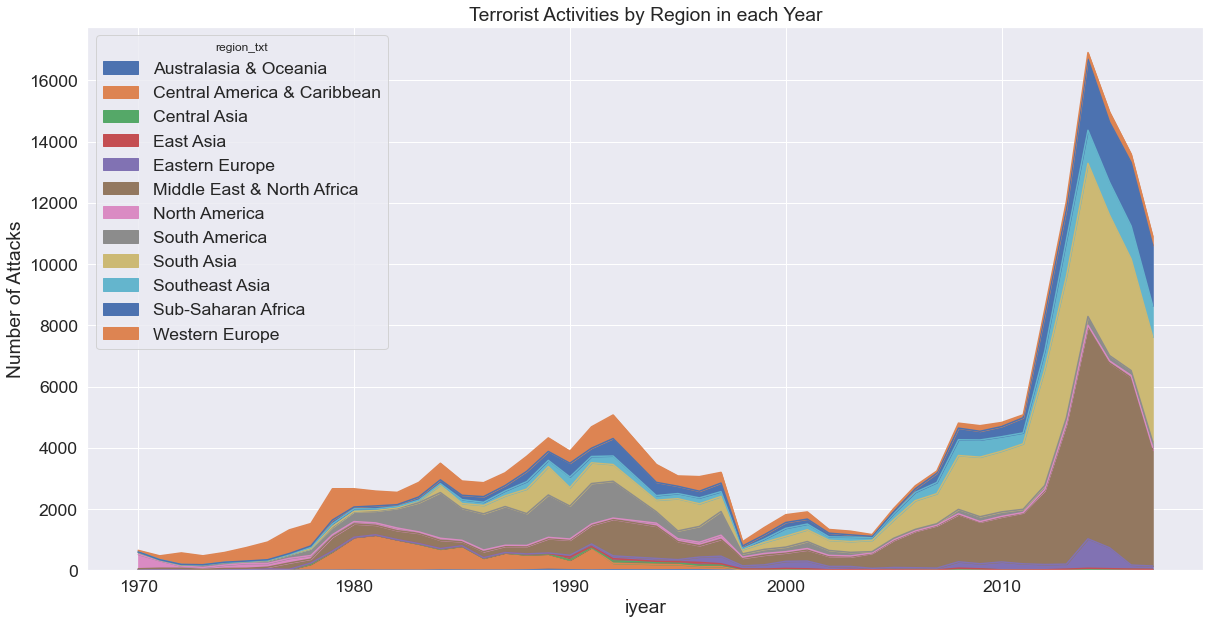

In [93]:
pd.crosstab(data.iyear, data.region_txt).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [94]:
# Find out the missing values( in %) for all variables  in the data set
data.isnull().sum()/data.shape[0]*100

eventid                0.000000
iyear                  0.000000
Date                   0.000000
extended               0.000000
country_txt            0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
targtype1_txt          0.000000
targsubtype1_txt       5.709144
natlty1_txt            0.858050
gname                  0.000000
guncertain1            0.209146
individual             0.000000
nperps                39.140629
nperpcap              38.245703
claimed               36.391456
weaptype1_txt          0.000000
weapsubtype1_txt      11.430396
nkill                  5.676120
nwound                 8.977330
property               0.000000
propextent_txt        64.739585
propvalue             78.541039
ishostkid              0.097969
nhostkid

## Missing Value Treatment

### Value Treatment of column Provstate

In [95]:
# Value Treatment of column Provstate
data['provstate'].value_counts()

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
                      ... 
West Sepik               1
Sangha                   1
Khenchela Province       1
Dubrovnik-Neretva        1
Jubaland                 1
Name: provstate, Length: 2855, dtype: int64

In [96]:
# filling the missing values in columns
data['provstate'] = data['provstate'].transform(lambda x: x.fillna('No Idea'))

In [97]:
data['provstate'].isnull().sum()

0

In [98]:
data['provstate'].value_counts()

Baghdad                              7645
Northern Ireland                     4498
Unknown                              4290
Balochistan                          3710
Saladin                              3411
                                     ... 
Guatemala City (Capital District)       1
Paraiba                                 1
Tskhinvali (Region)                     1
Laane-Viru                              1
Alif Dhaalu                             1
Name: provstate, Length: 2856, dtype: int64

### Value Treatment of column City

In [99]:
# Value Treatment of column City
data['city'].value_counts()

Unknown                9775
Baghdad                7589
Karachi                2652
Lima                   2359
Mosul                  2265
                       ... 
Hennigsdorf               1
Jitpur Simara             1
Bridgetown                1
Kzi'ot                    1
Cerro El Devisadero       1
Name: city, Length: 36674, dtype: int64

In [100]:
# replacing unknown value in column city
data.loc[data['city'] == 'unknown','city'] = 'No Idea'

In [101]:
data['city'].isnull().sum()

434

In [102]:
# filling the missing values in the column
data['city'] = data['city'].transform(lambda x: x.fillna('No Idea'))

In [103]:
data['city'].isnull().sum()

0

### Value Treatment of column Alternative_txt

In [104]:
# Value Treatment of column Alternative_txt
data['alternative_txt'].value_counts()

Insurgency/Guerilla Action    23410
Other Crime Type               3665
Intra/Inter-group Conflict     1296
State Actors                    321
Lack of Intentionality          319
Name: alternative_txt, dtype: int64

In [105]:
data['alternative_txt'].isnull().sum()

152680

In [106]:
# filling the missing values in the column
data['alternative_txt'] = data['alternative_txt'].transform(lambda x: x.fillna('No Idea'))

In [107]:
data['alternative_txt'].value_counts()

No Idea                       152680
Insurgency/Guerilla Action     23410
Other Crime Type                3665
Intra/Inter-group Conflict      1296
State Actors                     321
Lack of Intentionality           319
Name: alternative_txt, dtype: int64

### Value Treatment of column targsubtype1_txt

In [108]:
# Value Treatment of column targsubtype1_txt
data['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
                                                           ...  
Multiple Telecommunication Targets                            31
Fire Fighter/Truck                                            27
Personnel                                                     19
Oil Tanker                                                    19
Internet Infrastructure                                       12
Name: targsubtype1_txt, Length: 112, dtype: int64

In [109]:
data['targsubtype1_txt'].isnull().sum()

10373

In [110]:
data['targsubtype1_txt'] = data['targsubtype1_txt'].transform(lambda x:x.fillna('unknown'))

In [111]:
data['targsubtype1_txt'].isnull().sum()

0

In [112]:
data.isnull().sum()/data.shape[0]*100

eventid                0.000000
iyear                  0.000000
Date                   0.000000
extended               0.000000
country_txt            0.000000
region_txt             0.000000
provstate              0.000000
city                   0.000000
alternative_txt        0.000000
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
targtype1_txt          0.000000
targsubtype1_txt       0.000000
natlty1_txt            0.858050
gname                  0.000000
guncertain1            0.209146
individual             0.000000
nperps                39.140629
nperpcap              38.245703
claimed               36.391456
weaptype1_txt          0.000000
weapsubtype1_txt      11.430396
nkill                  5.676120
nwound                 8.977330
property               0.000000
propextent_txt        64.739585
propvalue             78.541039
ishostkid              0.097969
nhostkid

### Value Treatment of column natlty1_txt

In [113]:
# Value Treatment of column natlty1_txt
data['natlty1_txt'].value_counts()

Iraq                                  24113
Pakistan                              13900
India                                 12098
Afghanistan                           10931
Colombia                               7922
                                      ...  
St. Lucia                                 1
People's Republic of the Congo            1
Man, Isle of                              1
Western Sahara                            1
Commonwealth of Independent States        1
Name: natlty1_txt, Length: 215, dtype: int64

In [114]:
data['natlty1_txt'].isnull().sum()

1559

In [115]:
data['natlty1_txt'] = data['natlty1_txt'].transform(lambda x:x.fillna('unknown'))

In [116]:
data['natlty1_txt'].isnull().sum()

0

### Value Treatment of column guncertain1

In [117]:
# Value Treatment of column guncertain1
data['guncertain1'].value_counts()

0.0    166545
1.0     14766
Name: guncertain1, dtype: int64

In [118]:
data['guncertain1'].isnull().sum()

380

In [119]:
data['guncertain1'] = data['guncertain1'].transform(lambda x:x.fillna(0))

In [120]:
data['guncertain1'].isnull().sum()/data.shape[0]*100

0.0

df.loc[df['ransom'] == -9.0,'ransom'] = 0
df.loc[df['ransomamt'] == -99.0,'ransomamt'] = 0
df['ransomamt'] = df['ransomamt'].transform(lambda x:x.fillna(0))

### Value Treatment of nperps

In [121]:
# Value Treatment of nperps
data['nperps'].value_counts()

-99.0       82218
 1.0         8384
 2.0         6062
 3.0         2842
 4.0         2218
            ...  
 56.0           1
 59.0           1
 290.0          1
 20000.0        1
 370.0          1
Name: nperps, Length: 113, dtype: int64

In [122]:
data.loc[data['nperps'] == -99.0, 'nperps'] = 0

In [123]:
data.loc[data['nperps'] == -9.0, 'nperps'] = 0

In [124]:
data['nperps'] = data['nperps'].transform(lambda x:x.fillna(0))

In [125]:
data['nperps'].isnull().sum()/data.shape[0]*100

0.0

In [126]:
data['nperps'].isnull().sum()

0

### Value Treatment of nperpcap

In [127]:
# Value Treatment of nperpcap
data['nperpcap'].value_counts()

 0.0      106158
 1.0        2054
-99.0       1862
 2.0         803
 3.0         425
 4.0         281
 5.0         154
 6.0          91
 8.0          56
 7.0          48
 10.0         41
 9.0          30
 16.0         28
 18.0         27
 13.0         22
 12.0         15
 11.0         14
 15.0         14
 20.0          9
 17.0          7
 87.0          5
 55.0          4
 14.0          4
-9.0           4
 25.0          4
 26.0          4
 40.0          4
 19.0          2
 24.0          2
 32.0          2
 23.0          2
 60.0          2
 27.0          2
 21.0          2
 28.0          2
 100.0         2
 30.0          2
 2.5           2
 126.0         1
 43.0          1
 63.0          1
 76.0          1
 22.0          1
 271.0         1
 50.0          1
 29.0          1
 406.0         1
 41.0          1
 45.0          1
 200.0         1
Name: nperpcap, dtype: int64

In [128]:
data['nperpcap'].isnull().sum()

69489

In [129]:
data.loc[data['nperpcap'] == -99.0, 'nperpcap'] = 0

In [130]:
data.loc[data['nperpcap'] == -9.0, 'nperpcap'] = 0

In [131]:
data['nperpcap'] = data['nperpcap'].transform(lambda x:x.fillna(0))

In [132]:
data['nperps'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of nperpcap

In [133]:
# Value Treatment of nperpcap
data['claimed'].value_counts()

 0.0    95091
 1.0    19006
-9.0     1474
Name: claimed, dtype: int64

In [134]:
data['claimed'].isnull().sum()

66120

In [135]:
data.loc[data['claimed'] == -9.0, 'claimed'] = 0

In [136]:
data['claimed'] = data['claimed'].transform(lambda x:x.fillna(0))

In [137]:
data['claimed'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of nkill

In [138]:
# Value Treatment of nkill
data['nkill'].value_counts()

0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
184.0        1
163.0        1
135.0        1
128.0        1
280.0        1
Name: nkill, Length: 205, dtype: int64

In [139]:
data['nkill'].isnull().sum()

10313

In [140]:
data['nkill'] = data['nkill'].transform(lambda x:x.fillna(0))

In [141]:
data['nkill'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of nwound

In [142]:
# Value Treatment of nwound
data['nwound'].value_counts()

0.0       103275
1.0        16033
2.0        10219
3.0         7303
4.0         4880
           ...  
1272.0         1
184.0          1
163.0          1
319.0          1
8191.0         1
Name: nwound, Length: 238, dtype: int64

In [143]:
data['nwound'].isnull().sum()

16311

In [144]:
data['nwound'] = data['nwound'].transform(lambda x:x.fillna(0))

In [145]:
data['nwound'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of property

In [146]:
# Value Treatment of property
data['property'].value_counts()

 1    93533
 0    66772
-9    21386
Name: property, dtype: int64

In [147]:
data['property'].isnull().sum()

0

In [148]:
data.loc[data['property'] == -9.0, 'property'] = 0

In [149]:
data['property'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of propvalue

In [150]:
# Value Treatment of propvalue
data['propvalue'].value_counts()

-99.00         28613
 50000.00       1185
 10000.00        805
 20000.00        756
 5000.00         578
               ...  
 5400000.00        1
 1325945.54        1
 169000.00         1
 1300000.00        1
 1570000.00        1
Name: propvalue, Length: 659, dtype: int64

In [151]:
data['propvalue'].isnull().sum()

142702

In [152]:
data.loc[data['propvalue'] == -99.0, 'propvalue'] = 0

In [153]:
data['propvalue'] = data['propvalue'].transform(lambda x:x.fillna(0))

In [154]:
data['propvalue'].isnull().sum()/data.shape[0]*100

0.0

In [155]:
data.isnull().sum()/data.shape[0]*100

eventid                0.000000
iyear                  0.000000
Date                   0.000000
extended               0.000000
country_txt            0.000000
region_txt             0.000000
provstate              0.000000
city                   0.000000
alternative_txt        0.000000
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
targtype1_txt          0.000000
targsubtype1_txt       0.000000
natlty1_txt            0.000000
gname                  0.000000
guncertain1            0.000000
individual             0.000000
nperps                 0.000000
nperpcap               0.000000
claimed                0.000000
weaptype1_txt          0.000000
weapsubtype1_txt      11.430396
nkill                  0.000000
nwound                 0.000000
property               0.000000
propextent_txt        64.739585
propvalue              0.000000
ishostkid              0.097969
nhostkid

### Value Treatment of multiple

In [156]:
# Value Treatment of multiple
data['multiple'].value_counts()

0.0    156658
1.0     25032
Name: multiple, dtype: int64

In [157]:
data['multiple'].isnull().sum()

1

In [158]:
data['multiple'] = data['multiple'].transform(lambda x:x.fillna(0))

In [159]:
data['multiple'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of weapsubtype1_txt

In [160]:
# Value Treatment of weapsubtype1_txt
data['weapsubtype1_txt'].value_counts()

Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Dynamite/TNT                                  1222
Rifle/Shotgun (non-automatic)                 1175
Gasoline or Alcohol                            844
Time Fuse                                      792
Pipe Bomb                      

In [161]:
data['weapsubtype1_txt'].isnull().sum()

20768

In [162]:
data['weapsubtype1_txt'] = data['weapsubtype1_txt'].transform(lambda x:x.fillna('unknown'))

In [163]:
data['weapsubtype1_txt'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of propextent_txt

In [164]:
# Value Treatment of propextent_txt
data['propextent_txt'].value_counts()

Minor (likely < $1 million)                      43304
Unknown                                          19846
Major (likely >= $1 million but < $1 billion)      909
Catastrophic (likely >= $1 billion)                  6
Name: propextent_txt, dtype: int64

In [165]:
data['propextent_txt'].isnull().sum()

117626

In [166]:
data['propextent_txt'] = data['propextent_txt'].transform(lambda x:x.fillna('unknown'))

In [167]:
data['propextent_txt'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of ishostkid

In [168]:
# Value Treatment of ishostkid
data['ishostkid'].value_counts()

 0.0    167624
 1.0     13572
-9.0       317
Name: ishostkid, dtype: int64

In [169]:
data['ishostkid'].isnull().sum()

178

In [170]:
data.loc[data['ishostkid'] == -9.0, 'ishostkid'] = 0

In [171]:
data['ishostkid'] = data['ishostkid'].transform(lambda x:x.fillna(0))

In [172]:
data['ishostkid'].value_counts()

0.0    168119
1.0     13572
Name: ishostkid, dtype: int64

In [173]:
data['ishostkid'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of nhostkid

In [174]:
# Value Treatment of nhostkid
data['nhostkid'].value_counts()

 1.0      5504
 2.0      1855
-99.0     1237
 3.0      1046
 4.0       733
          ... 
 71.0        1
 175.0       1
 99.0        1
 87.0        1
 79.0        1
Name: nhostkid, Length: 209, dtype: int64

In [175]:
data['nhostkid'].isnull().sum()

168119

In [176]:
data.loc[data['nhostkid'] == -99.0, 'nhostkid'] = 0
data['nhostkid'] = data['nhostkid'].transform(lambda x:x.fillna(0))

In [177]:
data['nhostkid'].value_counts()

0.0      169362
1.0        5504
2.0        1855
3.0        1046
4.0         733
          ...  
186.0         1
96.0          1
71.0          1
298.0         1
79.0          1
Name: nhostkid, Length: 208, dtype: int64

In [178]:
data['nhostkid'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of ransom

In [179]:
# Value Treatment of ransom
data['ransom'].value_counts()

 0.0    74684
-9.0     1398
 1.0     1299
Name: ransom, dtype: int64

In [180]:
data['ransom'].isnull().sum()

104310

In [181]:
data.loc[data['ransom'] == -9.0, 'ransom'] = 0
data['ransom'] = data['ransom'].transform(lambda x:x.fillna(0))

In [182]:
data['ransom'].value_counts()

0.0    180392
1.0      1299
Name: ransom, dtype: int64

In [183]:
data['ransom'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of ransomamt

In [184]:
# Value Treatment of ransomamt
data['ransomamt'].value_counts()

 0.0          340
-99.0         248
 1000000.0     33
 500000.0      24
 2000000.0     21
             ... 
 926000.0       1
 664000.0       1
 166182.0       1
 1330050.0      1
 3572.0         1
Name: ransomamt, Length: 429, dtype: int64

In [185]:
data['ransomamt'].isnull().sum()

180341

In [186]:
data.loc[data['ransomamt'] == -9.0, 'ransomamt'] = 0
data.loc[data['ransomamt'] == -99.0, 'ransomamt'] = 0
data['ransomamt'] = data['ransomamt'].transform(lambda x:x.fillna(0))

In [187]:
data['ransomamt'].value_counts()

0.00          180932
1000000.00        33
500000.00         24
2000000.00        21
5000000.00        18
               ...  
166182.00          1
1330050.00         1
67487.64           1
52383.52           1
160000.00          1
Name: ransomamt, Length: 427, dtype: int64

In [188]:
data['ransomamt'].isnull().sum()/data.shape[0]*100

0.0

In [189]:
data.isnull().sum()/data.shape[0]*100

eventid                0.000000
iyear                  0.000000
Date                   0.000000
extended               0.000000
country_txt            0.000000
region_txt             0.000000
provstate              0.000000
city                   0.000000
alternative_txt        0.000000
multiple               0.000000
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
targtype1_txt          0.000000
targsubtype1_txt       0.000000
natlty1_txt            0.000000
gname                  0.000000
guncertain1            0.000000
individual             0.000000
nperps                 0.000000
nperpcap               0.000000
claimed                0.000000
weaptype1_txt          0.000000
weapsubtype1_txt       0.000000
nkill                  0.000000
nwound                 0.000000
property               0.000000
propextent_txt         0.000000
propvalue              0.000000
ishostkid              0.000000
nhostkid

### Value Treatment of ransompaid

In [190]:
# Value Treatment of ransompaid
data['ransompaid'].value_counts()

-99.00         322
 0.00          245
 100000.00       7
 1000000.00      7
 500000.00       6
              ... 
 38169.76        1
 1300.00         1
 3690000.00      1
 4500.00         1
 5070000.00      1
Name: ransompaid, Length: 156, dtype: int64

In [191]:
data['ransompaid'].isnull().sum()

180917

In [192]:
data.loc[data['ransomamt'] == -9.0, 'ransompaid'] = 0
data.loc[data['ransomamt'] == -99.0, 'ransompaid'] = 0
data['ransompaid'] = data['ransompaid'].transform(lambda x:x.fillna(0))

In [193]:
data['ransompaid'].value_counts()

 0.00          181162
-99.00            322
 100000.00          7
 1000000.00         7
 500000.00          6
                ...  
 38169.76           1
 1300.00            1
 3690000.00         1
 4500.00            1
 5070000.00         1
Name: ransompaid, Length: 156, dtype: int64

In [194]:
data['ransompaid'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of hostkidoutcome_txt

In [195]:
# Value Treatment of hostkidoutcome_txt
data['hostkidoutcome_txt'].value_counts()

Unknown                                           3606
Hostage(s) released by perpetrators               3124
Hostage(s) killed (not during rescue attempt)     2522
Combination                                       1013
Successful Rescue                                  542
Hostage(s) escaped (not during rescue attempt)     165
Attempted Rescue                                    19
Name: hostkidoutcome_txt, dtype: int64

In [196]:
data['hostkidoutcome_txt'].isnull().sum()

170700

In [197]:
data['hostkidoutcome_txt'] = data['hostkidoutcome_txt'].transform(lambda x:x.fillna(0))

In [198]:
data['hostkidoutcome_txt'].isnull().sum()/data.shape[0]*100

0.0

### Value Treatment of nreleased

In [199]:
# Value Treatment of nreleased
data['nreleased'].value_counts()

-99.0      3561
 0.0       2314
 1.0       2100
 2.0        678
 3.0        384
           ... 
 157.0        1
 322.0        1
 511.0        1
 156.0        1
 1000.0       1
Name: nreleased, Length: 156, dtype: int64

In [200]:
data['nreleased'].isnull().sum()

171291

In [201]:
data.loc[data['nreleased'] == -99.0, 'nreleased'] = 0
data['nreleased'] = data['nreleased'].transform(lambda x:x.fillna(0))

In [202]:
data['nreleased'].isnull().sum()/data.shape[0]*100

0.0

In [203]:
data.isnull().sum()/data.shape[0]*100

eventid               0.0
iyear                 0.0
Date                  0.0
extended              0.0
country_txt           0.0
region_txt            0.0
provstate             0.0
city                  0.0
alternative_txt       0.0
multiple              0.0
success               0.0
suicide               0.0
attacktype1           0.0
attacktype1_txt       0.0
targtype1_txt         0.0
targsubtype1_txt      0.0
natlty1_txt           0.0
gname                 0.0
guncertain1           0.0
individual            0.0
nperps                0.0
nperpcap              0.0
claimed               0.0
weaptype1_txt         0.0
weapsubtype1_txt      0.0
nkill                 0.0
nwound                0.0
property              0.0
propextent_txt        0.0
propvalue             0.0
ishostkid             0.0
nhostkid              0.0
ransom                0.0
ransomamt             0.0
ransompaid            0.0
hostkidoutcome_txt    0.0
nreleased             0.0
INT_LOG               0.0
INT_IDEO    

## Dropping the columns which are irrelevant to the dataset

In [207]:
data.drop(columns = ['eventid','Date','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'], inplace = True)
data.head()

iyear  extended         country_txt                   region_txt provstate  \
0   1970         0  Dominican Republic  Central America & Caribbean   No Idea   
1   1970         0              Mexico                North America   Federal   
2   1970         0         Philippines               Southeast Asia    Tarlac   
3   1970         0              Greece               Western Europe    Attica   
4   1970         0               Japan                    East Asia   Fukouka   

            city alternative_txt  multiple  success  suicide  ...  property  \
0  Santo Domingo         No Idea       0.0        1        0  ...         0   
1    Mexico city         No Idea       0.0        1        0  ...         0   
2        Unknown         No Idea       0.0        1        0  ...         0   
3         Athens         No Idea       0.0        1        0  ...         1   
4        Fukouka         No Idea       0.0        1        0  ...         1   

  propextent_txt propvalue ishostkid nhostkid ransom  ransomamt  ransompaid  \
0        unknown       0.0       0.0      0.0    0.0        0.0         0.0   
1        unknown       0.0       1.0      1.0    1.0   800000.0         0.0   
2        unknown       0.0       0.0      0.0    0.0        0.0         0.0   
3        unknown       0.0       0.0      0.0    0.0        0.0         0.0   
4        unknown       0.0       0.0      0.0    0.0        0.0         0.0   

   hostkidoutcome_txt  nreleased  
0                   0        0.0  
1                   0        0.0  
2                   0        0.0  
3                   0        0.0  
4                   0        0.0  

[5 rows x 35 columns]

## Visualization done of the features which were having missing values. This is done in order to see that if they give any meaningful insight after missing value treatment.

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


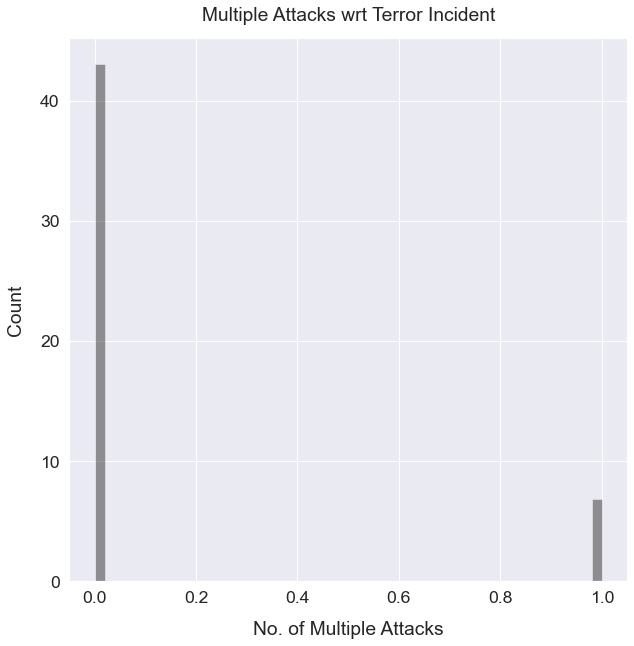

In [208]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.multiple, color = 'black')
plt.title("Multiple Attacks wrt Terror Incident", y=1.02)
plt.xlabel("No. of Multiple Attacks", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


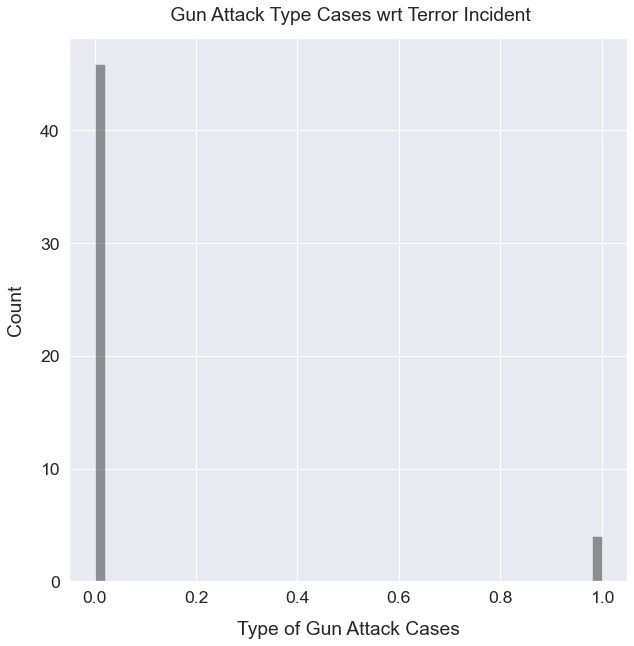

In [206]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.guncertain1, color = 'black')
plt.title(" Gun Attack Type Cases wrt Terror Incident", y=1.02)
plt.xlabel("Type of Gun Attack Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


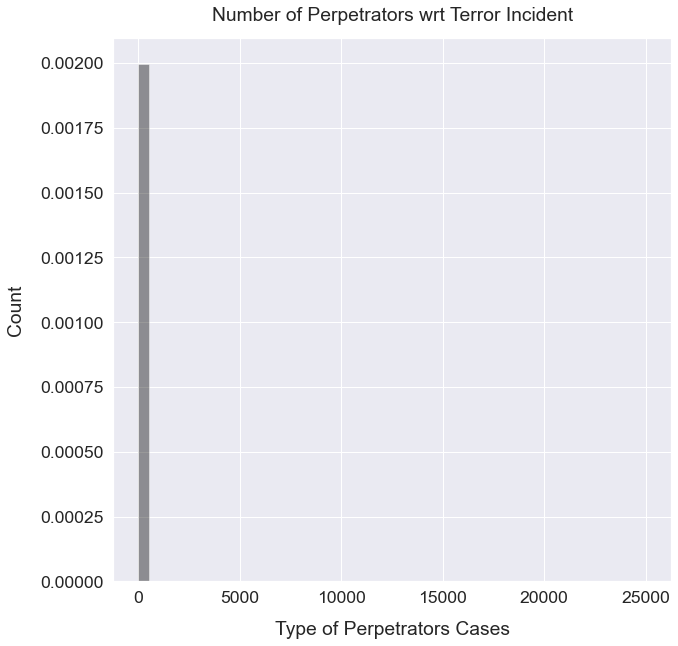

In [209]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nperps, color = 'black')
plt.title("Number of Perpetrators wrt Terror Incident", y=1.02)
plt.xlabel("Type of Perpetrators Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


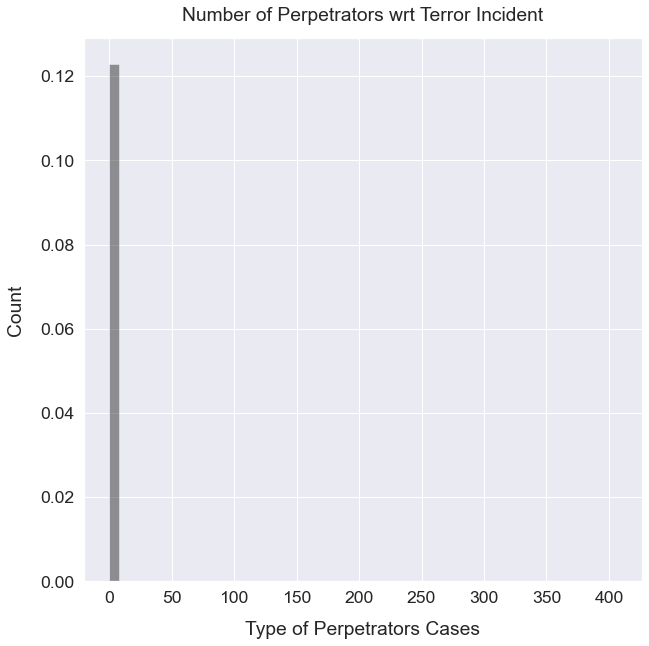

In [210]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nperpcap, color = 'black')
plt.title("Number of Perpetrators wrt Terror Incident", y=1.02)
plt.xlabel("Type of Perpetrators Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


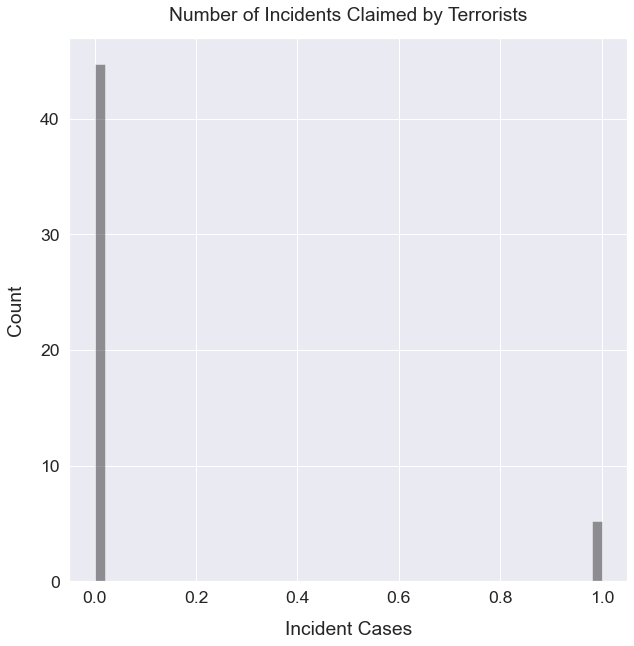

In [211]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.claimed, color = 'black')
plt.title("Number of Incidents Claimed by Terrorists", y=1.02)
plt.xlabel("Incident Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

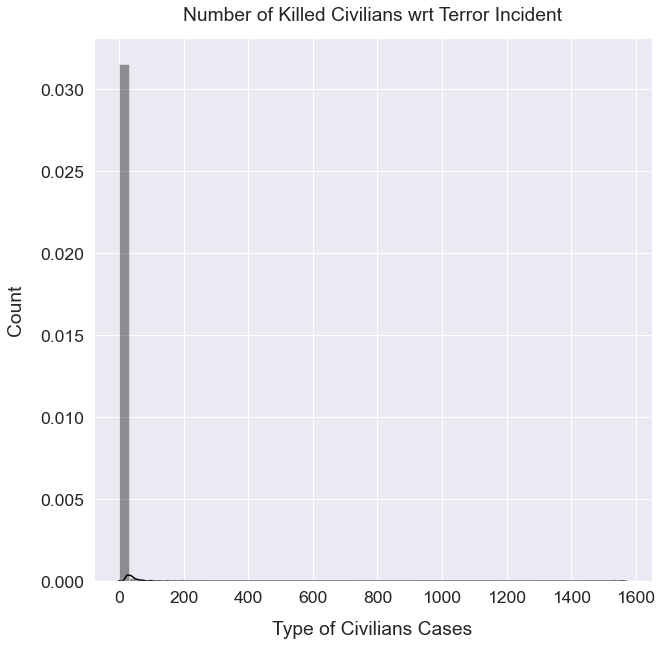

In [212]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nkill, color = 'black')
plt.title("Number of Killed Civilians wrt Terror Incident", y=1.02)
plt.xlabel("Type of Civilians Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

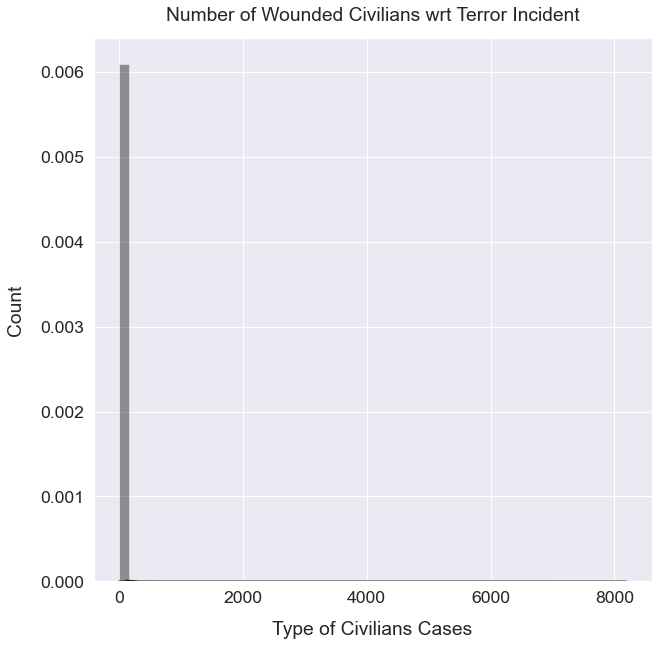

In [213]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nwound, color = 'black')
plt.title("Number of Wounded Civilians wrt Terror Incident", y=1.02)
plt.xlabel("Type of Civilians Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

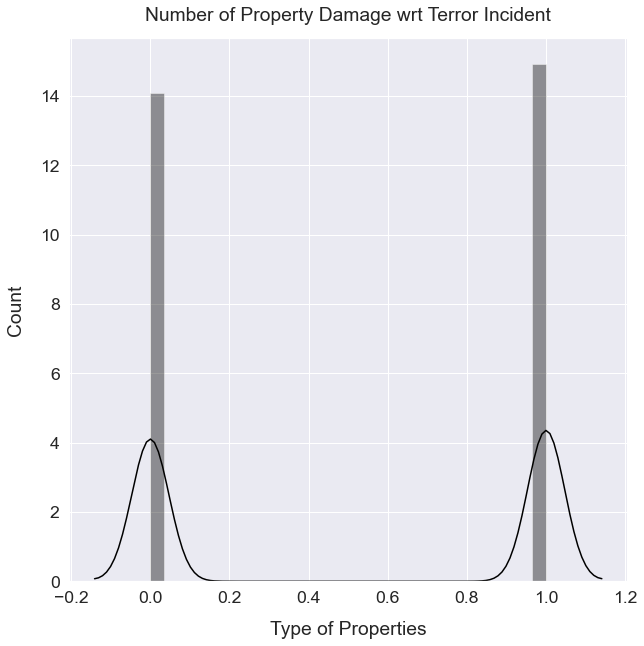

In [214]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.property, color = 'black')
plt.title("Number of Property Damage wrt Terror Incident", y=1.02)
plt.xlabel("Type of Properties", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


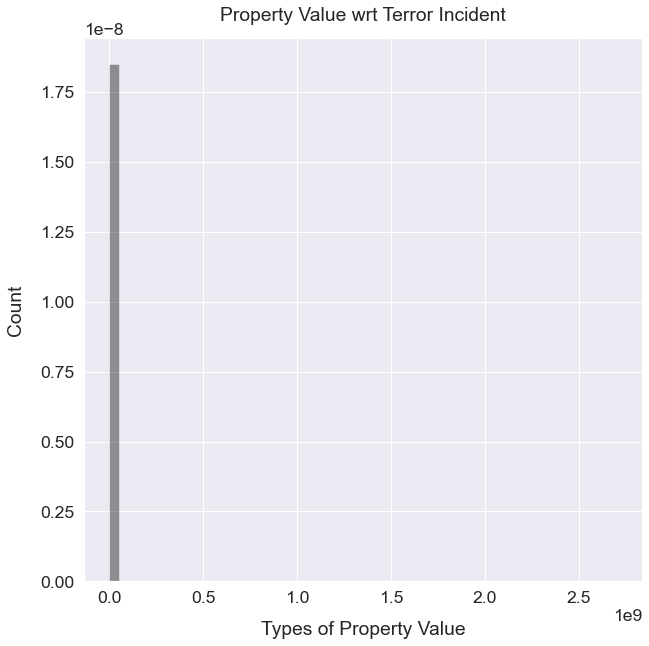

In [215]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.propvalue, color = 'black')
plt.title("Property Value wrt Terror Incident", y=1.02)
plt.xlabel("Types of Property Value", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


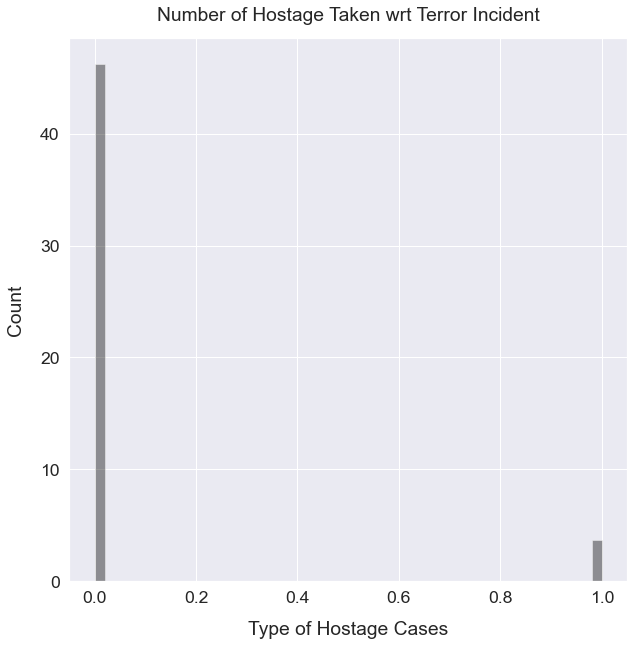

In [216]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ishostkid, color = 'black')
plt.title("Number of Hostage Taken wrt Terror Incident", y=1.02)
plt.xlabel("Type of Hostage Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


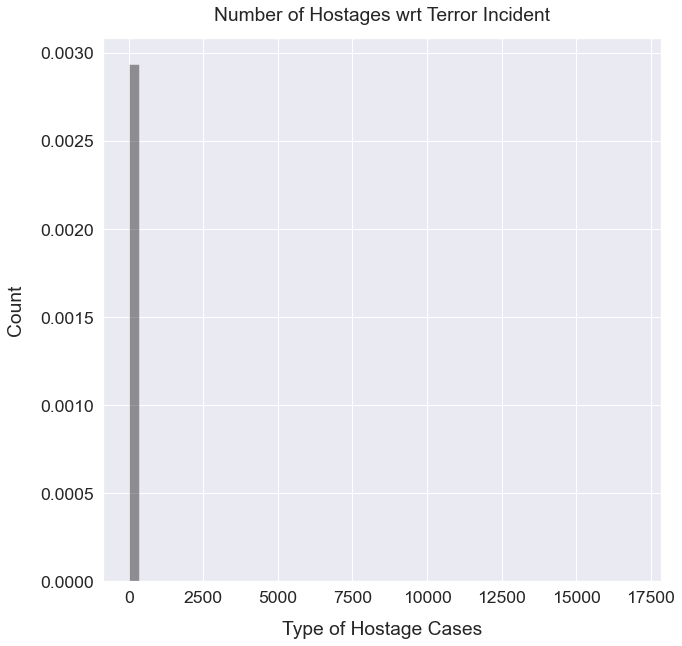

In [217]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nhostkid, color = 'black')
plt.title("Number of Hostages wrt Terror Incident", y=1.02)
plt.xlabel("Type of Hostage Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


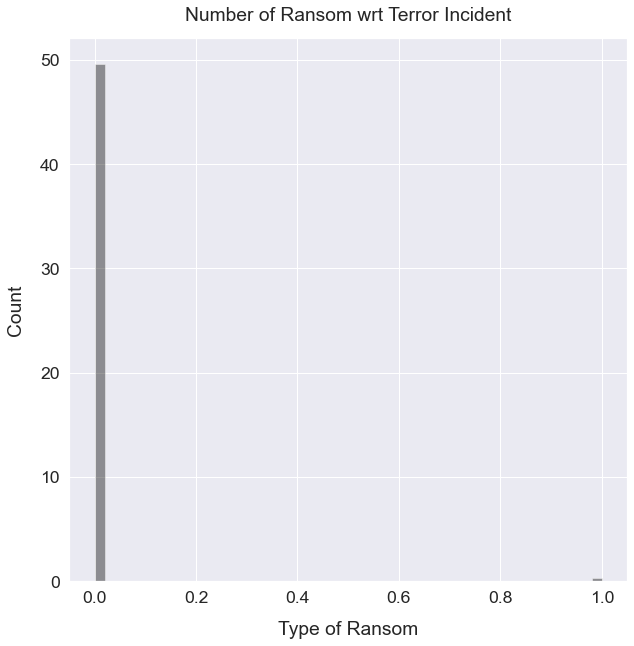

In [218]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ransom, color = 'black')
plt.title("Number of Ransom wrt Terror Incident", y=1.02)
plt.xlabel("Type of Ransom", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


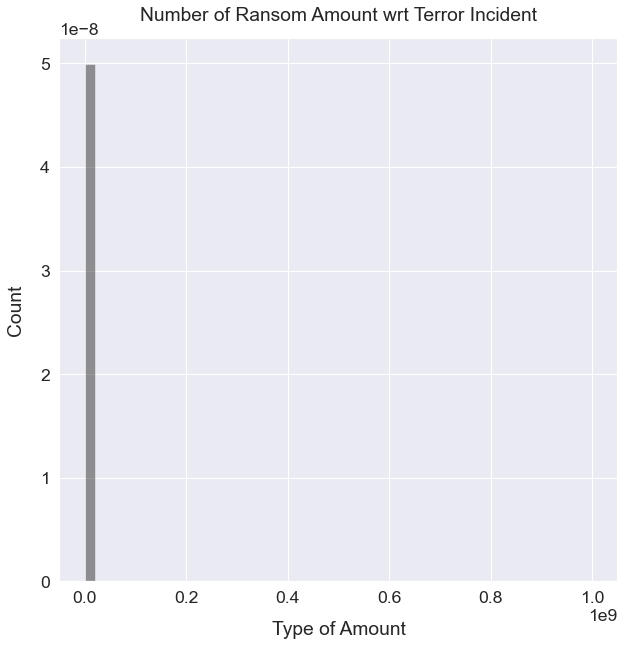

In [219]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ransomamt, color = 'black')
plt.title("Number of Ransom Amount wrt Terror Incident", y=1.02)
plt.xlabel("Type of Amount", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


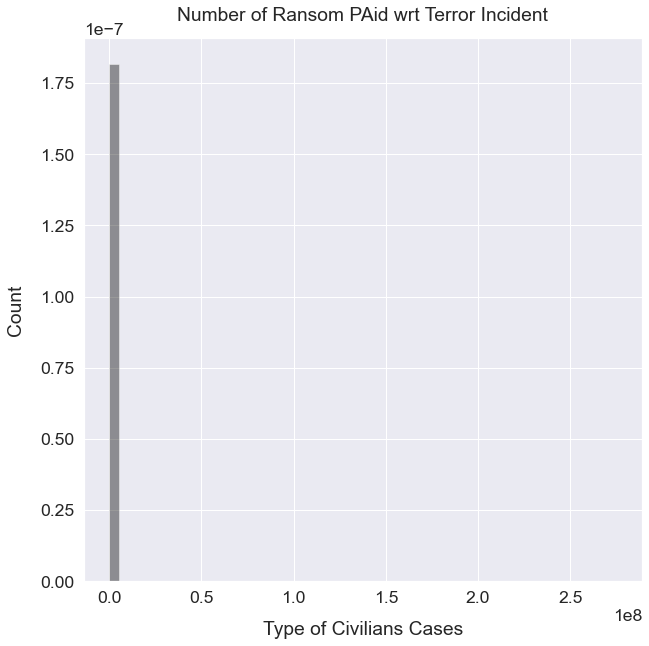

In [220]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.ransompaid, color = 'black')
plt.title("Number of Ransom PAid wrt Terror Incident", y=1.02)
plt.xlabel("Type of Civilians Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

C:\Users\ADITYA GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


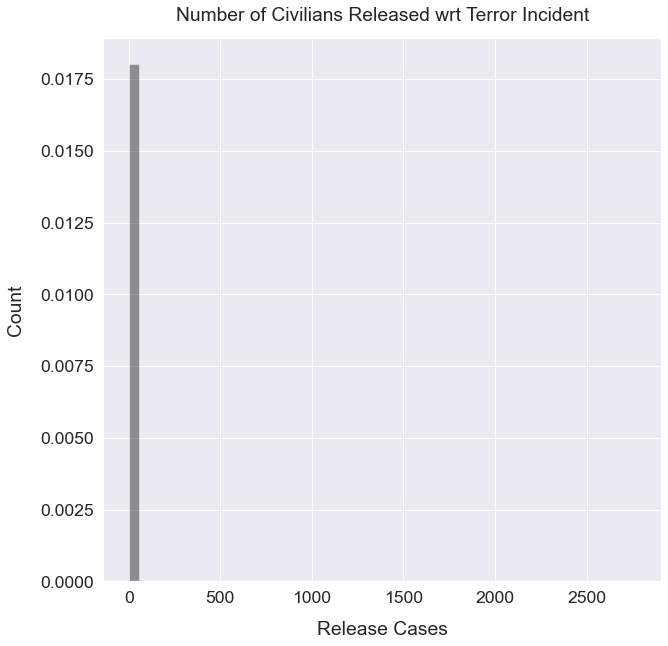

In [221]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
sns.distplot(data.nreleased, color = 'black')
plt.title("Number of Civilians Released wrt Terror Incident", y=1.02)
plt.xlabel("Release Cases", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.show()

### Bivariate Analysis

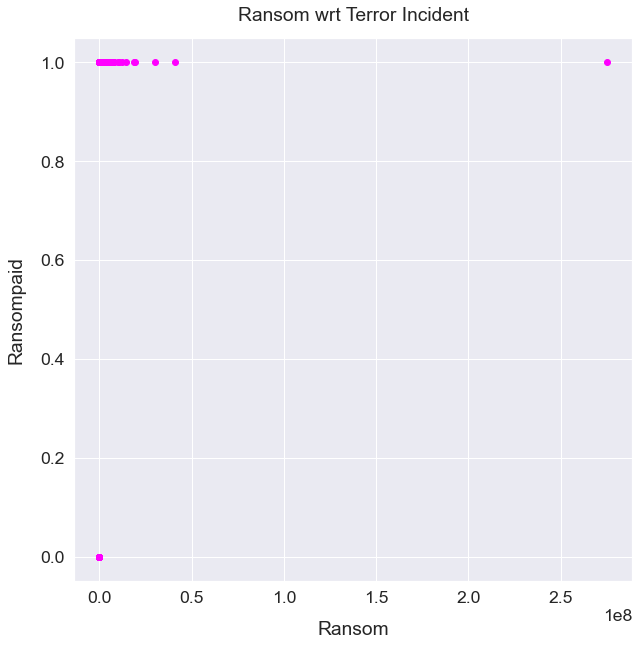

In [222]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.ransompaid, data.ransom, color = 'magenta')
plt.title("Ransom wrt Terror Incident", y=1.02)
plt.xlabel("Ransom", labelpad=15)
plt.ylabel("Ransompaid", labelpad=15)
plt.show() 

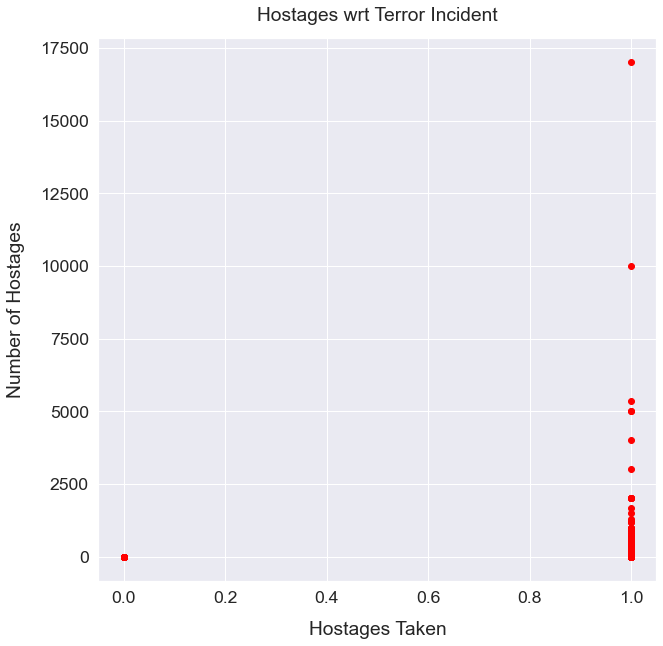

In [223]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.ishostkid, data.nhostkid, color = 'red')
plt.title("Hostages wrt Terror Incident", y=1.02)
plt.xlabel("Hostages Taken", labelpad=15)
plt.ylabel("Number of Hostages", labelpad=15)
plt.show() 

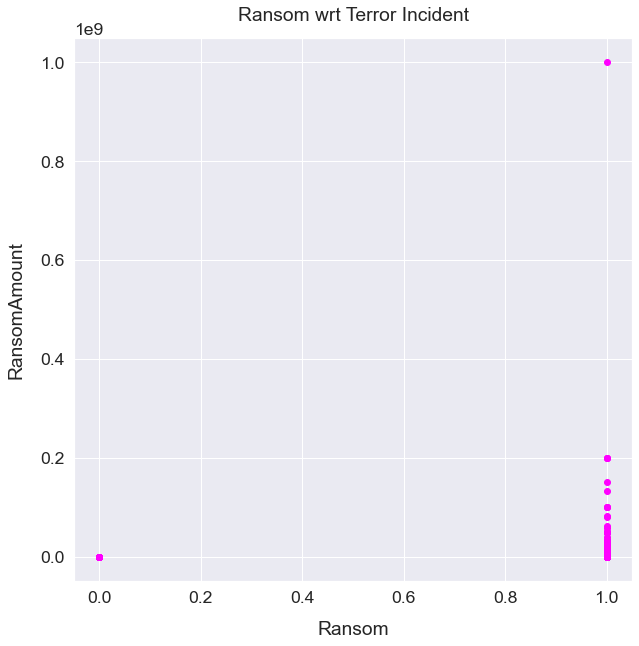

In [224]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.ransom, data.ransomamt, color = 'magenta')
plt.title("Ransom wrt Terror Incident", y=1.02)
plt.xlabel("Ransom", labelpad=15)
plt.ylabel("RansomAmount", labelpad=15)
plt.show() 

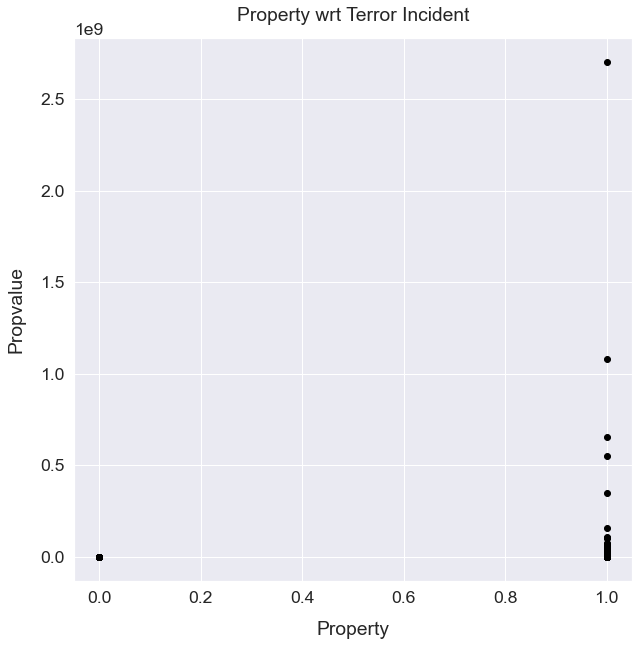

In [225]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.property, data.propvalue, color = 'black')
plt.title("Property wrt Terror Incident", y=1.02)
plt.xlabel("Property", labelpad=15)
plt.ylabel("Propvalue", labelpad=15)
plt.show()

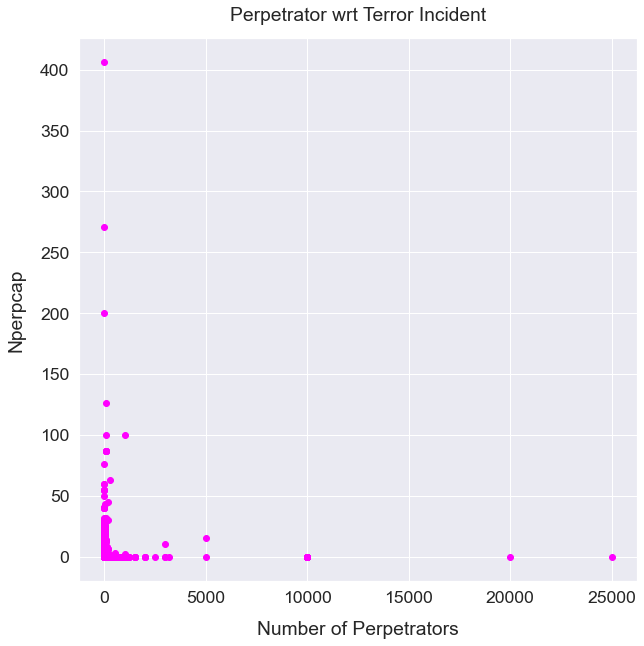

In [226]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.nperps, data.nperpcap, color = 'magenta')
plt.title("Perpetrator wrt Terror Incident", y=1.02)
plt.xlabel("Number of Perpetrators", labelpad=15)
plt.ylabel("Nperpcap", labelpad=15)
plt.show() 

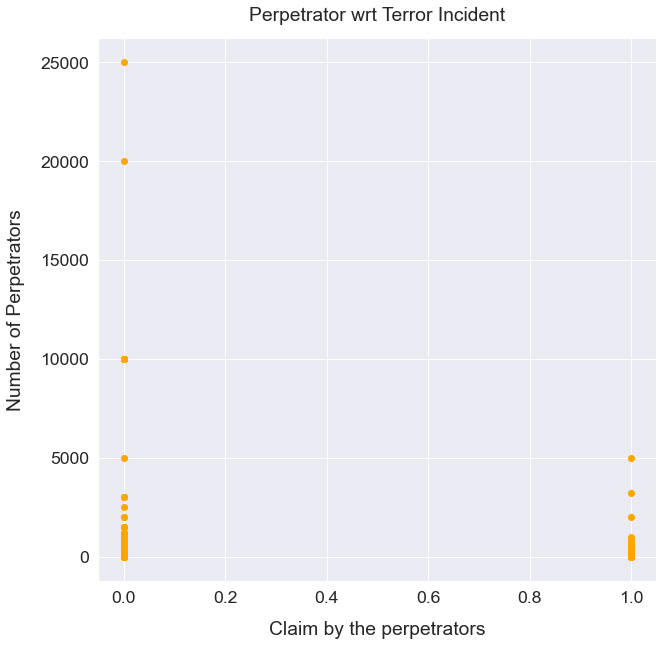

In [233]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.claimed, data.nperps, color = 'orange')
plt.title("Perpetrator wrt Terror Incident", y=1.02)
plt.xlabel("Claim by the perpetrators", labelpad=15)
plt.ylabel("Number of Perpetrators", labelpad=15)
plt.show()

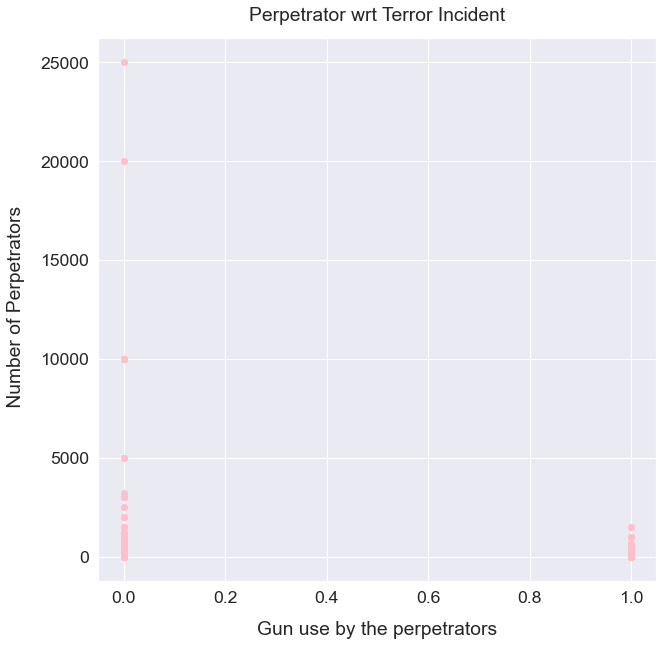

In [232]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.guncertain1, data.nperps, color = 'pink')
plt.title("Perpetrator wrt Terror Incident", y=1.02)
plt.xlabel("Gun use by the perpetrators", labelpad=15)
plt.ylabel(" Number of Perpetrators", labelpad=15)
plt.show()

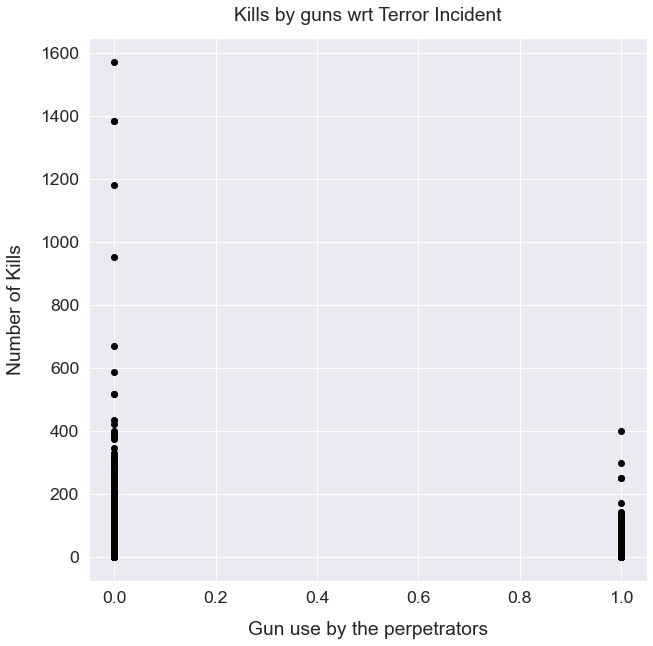

In [231]:
sns.set(font_scale=1.6) 
plt.figure(figsize =(10,10))
plt.scatter(data.guncertain1, data.nkill, color = 'black')
plt.title("Kills by guns wrt Terror Incident", y=1.02)
plt.xlabel("Gun use by the perpetrators", labelpad=15)
plt.ylabel("Number of Kills", labelpad=15)
plt.show()

In [235]:
plt.figure(figsize =(10,10))
pd.crosstab(data.property, data.propextent_txt).T

property                                           0      1
propextent_txt                                             
Catastrophic (likely >= $1 billion)                0      6
Major (likely >= $1 million but < $1 billion)      0    909
Minor (likely < $1 million)                      199  43105
Unknown                                         3205  16641
unknown                                        84754  32872

<Figure size 720x720 with 0 Axes>

## Most of the univariate and bivariate analysis of the features after going through missing value treatment fails to give any meaningful information.

## Security Issues

1. Security agencies of their respective countries should remain alert about illegal activities related to terrorism.

2. Due to most incidents being insurgency and gureilla action, border patrol and international travel should be monitored.

3. Terror attack being done with help to weapons, black market transaction and illegal weapon distribution must be stopped.

4. Government and public institutions should remain under the vigilance of the security force.

5. Middle Eastern Countries should better security infrastructure in order to fight terrorism.

6. Negotiators for the hostage situation should be better equipped.

## Insights from the datasets

1. Top countries where the terror incidents are happening are Iraq, Afghanistan, Pakistan and India.

2. Top regions where the terror incidents are occuring are Middle east & north africa, South Asia, South America, Sub-Saharan Africa, Western Europe.

3. Terror incident type mostly are insurgency/gureilla action, other crime type, intra/inter group conflict.

4. Most terror attack types are bomb explosion, armed assualt, assassination, hostage taking and infrastructure attack.

5. Terrorists mostly targeted upon private citizens & property, military, police, government, business infrasstructure.

6. Attacks were mostly on police security forces, unarmed civilians, military unit/convoy,military personnel,village,politician,etc.

7. Iraq, Pakistan, India, Afghanistan, Colombia, Philipinnes have the most terrorists attacks.

8. Mostly used weapons are explosives, firearms, incendiary.

9. Subcategory of weapons used are unknown explosive & gun type, automatic or semi-automatic rifle, vehicles, projectile,etc.

10. Most of the attacks had minor property damage followed by major property damage (less in number).

11. Most of the hostage incidents are unknown, whereas in reported cases hostages were released by terrorists, some were killed, etc. 
12. Since the beginning of 2010's terrorsists activities has increased.

13. Most terror incidents were insurgency/gureilla action and the attack took place by armed assault, assassination and bomb explosion.

14. There are many terror organisations using armed assault, assassination, explosion as their main methods.

15. Business, government instituions, military, private property are main target areas for the terrorists.

16. Use of explosive device is mostly preferred by the terror groups followed by the firearms and incendiary.

17. Middle eastern countries are mostly under the radar of terror groups for major destruction.

18. Again we can see that in the hostage case scenario, middle eastern countries have taken a top spot such as afghanistan, yemen, iraq, etc.

19. Most of the damages are less that 1 million and very few exceed 1 million mark in terms of terrorists activities.

20. Most civilians death are seen in the middle eastern countries.

21. Most deaths are in the region of South Asia, Middle East & Noth Africa and Western Europe.

22. Most deaths have ocurred by explosives and firearms.